In [4]:
import pymongo
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns

plt.style.use('seaborn-deep')

In [380]:
df_fin = pd.read_csv("pilot_belief_vfin.csv")
df_fin = df_fin.drop(['Unnamed: 0'], axis = 1)

In [381]:
df_fin

,ID,usertoken,prolificID,gender,age,race,education,variables,timerVal,prior_belief,...,post1_uncertainty_L,post1_uncertainty_R,post2_belief,post2_uncertainty_L,post2_uncertainty_R,retro_prior,retro_post1,retro_post2,likert,survey
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23,white,undergrad,"['Immigrant population', 'Crime rate']",5,0.434880,...,-0.937933,-0.680907,-0.797963,-0.988185,-0.607742,I thought that many immigrant families may liv...,"The data showed a negative correlation trend, ...","Again, I used my judgement based on the data g...",unlikely,Tetris was a long time. I think 2 minutes woul...
1,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23,white,undergrad,"['Years of education', 'Income']",5,0.866282,...,-1.000000,1.000000,-0.006797,-0.277683,0.264089,"Typically, people with more education are able...",The data threw off my belief since it was nega...,"After Tetris, I figured there could be some co...",very_likely,Tetris was a long time. I think 2 minutes woul...
2,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23,white,undergrad,"['Avg. hours on social media', 'Depression sev...",5,0.271157,...,-0.976661,-0.596304,-0.763407,-0.946159,-0.580655,Maybe people who are depressed spend a lot of ...,I could reason that people with depression may...,I continued with the same graph because I coul...,cant_say,Tetris was a long time. I think 2 minutes woul...
3,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Immigrant population', 'Crime rate']",5,-0.025050,...,0.173790,0.812798,0.617464,0.211423,1.000000,I don't believe that there is any correlation ...,It made me think that it might be possible tha...,Similar thinking to before the game.,liekly,no
4,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Years of education', 'Income']",5,0.289062,...,-0.545738,1.000000,0.354163,0.002863,0.705464,I've heard many studies saying that getting hi...,It might still be true that higher income can ...,There is still a positive relationship between...,liekly,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,male,31,hispanic,highschool,"['Avg. hours on social media', 'Depression sev...",5,-1.000000,...,-0.515794,0.336967,-0.811280,-0.909356,-0.713205,Torreyson h e more someone spends on social me...,Plot points showed that they were pretty even ...,Again plot points showed no relationship betwe...,very_likely,Interesting study as I’m curious about the dat...
302,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,male,31,hispanic,highschool,"['Immigrant population', 'Crime rate']",5,0.356332,...,-0.572795,-0.387780,0.248386,-0.308081,0.804853,More ILLEGAL immigrants that are subject to no...,Plot points showed that wasn’t the case,Should have remained the same,very_likely,Interesting study as I’m curious about the dat...
303,62fabb0c930ab57fc9fe19fb,vx2CYiXG,62f31911f6572d09a0e47369,male,21,white,undergrad,"['Avg. hours on social media', 'Depression sev...",5,0.857448,...,0.462709,0.903913,0.395300,0.150674,0.639927,I have seen various sources stating social med...,I wanted to include a few of the data point se...,This better reflected the data points.,unlikely,None! Thank you!
304,62fabb0c930ab57fc9fe19fb,vx2CYiXG,62f31911f6572d09a0e47369,male,21,white,undergrad,"['Years of education', 'Income']",5,-1.000000,...,0.718756,1.000000,0.927413,0.727729,1.000000,I started out thinking that it may have been r...,It was clear the data was driven towards the e...,I wanted to better include the lower end educa...,cant_say,None! Thank you!


In [382]:
df_fin.index[df_fin['ID'] == '62f689c6fc70763173e821db']

Int64Index([93, 94, 95], dtype='int64')

In [383]:
df_fin.loc[[93,94,95]]

,ID,usertoken,prolificID,gender,age,race,education,variables,timerVal,prior_belief,...,post1_uncertainty_L,post1_uncertainty_R,post2_belief,post2_uncertainty_L,post2_uncertainty_R,retro_prior,retro_post1,retro_post2,likert,survey
93,62f689c6fc70763173e821db,4OVhg6sS,5f1dea279f4818757f07f087,female,59,black,masters,"['Immigrant population', 'Crime rate']",5,0.405773,...,0.112198,0.165847,0.10921,-0.349707,0.568127,Most immigrants seem to work hard. provide for...,Mostly there are not related. We have more cri...,I'm was not sure if there actually is a correl...,cant_say,None
94,62f689c6fc70763173e821db,4OVhg6sS,5f1dea279f4818757f07f087,female,59,black,masters,"['Avg. hours on social media', 'Depression sev...",5,NaN,...,1.000000,1.000000,1.00000,0.584100,1.000000,I don't think this is what I chose. Because I ...,Teenagers are more depressed because of social...,I think there is a high correlation between so...,liekly,None
95,62f689c6fc70763173e821db,4OVhg6sS,5f1dea279f4818757f07f087,female,59,black,masters,"['Years of education', 'Income']",5,-0.860531,...,-1.000000,-0.865644,-1.00000,-1.000000,-0.786595,Usually you would find that the more education...,Normally more education would equate to higher...,My beliefs are still the same. Teachers get a ...,liekly,None


In [384]:
df_fin.drop(df_fin.loc[df_fin['ID']== '62f689c6fc70763173e821db'].index, inplace=True)
df_fin.reset_index(drop = True)

,ID,usertoken,prolificID,gender,age,race,education,variables,timerVal,prior_belief,...,post1_uncertainty_L,post1_uncertainty_R,post2_belief,post2_uncertainty_L,post2_uncertainty_R,retro_prior,retro_post1,retro_post2,likert,survey
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23,white,undergrad,"['Immigrant population', 'Crime rate']",5,0.434880,...,-0.937933,-0.680907,-0.797963,-0.988185,-0.607742,I thought that many immigrant families may liv...,"The data showed a negative correlation trend, ...","Again, I used my judgement based on the data g...",unlikely,Tetris was a long time. I think 2 minutes woul...
1,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23,white,undergrad,"['Years of education', 'Income']",5,0.866282,...,-1.000000,1.000000,-0.006797,-0.277683,0.264089,"Typically, people with more education are able...",The data threw off my belief since it was nega...,"After Tetris, I figured there could be some co...",very_likely,Tetris was a long time. I think 2 minutes woul...
2,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23,white,undergrad,"['Avg. hours on social media', 'Depression sev...",5,0.271157,...,-0.976661,-0.596304,-0.763407,-0.946159,-0.580655,Maybe people who are depressed spend a lot of ...,I could reason that people with depression may...,I continued with the same graph because I coul...,cant_say,Tetris was a long time. I think 2 minutes woul...
3,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Immigrant population', 'Crime rate']",5,-0.025050,...,0.173790,0.812798,0.617464,0.211423,1.000000,I don't believe that there is any correlation ...,It made me think that it might be possible tha...,Similar thinking to before the game.,liekly,no
4,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Years of education', 'Income']",5,0.289062,...,-0.545738,1.000000,0.354163,0.002863,0.705464,I've heard many studies saying that getting hi...,It might still be true that higher income can ...,There is still a positive relationship between...,liekly,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,male,31,hispanic,highschool,"['Avg. hours on social media', 'Depression sev...",5,-1.000000,...,-0.515794,0.336967,-0.811280,-0.909356,-0.713205,Torreyson h e more someone spends on social me...,Plot points showed that they were pretty even ...,Again plot points showed no relationship betwe...,very_likely,Interesting study as I’m curious about the dat...
299,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,male,31,hispanic,highschool,"['Immigrant population', 'Crime rate']",5,0.356332,...,-0.572795,-0.387780,0.248386,-0.308081,0.804853,More ILLEGAL immigrants that are subject to no...,Plot points showed that wasn’t the case,Should have remained the same,very_likely,Interesting study as I’m curious about the dat...
300,62fabb0c930ab57fc9fe19fb,vx2CYiXG,62f31911f6572d09a0e47369,male,21,white,undergrad,"['Avg. hours on social media', 'Depression sev...",5,0.857448,...,0.462709,0.903913,0.395300,0.150674,0.639927,I have seen various sources stating social med...,I wanted to include a few of the data point se...,This better reflected the data points.,unlikely,None! Thank you!
301,62fabb0c930ab57fc9fe19fb,vx2CYiXG,62f31911f6572d09a0e47369,male,21,white,undergrad,"['Years of education', 'Income']",5,-1.000000,...,0.718756,1.000000,0.927413,0.727729,1.000000,I started out thinking that it may have been r...,It was clear the data was driven towards the e...,I wanted to better include the lower end educa...,cant_say,None! Thank you!


In [385]:
df_fin.shape

(303, 26)

In [386]:
df_fin_IPCR = df_fin[df_fin['variables'].str.contains('Immigrant population')]

In [12]:
df_fin_IPCR['gender'].value_counts()

female    51
male      49
Other      1
Name: gender, dtype: int64

In [13]:
df_fin_IPCR['race'].value_counts()

white             69
black             10
hispanic           9
eastasian          8
other              2
indian             1
nativeamerican     1
prefernot          1
Name: race, dtype: int64

In [14]:
df_fin_IPCR['age'].max(), df_fin_IPCR['age'].min(), df_fin_IPCR['age'].mean(), df_fin_IPCR['age'].std()

(79, 18, 36.81188118811881, 13.979780306776728)

In [15]:
df_fin_IPCR['education'].value_counts()

undergrad     61
highschool    26
masters        9
doctorate      3
other          1
prefernot      1
Name: education, dtype: int64

In [387]:
df_fin_IPCR = df_fin[df_fin['variables'].str.contains('Immigrant population')]
df_fin_SMDR = df_fin[df_fin['variables'].str.contains('Avg. hours on social media')]
df_fin_EIR = df_fin[df_fin['variables'].str.contains('Years of education')]

In [388]:
df_fin_IPCR = df_fin_IPCR.reset_index(drop = True)
df_fin_SMDR = df_fin_SMDR.reset_index(drop = True)
df_fin_EIR = df_fin_EIR.reset_index(drop = True)

In [18]:
############################################## Mixed Effects Modeling Dataframe ##############################################

In [19]:
############################################## IPCR ##############################################

In [636]:
df_IPCR_mixed1 = pd.DataFrame()
df_IPCR_mixed1 = df_fin_IPCR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R', 'variables']]
df_IPCR_mixed1['prior_uncertainty'] = abs(df_fin_IPCR['prior_uncertainty_R'] - df_fin_IPCR['prior_uncertainty_L'])
df_IPCR_mixed1['post1_uncertainty'] = abs(df_fin_IPCR['post1_uncertainty_R'] - df_fin_IPCR['post1_uncertainty_L'])
df_IPCR_mixed1 = df_IPCR_mixed1.drop(['variables','prior_uncertainty_L', 'prior_uncertainty_R', 'post1_uncertainty_L', 'post1_uncertainty_R'], axis = 1)
df_IPCR_mixed1['variable'] = 'Immigrant_crime'
df_IPCR_mixed1['post_stage'] = 'T0'
df_IPCR_mixed1 = df_IPCR_mixed1[['ID', 'prior_belief', 'prior_uncertainty', 'post1_belief', 'post1_uncertainty', 'post_stage', 'variable']]
df_IPCR_mixed1 = df_IPCR_mixed1.rename({'post1_belief': 'post_belief', 'post1_uncertainty': 'post_uncertainty'}, axis=1)

df_IPCR_mixed2 = pd.DataFrame()
df_IPCR_mixed2 = df_fin_IPCR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post1_belief', 'post2_uncertainty_L', 'post2_uncertainty_R', 'variables']] 



df_IPCR_mixed2 = df_fin_IPCR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R', 'variables']]
df_IPCR_mixed2['prior_uncertainty'] = abs(df_fin_IPCR['prior_uncertainty_R'] - df_fin_IPCR['prior_uncertainty_L'])
df_IPCR_mixed2['post2_uncertainty'] = abs(df_fin_IPCR['post2_uncertainty_R'] - df_fin_IPCR['post2_uncertainty_L'])
df_IPCR_mixed2 = df_IPCR_mixed2.drop(['variables','prior_uncertainty_L', 'prior_uncertainty_R', 'post2_uncertainty_L', 'post2_uncertainty_R'], axis = 1)
df_IPCR_mixed2['variable'] = 'Immigrant_crime'
df_IPCR_mixed2['post_stage'] = 'T5'
df_IPCR_mixed2 = df_IPCR_mixed2[['ID', 'prior_belief', 'prior_uncertainty', 'post2_belief', 'post2_uncertainty', 'post_stage', 'variable']]
df_IPCR_mixed2 = df_IPCR_mixed2.rename({'post2_belief': 'post_belief', 'post2_uncertainty': 'post_uncertainty'}, axis=1)

df_IPCR_mixed = pd.DataFrame()
df_IPCR_mixed = pd.concat([df_IPCR_mixed1, df_IPCR_mixed2], ignore_index = True)
# df_IPCR_mixed.sort_values(by ='ID' )
df_IPCR_mixed.reset_index(drop = True)
df_IPCR_mixed

<ipython-input-636-763dd5881718>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-636-763dd5881718>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-636-763dd5881718>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-636-763dd588

,ID,prior_belief,prior_uncertainty,post_belief,post_uncertainty,post_stage,variable
0,62f67ae0fc70763173e81fc2,0.434880,0.905627,-0.809420,0.257026,T0,Immigrant_crime
1,62f67f44fc70763173e81fdc,-0.025050,0.648439,0.493294,0.639007,T0,Immigrant_crime
2,62f68027fc70763173e81fe0,-0.104058,0.613409,0.462908,0.912050,T0,Immigrant_crime
3,62f6808bfc70763173e81fe9,0.226913,0.596061,-0.433702,0.969543,T0,Immigrant_crime
4,62f68266fc70763173e8200b,0.717338,0.843383,-0.389034,0.466914,T0,Immigrant_crime
...,...,...,...,...,...,...,...
197,62faa37f930ab57fc9fe194e,0.017656,0.301417,-0.667945,0.691602,T5,Immigrant_crime
198,62faa683930ab57fc9fe197f,0.120045,0.907432,-0.939679,0.965047,T5,Immigrant_crime
199,62faa77d930ab57fc9fe198c,0.195804,0.353116,-0.660161,0.876080,T5,Immigrant_crime
200,62faa8ab930ab57fc9fe19a0,0.356332,0.253905,0.248386,1.112934,T5,Immigrant_crime


In [642]:
df_SMDR_mixed1 = pd.DataFrame()
df_SMDR_mixed1 = df_fin_SMDR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R', 'variables']]
df_SMDR_mixed1['prior_uncertainty'] = abs(df_fin_SMDR['prior_uncertainty_R'] - df_fin_SMDR['prior_uncertainty_L'])
df_SMDR_mixed1['post1_uncertainty'] = abs(df_fin_SMDR['post1_uncertainty_R'] - df_fin_SMDR['post1_uncertainty_L'])
df_SMDR_mixed1 = df_SMDR_mixed1.drop(['variables','prior_uncertainty_L', 'prior_uncertainty_R', 'post1_uncertainty_L', 'post1_uncertainty_R'], axis = 1)
df_SMDR_mixed1['variable'] = 'Social_media_depression'
df_SMDR_mixed1['post_stage'] = 'T0'
df_SMDR_mixed1 = df_SMDR_mixed1[['ID', 'prior_belief', 'prior_uncertainty', 'post1_belief', 'post1_uncertainty', 'post_stage', 'variable']]
df_SMDR_mixed1 = df_SMDR_mixed1.rename({'post1_belief': 'post_belief', 'post1_uncertainty': 'post_uncertainty'}, axis=1)

df_SMDR_mixed2 = pd.DataFrame()
df_SMDR_mixed2 = df_fin_SMDR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post1_belief', 'post2_uncertainty_L', 'post2_uncertainty_R', 'variables']] 



df_SMDR_mixed2 = df_fin_SMDR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R', 'variables']]
df_SMDR_mixed2['prior_uncertainty'] = abs(df_fin_SMDR['prior_uncertainty_R'] - df_fin_SMDR['prior_uncertainty_L'])
df_SMDR_mixed2['post2_uncertainty'] = abs(df_fin_SMDR['post2_uncertainty_R'] - df_fin_SMDR['post2_uncertainty_L'])
df_SMDR_mixed2 = df_SMDR_mixed2.drop(['variables','prior_uncertainty_L', 'prior_uncertainty_R', 'post2_uncertainty_L', 'post2_uncertainty_R'], axis = 1)
df_SMDR_mixed2['variable'] = 'Social_media_depression'
df_SMDR_mixed2['post_stage'] = 'T5'
df_SMDR_mixed2 = df_SMDR_mixed2[['ID', 'prior_belief', 'prior_uncertainty', 'post2_belief', 'post2_uncertainty', 'post_stage', 'variable']]
df_SMDR_mixed2 = df_SMDR_mixed2.rename({'post2_belief': 'post_belief', 'post2_uncertainty': 'post_uncertainty'}, axis=1)

df_SMDR_mixed = pd.DataFrame()
df_SMDR_mixed = pd.concat([df_SMDR_mixed1, df_SMDR_mixed2], ignore_index = True)
df_SMDR_mixed.reset_index(drop = True)
df_SMDR_mixed

<ipython-input-642-9133f2635fe8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-642-9133f2635fe8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-642-9133f2635fe8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-642-9133f263

,ID,prior_belief,prior_uncertainty,post_belief,post_uncertainty,post_stage,variable
0,62f67ae0fc70763173e81fc2,0.271157,0.617291,-0.786482,0.380357,T0,Social_media_depression
1,62f67f44fc70763173e81fdc,1.000000,0.310146,0.601276,1.313929,T0,Social_media_depression
2,62f68027fc70763173e81fe0,0.457979,0.228804,0.377980,0.634602,T0,Social_media_depression
3,62f6808bfc70763173e81fe9,0.323255,0.930774,-0.415454,0.629733,T0,Social_media_depression
4,62f68266fc70763173e8200b,0.000142,0.283714,-0.765707,0.795517,T0,Social_media_depression
...,...,...,...,...,...,...,...
197,62faa37f930ab57fc9fe194e,1.000000,1.686668,0.793910,2.000000,T5,Social_media_depression
198,62faa683930ab57fc9fe197f,1.000000,1.071455,0.019536,0.583646,T5,Social_media_depression
199,62faa77d930ab57fc9fe198c,0.010892,0.985760,-0.627238,0.804643,T5,Social_media_depression
200,62faa8ab930ab57fc9fe19a0,-1.000000,0.453973,-0.811280,0.196151,T5,Social_media_depression


In [643]:
df_EIR_mixed1 = pd.DataFrame()
df_EIR_mixed1 = df_fin_EIR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R', 'variables']]
df_EIR_mixed1['prior_uncertainty'] = abs(df_fin_EIR['prior_uncertainty_R'] - df_fin_EIR['prior_uncertainty_L'])
df_EIR_mixed1['post1_uncertainty'] = abs(df_fin_EIR['post1_uncertainty_R'] - df_fin_EIR['post1_uncertainty_L'])
df_EIR_mixed1 = df_EIR_mixed1.drop(['variables','prior_uncertainty_L', 'prior_uncertainty_R', 'post1_uncertainty_L', 'post1_uncertainty_R'], axis = 1)
df_EIR_mixed1['variable'] = 'Education_income'
df_EIR_mixed1['post_stage'] = 'T0'
df_EIR_mixed1 = df_EIR_mixed1[['ID', 'prior_belief', 'prior_uncertainty', 'post1_belief', 'post1_uncertainty', 'post_stage', 'variable']]
df_EIR_mixed1 = df_EIR_mixed1.rename({'post1_belief': 'post_belief', 'post1_uncertainty': 'post_uncertainty'}, axis=1)



df_EIR_mixed2 = pd.DataFrame()
df_EIR_mixed2 = df_fin_EIR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post1_belief', 'post2_uncertainty_L', 'post2_uncertainty_R', 'variables']] 
df_EIR_mixed2 = df_fin_EIR[['ID', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 
                              'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R', 'variables']]
df_EIR_mixed2['prior_uncertainty'] = abs(df_fin_EIR['prior_uncertainty_R'] - df_fin_EIR['prior_uncertainty_L'])
df_EIR_mixed2['post2_uncertainty'] = abs(df_fin_EIR['post2_uncertainty_R'] - df_fin_EIR['post2_uncertainty_L'])
df_EIR_mixed2 = df_EIR_mixed2.drop(['variables','prior_uncertainty_L', 'prior_uncertainty_R', 'post2_uncertainty_L', 'post2_uncertainty_R'], axis = 1)
df_EIR_mixed2['variable'] = 'Education_income'
df_EIR_mixed2['post_stage'] = 'T5'
df_EIR_mixed2 = df_EIR_mixed2[['ID', 'prior_belief', 'prior_uncertainty', 'post2_belief', 'post2_uncertainty', 'post_stage', 'variable']]
df_EIR_mixed2 = df_EIR_mixed2.rename({'post2_belief': 'post_belief', 'post2_uncertainty': 'post_uncertainty'}, axis=1)



df_EIR_mixed = pd.concat([df_EIR_mixed1, df_EIR_mixed2], ignore_index = True)
df_EIR_mixed.reset_index(drop = True)
df_EIR_mixed

<ipython-input-643-3e480e6989be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-643-3e480e6989be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-643-3e480e6989be>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-643-3e480e69

,ID,prior_belief,prior_uncertainty,post_belief,post_uncertainty,post_stage,variable
0,62f67ae0fc70763173e81fc2,0.866282,0.365778,-0.006114,2.000000,T0,Education_income
1,62f67f44fc70763173e81fdc,0.289062,1.405343,0.423752,1.545738,T0,Education_income
2,62f68027fc70763173e81fe0,0.690306,0.298219,0.855793,0.269111,T0,Education_income
3,62f6808bfc70763173e81fe9,1.000000,0.703993,0.625484,0.749032,T0,Education_income
4,62f68266fc70763173e8200b,0.930638,0.325171,0.866087,0.601815,T0,Education_income
...,...,...,...,...,...,...,...
197,62faa37f930ab57fc9fe194e,1.000000,0.458292,1.000000,0.468948,T5,Education_income
198,62faa683930ab57fc9fe197f,0.656447,1.040037,0.728553,1.209240,T5,Education_income
199,62faa77d930ab57fc9fe198c,1.000000,0.838612,1.000000,0.880645,T5,Education_income
200,62faa8ab930ab57fc9fe19a0,0.115017,1.571865,0.607344,0.785313,T5,Education_income


In [644]:
df_mixed = pd.concat([df_IPCR_mixed, df_SMDR_mixed, df_EIR_mixed], ignore_index = True)
df_mixed.reset_index(drop = True)
df_mixed

,ID,prior_belief,prior_uncertainty,post_belief,post_uncertainty,post_stage,variable
0,62f67ae0fc70763173e81fc2,0.434880,0.905627,-0.809420,0.257026,T0,Immigrant_crime
1,62f67f44fc70763173e81fdc,-0.025050,0.648439,0.493294,0.639007,T0,Immigrant_crime
2,62f68027fc70763173e81fe0,-0.104058,0.613409,0.462908,0.912050,T0,Immigrant_crime
3,62f6808bfc70763173e81fe9,0.226913,0.596061,-0.433702,0.969543,T0,Immigrant_crime
4,62f68266fc70763173e8200b,0.717338,0.843383,-0.389034,0.466914,T0,Immigrant_crime
...,...,...,...,...,...,...,...
601,62faa37f930ab57fc9fe194e,1.000000,0.458292,1.000000,0.468948,T5,Education_income
602,62faa683930ab57fc9fe197f,0.656447,1.040037,0.728553,1.209240,T5,Education_income
603,62faa77d930ab57fc9fe198c,1.000000,0.838612,1.000000,0.880645,T5,Education_income
604,62faa8ab930ab57fc9fe19a0,0.115017,1.571865,0.607344,0.785313,T5,Education_income


In [645]:
df_mixed.to_csv('belief_mixed_effects.csv', index=True)

In [6]:
#################################################################### Violin Plot Analysis ####################################################################

In [389]:
df_fin_IPCR[['age', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 'data_rho',
       'data_CI_L', 'data_CI_R', 'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R', 'post2_belief', 'post2_uncertainty_L','post2_uncertainty_R']] = df_fin_IPCR[['age', 'prior_belief', 'prior_uncertainty_L', 'prior_uncertainty_R', 'data_rho', 'data_CI_L', 'data_CI_R', 
         'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R', 'post2_belief', 'post2_uncertainty_L','post2_uncertainty_R']].apply(pd.to_numeric)

In [390]:
df_fin_IPCR

,ID,usertoken,prolificID,gender,age,race,education,variables,timerVal,prior_belief,...,post1_uncertainty_L,post1_uncertainty_R,post2_belief,post2_uncertainty_L,post2_uncertainty_R,retro_prior,retro_post1,retro_post2,likert,survey
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23,white,undergrad,"['Immigrant population', 'Crime rate']",5,0.434880,...,-0.937933,-0.680907,-0.797963,-0.988185,-0.607742,I thought that many immigrant families may liv...,"The data showed a negative correlation trend, ...","Again, I used my judgement based on the data g...",unlikely,Tetris was a long time. I think 2 minutes woul...
1,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Immigrant population', 'Crime rate']",5,-0.025050,...,0.173790,0.812798,0.617464,0.211423,1.000000,I don't believe that there is any correlation ...,It made me think that it might be possible tha...,Similar thinking to before the game.,liekly,no
2,62f68027fc70763173e81fe0,MAXHFRS7,629fbe8ae956f7cb13de5073,female,22,white,undergrad,"['Immigrant population', 'Crime rate']",5,-0.104058,...,0.006883,0.918933,0.366334,0.037438,0.695231,immigrant populations tend to be incredibly mo...,I guess the study could be showing me false da...,"Same as previous answer, didn't think that the...",liekly,I'd love to know what the true relationships a...
3,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,male,36,black,undergrad,"['Immigrant population', 'Crime rate']",5,0.226913,...,-0.918474,0.051070,-0.394178,-0.789114,0.000758,I dont see a big correlation.,I reviewed the data,I still went wwith the updated data.,liekly,No.
4,62f68266fc70763173e8200b,GL2yYGVe,6287a8c4a6303ff156cd0853,male,58,white,highschool,"['Immigrant population', 'Crime rate']",5,0.717338,...,-0.622491,-0.155577,-0.267300,-0.668325,0.133724,I felt there was a connection between the two.,The chart indicates my prediction was incorrect.,I felt the chart may be correct.,cant_say,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62faa37f930ab57fc9fe194e,hfXkNsfz,6107f8812249eaf730bf4688,female,21,other,undergrad,"['Immigrant population', 'Crime rate']",5,0.017656,...,-0.860197,0.141667,-0.667945,-1.000000,-0.308398,FIrst thought,changed my decision,same,liekly,no
97,62faa683930ab57fc9fe197f,Zb0GxTDm,5f4d84f6835880a75c96c966,male,21,hispanic,highschool,"['Immigrant population', 'Crime rate']",5,0.120045,...,-1.000000,-0.284983,-0.939679,-1.000000,-0.034953,thaught it made sense,seemed that way,seemed to describe it,cant_say,no
98,62faa77d930ab57fc9fe198c,rJ0xFotM,5d51ffd641a6aa0019ca73df,male,46,white,undergrad,"['Immigrant population', 'Crime rate']",5,0.195804,...,-0.548871,0.556317,-0.660161,-1.000000,-0.123920,There are lots of different kinds of immigrant...,The scatter chart showed inconclusive,I thought I remembered seeing a chart with a n...,liekly,no
99,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,male,31,hispanic,highschool,"['Immigrant population', 'Crime rate']",5,0.356332,...,-0.572795,-0.387780,0.248386,-0.308081,0.804853,More ILLEGAL immigrants that are subject to no...,Plot points showed that wasn’t the case,Should have remained the same,very_likely,Interesting study as I’m curious about the dat...


In [391]:
df_IPCR_plot = pd.DataFrame()

In [392]:
df_IPCR_plot['corr_diff_data_post1'] = abs(df_fin_IPCR['data_rho'] - df_fin_IPCR['post1_belief'])
df_IPCR_plot['corr_diff_data_post2'] = abs(df_fin_IPCR['data_rho'] - df_fin_IPCR['post2_belief'])

df_IPCR_plot['corr_diff_data_post1_notAbs'] = df_fin_IPCR['data_rho'] - df_fin_IPCR['post1_belief']
df_IPCR_plot['corr_diff_data_post2_notAbs'] = df_fin_IPCR['data_rho'] - df_fin_IPCR['post2_belief']

df_IPCR_plot['corr_diff_prior_post1'] = abs(df_fin_IPCR['prior_belief'] - df_fin_IPCR['post1_belief'])
df_IPCR_plot['corr_diff_prior_post2'] = abs(df_fin_IPCR['prior_belief'] - df_fin_IPCR['post2_belief'])

df_IPCR_plot['corr_diff_prior_post1_notAbs'] = abs(df_fin_IPCR['prior_belief'] - df_fin_IPCR['post1_belief'])
df_IPCR_plot['corr_diff_prior_post2_notAbs'] = abs(df_fin_IPCR['prior_belief'] - df_fin_IPCR['post2_belief'])

In [393]:
df_IPCR_plot.shape

(101, 8)

In [394]:
df_SMDR_plot = pd.DataFrame()

In [395]:
df_SMDR_plot['corr_diff_data_post1'] = abs(df_fin_SMDR['data_rho'] - df_fin_SMDR['post1_belief'])
df_SMDR_plot['corr_diff_data_post2'] = abs(df_fin_SMDR['data_rho'] - df_fin_SMDR['post2_belief'])

df_SMDR_plot['corr_diff_data_post1_notAbs'] = df_fin_SMDR['data_rho'] - df_fin_SMDR['post1_belief']
df_SMDR_plot['corr_diff_data_post2_notAbs'] = df_fin_SMDR['data_rho'] - df_fin_SMDR['post2_belief']

df_SMDR_plot['corr_diff_prior_post1'] = abs(df_fin_SMDR['prior_belief'] - df_fin_SMDR['post1_belief'])
df_SMDR_plot['corr_diff_prior_post2'] = abs(df_fin_SMDR['prior_belief'] - df_fin_SMDR['post2_belief'])

df_SMDR_plot['corr_diff_prior_post1_notAbs'] = df_fin_SMDR['prior_belief'] - df_fin_SMDR['post1_belief']
df_SMDR_plot['corr_diff_prior_post2_notAbs'] = df_fin_SMDR['prior_belief'] - df_fin_SMDR['post2_belief']

In [398]:
df_SMDR_plot.shape

(101, 8)

In [396]:
df_EIR_plot = pd.DataFrame()

In [397]:
df_EIR_plot['corr_diff_data_post1'] = abs(df_fin_EIR['data_rho'] - df_fin_EIR['post1_belief'])
df_EIR_plot['corr_diff_data_post2'] = abs(df_fin_EIR['data_rho'] - df_fin_EIR['post2_belief'])

df_EIR_plot['corr_diff_data_post1_notAbs'] = df_fin_EIR['data_rho'] - df_fin_EIR['post1_belief']
df_EIR_plot['corr_diff_data_post2_notAbs'] = df_fin_EIR['data_rho'] - df_fin_EIR['post2_belief']

df_EIR_plot['corr_diff_prior_post1'] = abs(df_fin_EIR['prior_belief'] - df_fin_EIR['post1_belief'])
df_EIR_plot['corr_diff_prior_post2'] = abs(df_fin_EIR['prior_belief'] - df_fin_EIR['post2_belief'])

df_EIR_plot['corr_diff_prior_post1_notAbs'] = df_fin_EIR['prior_belief'] - df_fin_EIR['post1_belief']
df_EIR_plot['corr_diff_prior_post2_notAbs'] = df_fin_EIR['prior_belief'] - df_fin_EIR['post2_belief']

In [399]:
df_EIR_plot.shape

(101, 8)

In [ ]:
################################ Checking significance using t-test ################################################################

In [419]:
import scipy.stats as stats

ttest_result_IPCR = stats.ttest_ind(df_IPCR_plot['corr_diff_prior_post1'], df_IPCR_plot['corr_diff_prior_post2'])
ttest_result_SMDR = stats.ttest_ind(df_SMDR_plot['corr_diff_prior_post1'], df_SMDR_plot['corr_diff_prior_post2'])
ttest_result_EIR = stats.ttest_ind(df_EIR_plot['corr_diff_prior_post1'], df_EIR_plot['corr_diff_prior_post2'])

ttest_result_IPCR, ttest_result_SMDR, ttest_result_EIR

(Ttest_indResult(statistic=0.9510826014483746, pvalue=0.342710376052783),
 Ttest_indResult(statistic=0.4011618423991533, pvalue=0.6887292434679193),
 Ttest_indResult(statistic=-0.3737727739566604, pvalue=0.7089692978432942))

In [561]:
ttest_result_IPCR = stats.ttest_ind(df_IPCR_plot['corr_diff_data_post1'], df_IPCR_plot['corr_diff_data_post2'])
ttest_result_SMDR = stats.ttest_ind(df_SMDR_plot['corr_diff_data_post1'], df_SMDR_plot['corr_diff_data_post2'])
ttest_result_EIR = stats.ttest_ind(df_EIR_plot['corr_diff_data_post1'], df_EIR_plot['corr_diff_data_post2'])

ttest_result_IPCR, ttest_result_SMDR, ttest_result_EIR

(Ttest_indResult(statistic=-1.5114851474595958, pvalue=0.1322433090148161),
 Ttest_indResult(statistic=-0.6519134144771571, pvalue=0.5152055001819),
 Ttest_indResult(statistic=-0.6831664811335273, pvalue=0.49529227625964545))

In [ ]:
################################## Boxplot Dataframe for all Variables ##################################

In [539]:
df_IPCR_bp = df_IPCR_plot[['corr_diff_data_post1', 'corr_diff_data_post2']]
df_IPCR_bp = df_IPCR_bp.rename(columns={'corr_diff_data_post1': 'IPCR_0', 'corr_diff_data_post2': 'IPCR_5'})

df_SMDR_bp = df_SMDR_plot[['corr_diff_data_post1', 'corr_diff_data_post2']]
df_SMDR_bp = df_SMDR_bp.rename(columns={'corr_diff_data_post1': 'SMDR_0', 'corr_diff_data_post2': 'SMDR_5'})

df_EIR_bp = df_EIR_plot[['corr_diff_data_post1', 'corr_diff_data_post2']]
df_EIR_bp = df_EIR_bp.rename(columns={'corr_diff_data_post1': 'EIR_0', 'corr_diff_data_post2': 'EIR_5'})


In [540]:
df_all_bp = pd.DataFrame()
df_all_bp = pd.concat([df_IPCR_bp, df_SMDR_bp, df_EIR_bp], axis = 1)

df_all_bp = df_all_bp[['IPCR_0', 'SMDR_0', 'EIR_0', 'IPCR_5', 'SMDR_5', 'EIR_5']]
df_all_bp

,IPCR_0,SMDR_0,EIR_0,IPCR_5,SMDR_5,EIR_5
0,0.100866,0.046582,0.089655,0.089409,0.023507,0.088972
1,0.371926,0.547714,1.205979,0.247756,0.468334,1.136390
2,0.272366,0.843479,1.172840,0.368940,1.465499,1.242028
3,0.322205,0.282121,0.475377,0.361729,0.327131,1.131514
4,0.246785,0.012867,0.755506,0.125051,0.771573,0.677554
...,...,...,...,...,...,...
96,0.427098,0.462057,0.739340,0.118417,1.000237,0.739340
97,0.293419,0.282756,0.877055,0.233098,0.035203,0.870832
98,0.807001,0.511241,1.007539,0.143117,0.093516,1.007539
99,0.101120,0.025477,0.074291,0.829793,0.747344,1.341322


In [541]:
df_all_bp['IPCR_0'].mean(), df_all_bp['IPCR_5'].mean()

(0.31796502056536496, 0.37958290060976746)

In [542]:
df_all_bp['SMDR_0'].mean(), df_all_bp['SMDR_5'].mean()

(0.4293201011717884, 0.45897466738766624)

In [543]:
df_all_bp['EIR_0'].mean(), df_all_bp['EIR_5'].mean()

(0.5250104202559607, 0.5586158354288451)

In [544]:
order_list = ['IPCR_0', 'IPCR_5', 'SMDR_0', 'SMDR_5', 'EIR_0', 'EIR_5']
data_melt = pd.melt(df_all_bp)
data_melt['variable'] = pd.Categorical(data_melt['variable'], categories=(order_list))
data_melt

,variable,value
0,IPCR_0,0.100866
1,IPCR_0,0.371926
2,IPCR_0,0.272366
3,IPCR_0,0.322205
4,IPCR_0,0.246785
...,...,...
601,EIR_5,0.739340
602,EIR_5,0.870832
603,EIR_5,1.007539
604,EIR_5,1.341322


In [545]:
col_value = []    
for val in data_melt['variable']:
    if val.endswith(('0')):
        col_value.append('Time = 0 mins')
    else:
        col_value.append('Time = 5 mins')

data_melt['Time'] = col_value
data_melt

,variable,value,Time
0,IPCR_0,0.100866,Time = 0 mins
1,IPCR_0,0.371926,Time = 0 mins
2,IPCR_0,0.272366,Time = 0 mins
3,IPCR_0,0.322205,Time = 0 mins
4,IPCR_0,0.246785,Time = 0 mins
...,...,...,...
601,EIR_5,0.739340,Time = 5 mins
602,EIR_5,0.870832,Time = 5 mins
603,EIR_5,1.007539,Time = 5 mins
604,EIR_5,1.341322,Time = 5 mins


In [546]:
col_value1 = []    
for val in data_melt['variable']:
    if val.startswith(('IPCR')):
        col_value1.append('IPCR')
    elif val.startswith(('SMDR')):
        col_value1.append('SMDR')
    else:
        col_value1.append('EIR')

data_melt['Dataset'] = col_value1
data_melt

,variable,value,Time,Dataset
0,IPCR_0,0.100866,Time = 0 mins,IPCR
1,IPCR_0,0.371926,Time = 0 mins,IPCR
2,IPCR_0,0.272366,Time = 0 mins,IPCR
3,IPCR_0,0.322205,Time = 0 mins,IPCR
4,IPCR_0,0.246785,Time = 0 mins,IPCR
...,...,...,...,...
601,EIR_5,0.739340,Time = 5 mins,EIR
602,EIR_5,0.870832,Time = 5 mins,EIR
603,EIR_5,1.007539,Time = 5 mins,EIR
604,EIR_5,1.341322,Time = 5 mins,EIR


In [547]:
import plotnine as p9

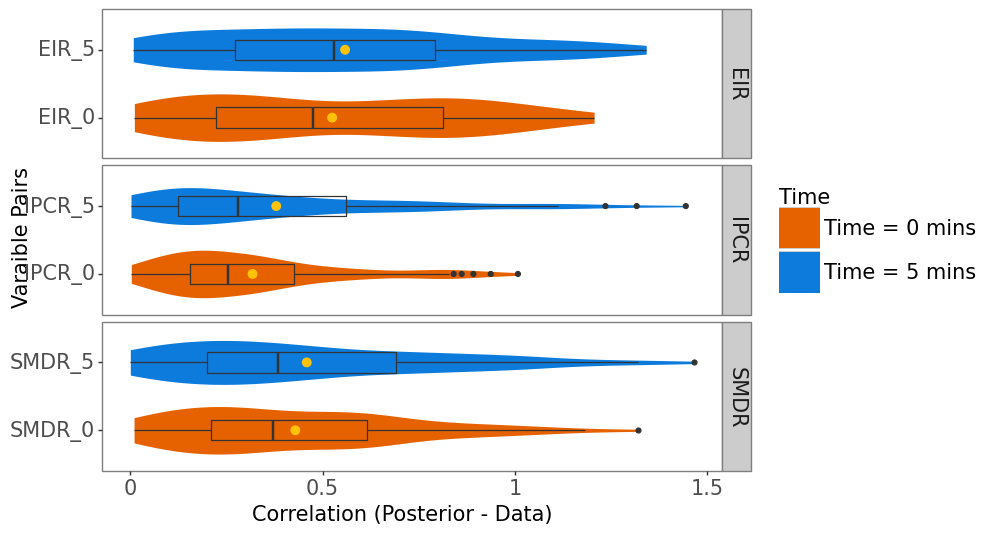

{<ggplot: (8765265869376)>}

In [550]:
 p1 = {p9.ggplot(data_melt, p9.aes(x='variable', y='value', fill='Time')) + 
#  p9.geom_boxplot(width = 0.4) + 
 p9.geom_violin(width = 0.7, color = 'none') +
 p9.geom_boxplot(fill='none', width= 0.3 ) +
#  p9.scale_fill_manual(['lightsalmon', 'lightskyblue']) +
p9.scale_fill_manual(['#E66100', '#0C7BDC']) +       
#  p9.geom_jitter(width = 0.4) +
 p9.coord_flip() +
 p9.facet_grid('Dataset ~ .', scales="free") + 
 p9.labels.ylab('Correlation (Posterior - Data)') +
 p9.labels.xlab('Varaible Pairs') +
 p9.theme_bw() +
 p9.theme(figure_size=(8,6), legend_key_size =30, text= p9.element_text(size = 15),
          panel_grid_major = p9.element_blank(),
          panel_grid_minor = p9.element_blank(),
         ) +
    p9.stat_summary(fun_data='mean_cl_normal', geom='point', size=3.0, fill='#FFC20A', color='#FFC20A')}

p1

In [431]:
# p1 = {p9.ggplot(data_melt, p9.aes(x='variable', y='value', fill='Time')) + 
#  p9.geom_violin(width = 0.4, style='left-r') + 
#  p9.geom_boxplot(width = 0.4) +
#  p9.coord_flip() +
#  p9.facet_grid('Time ~ .', scales="free") + 
#  p9.labels.ylab('Correlation (Posterior - Data)') +
#  p9.labels.xlab('Varaible Pairs') +
#  p9.theme_bw() +
#  p9.theme(figure_size=(10,8), legend_key_size =50, text= p9.element_text(size = 15),
#           panel_grid_major = p9.element_blank(),
#           panel_grid_minor = p9.element_blank(),
#          )}

# p1

In [551]:
df_IPCR_bp2 = df_IPCR_plot[['corr_diff_prior_post1', 'corr_diff_prior_post2']]
df_IPCR_bp2 = df_IPCR_bp2.rename(columns={'corr_diff_prior_post1': 'IPCR_0', 'corr_diff_prior_post2': 'IPCR_5'})

df_SMDR_bp2 = df_SMDR_plot[['corr_diff_prior_post1', 'corr_diff_prior_post2']]
df_SMDR_bp2 = df_SMDR_bp2.rename(columns={'corr_diff_prior_post1': 'SMDR_0', 'corr_diff_prior_post2': 'SMDR_5'})

df_EIR_bp2 = df_EIR_plot[['corr_diff_prior_post1', 'corr_diff_prior_post2']]
df_EIR_bp2 = df_EIR_bp2.rename(columns={'corr_diff_prior_post1': 'EIR_0', 'corr_diff_prior_post2': 'EIR_5'})

In [552]:
df_all_bp2 = pd.DataFrame()
df_all_bp2 = pd.concat([df_IPCR_bp2, df_SMDR_bp2, df_EIR_bp2], axis = 1)

df_all_bp2 = df_all_bp2[['IPCR_0', 'SMDR_0', 'EIR_0', 'IPCR_5', 'SMDR_5', 'EIR_5']]
df_all_bp2

,IPCR_0,SMDR_0,EIR_0,IPCR_5,SMDR_5,EIR_5
0,1.244300,1.057640,0.872396,1.232843,1.034564,0.873079
1,0.518344,0.398724,0.134690,0.642514,0.478104,0.065101
2,0.566966,0.079999,0.165487,0.470392,0.542021,0.234674
3,0.660615,0.738709,0.374516,0.621091,0.693700,1.981407
4,1.106373,0.765850,0.064552,0.984638,0.018590,0.142504
...,...,...,...,...,...,...
96,0.376921,0.744270,0.000000,0.685601,0.206090,0.000000
97,1.120045,0.732911,0.078329,1.059724,0.980464,0.072106
98,0.192081,0.220405,0.000000,0.855965,0.638130,0.000000
99,0.836620,0.910587,0.774704,0.107946,0.188720,0.492327


In [553]:
df_all_bp2['IPCR_0'].mean(), df_all_bp2['IPCR_5'].mean()

(0.8217964246388246, 0.7666128135857142)

In [554]:
df_all_bp2['SMDR_0'].mean(), df_all_bp2['SMDR_5'].mean()

(0.8658308273330247, 0.8366823300451964)

In [555]:
df_all_bp2['EIR_0'].mean(), df_all_bp2['EIR_5'].mean()

(0.7167408317593609, 0.7463854734759675)

In [556]:
order_list = ['IPCR_0', 'SMDR_0', 'EIR_0', 'IPCR_5', 'SMDR_5', 'EIR_5']
data_melt2 = pd.melt(df_all_bp2)
data_melt2['variable'] = pd.Categorical(data_melt2['variable'], categories=(order_list))
data_melt2

,variable,value
0,IPCR_0,1.244300
1,IPCR_0,0.518344
2,IPCR_0,0.566966
3,IPCR_0,0.660615
4,IPCR_0,1.106373
...,...,...
601,EIR_5,0.000000
602,EIR_5,0.072106
603,EIR_5,0.000000
604,EIR_5,0.492327


In [557]:
col_value = []    
for val in data_melt2['variable']:
    if val.endswith(('0')):
        col_value.append('Time = 0 mins')
    else:
        col_value.append('Time = 5 mins')

data_melt2['Time'] = col_value
data_melt2

,variable,value,Time
0,IPCR_0,1.244300,Time = 0 mins
1,IPCR_0,0.518344,Time = 0 mins
2,IPCR_0,0.566966,Time = 0 mins
3,IPCR_0,0.660615,Time = 0 mins
4,IPCR_0,1.106373,Time = 0 mins
...,...,...,...
601,EIR_5,0.000000,Time = 5 mins
602,EIR_5,0.072106,Time = 5 mins
603,EIR_5,0.000000,Time = 5 mins
604,EIR_5,0.492327,Time = 5 mins


In [558]:
col_value2 = []    
for val in data_melt2['variable']:
    if val.startswith(('IPCR')):
        col_value2.append('IPCR')
    elif val.startswith(('SMDR')):
        col_value2.append('SMDR')
    else:
        col_value2.append('EIR')

data_melt2['Dataset'] = col_value2
data_melt2

,variable,value,Time,Dataset
0,IPCR_0,1.244300,Time = 0 mins,IPCR
1,IPCR_0,0.518344,Time = 0 mins,IPCR
2,IPCR_0,0.566966,Time = 0 mins,IPCR
3,IPCR_0,0.660615,Time = 0 mins,IPCR
4,IPCR_0,1.106373,Time = 0 mins,IPCR
...,...,...,...,...
601,EIR_5,0.000000,Time = 5 mins,EIR
602,EIR_5,0.072106,Time = 5 mins,EIR
603,EIR_5,0.000000,Time = 5 mins,EIR
604,EIR_5,0.492327,Time = 5 mins,EIR


In [559]:
#  p2 = {p9.ggplot(data_melt2, p9.aes(x='variable', y='value', fill='Time')) + 
#  p9.geom_boxplot(width = 0.4) + 
#  p9.coord_flip() +
#  p9.facet_grid('Time ~ .', scales="free") + 
#  p9.labels.ylab('Correlation (Posterior - Prior)') +
#  p9.labels.xlab('Varaible Pairs') +
#  p9.theme_bw() +
#  p9.theme(figure_size=(10,8), legend_key_size =50, text= p9.element_text(size = 15),
#           panel_grid_major = p9.element_blank(),
#           panel_grid_minor = p9.element_blank(),
#          )}

# p2

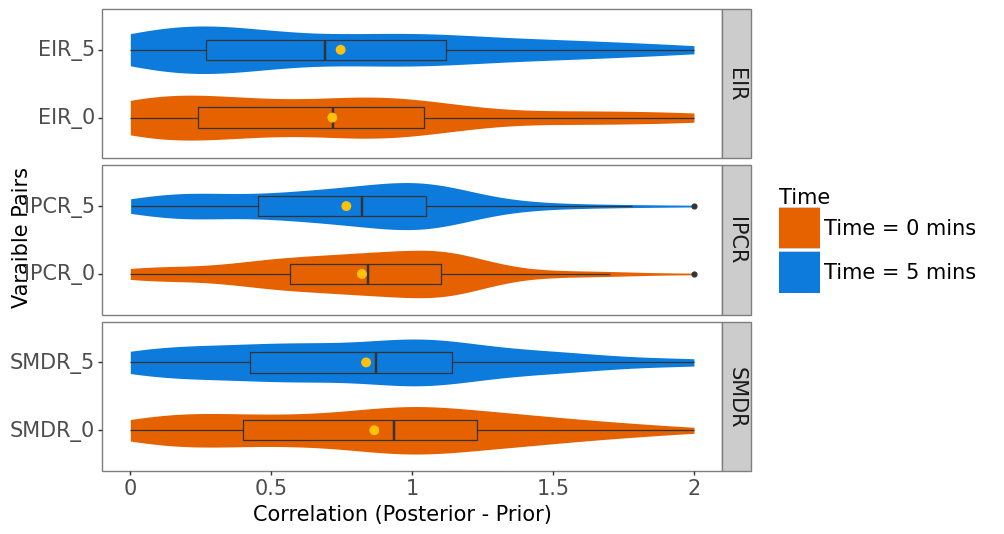

{<ggplot: (8765198282542)>}

In [560]:
 p2 = {p9.ggplot(data_melt2, p9.aes(x='variable', y='value', fill='Time')) + 
 p9.geom_violin(width = 0.7, color = 'none') +
 p9.geom_boxplot(fill='none', width= 0.3 ) +
#  p9.scale_fill_manual(['lightsalmon', 'lightskyblue']) +
p9.scale_fill_manual(['#E66100', '#0C7BDC']) +       
 p9.coord_flip() +
 p9.facet_grid('Dataset ~ .', scales="free") + 
 p9.labels.ylab('Correlation (Posterior - Prior)') +
 p9.labels.xlab('Varaible Pairs') +
 p9.theme_bw() +
 p9.theme(figure_size=(8,6), legend_key_size =30, text= p9.element_text(size = 15),
          panel_grid_major = p9.element_blank(),
          panel_grid_minor = p9.element_blank(),
         ) +
p9.stat_summary(fun_data='mean_cl_normal', geom='point', size=3.0, fill='#FFC20A', color='#FFC20A')}

p2

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (13,13))

df_all_bp = pd.DataFrame()

# df_all_bp = pd.concat([df_IPCR_bp, df_SMDR_bp, df_EIR_bp])
# df_all_bp

corrplot = sns.boxplot(x = "variable", y = "value", data = pd.melt(df_all_bp), width = 0.1)


# plt.xticks([0.0, 0.2, 0.4, 1.0, 1.2, 1.4])
# plt.xlabel('Timer Value', fontsize = 17)
# plt.ylabel('Correlation Difference [Posterior - Data]', fontsize = 17)

corrplot.set_xlabel('Timer Value', fontsize = 17)
corrplot.set_xticks([0.0, 0.5, 1.0, 3.0, 3.5, 4.0])
corrplot.set_xticklabels(['t1=0', 't2=0', 't2=0', 't1=5', 't2=5', 't2=5'], fontsize = 14)
corrplot.set_ylabel('Correlation Difference [Posterior - Data]', fontsize = 17)

# corrplot.set_title('Immigrant Population x Crime Rate', fontsize = 17)
# plt.savefig("boxplot_corrDataPost_IPCR.png") 

In [ ]:
####################################### Scatterplot for all variables #################################################################

In [443]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns

Text(0.5, 1.0, 'Immigrant Population x Crime Rate')

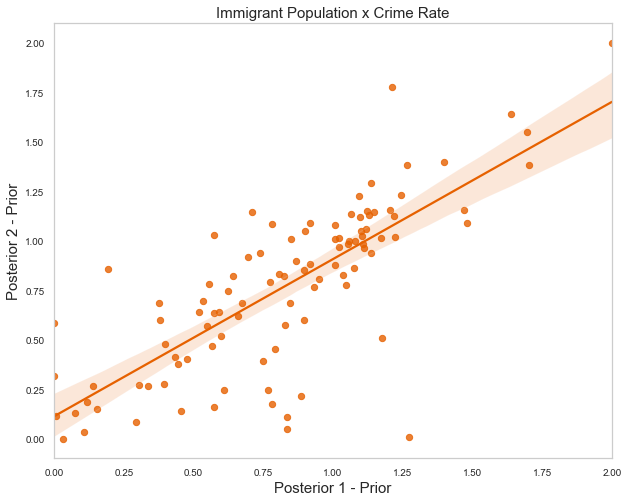

In [444]:
plt.figure(figsize = (10,8))

# plt.scatter(x = df_IPCR_plot['corr_diff_prior_post1_notAbs'], y = df_IPCR_plot['corr_diff_prior_post2_notAbs'], marker = 'o', s = 200, alpha=0.6)
# c='violet',
sns.regplot(df_IPCR_plot.corr_diff_prior_post1_notAbs, df_IPCR_plot.corr_diff_prior_post2_notAbs, color = '#E66100',  scatter_kws={'s':40})

plt.xlabel('Posterior 1 - Prior', fontsize = 15)
plt.ylabel('Posterior 2 - Prior', fontsize = 15)
plt.title('Immigrant Population x Crime Rate', fontsize = 15)
# plt.savefig("IPCR_regPriorPosterior_notAbs.png")

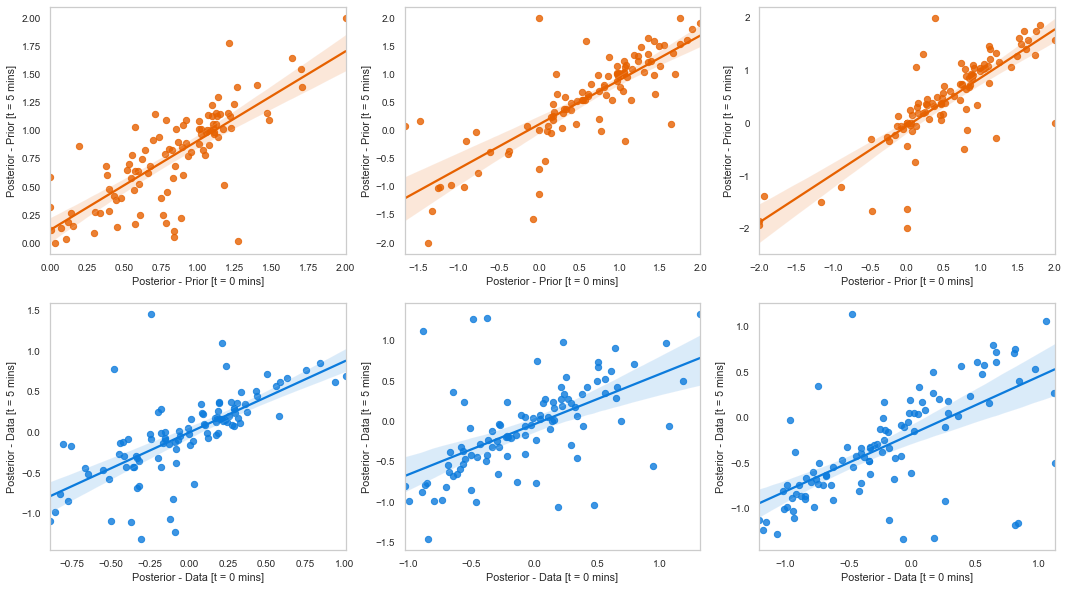

In [445]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# plt.style.use('seaborn-whitegrid')

sns.set(font_scale = 0.9)
sns.set_style("whitegrid", {'axes.grid' : False})


sns.regplot(df_IPCR_plot.corr_diff_prior_post1_notAbs, df_IPCR_plot.corr_diff_prior_post2_notAbs, color = '#E66100',  scatter_kws = {'s':40}, ax=axes[0, 0])
sns.regplot(df_SMDR_plot.corr_diff_prior_post1_notAbs, df_SMDR_plot.corr_diff_prior_post2_notAbs, color = '#E66100',  scatter_kws = {'s':40}, ax=axes[0, 1])
sns.regplot(df_EIR_plot.corr_diff_prior_post1_notAbs, df_EIR_plot.corr_diff_prior_post2_notAbs, color = '#E66100',  scatter_kws = {'s':40}, ax=axes[0, 2])

sns.regplot(df_IPCR_plot.corr_diff_data_post1_notAbs, df_IPCR_plot.corr_diff_data_post2_notAbs, color = '#0C7BDC',  scatter_kws={'s':40}, ax=axes[1, 0])
sns.regplot(df_SMDR_plot.corr_diff_data_post1_notAbs, df_SMDR_plot.corr_diff_data_post2_notAbs, color = '#0C7BDC',  scatter_kws={'s':40}, ax=axes[1, 1])
sns.regplot(df_EIR_plot.corr_diff_data_post1_notAbs, df_EIR_plot.corr_diff_data_post2_notAbs, color = '#0C7BDC',  scatter_kws = {'s':40}, ax=axes[1, 2])

# axes[0, 0].set(xlabel = None, ylabel = None)
# axes[0, 0].grid(False)
# axes[0, 1].set(xlabel = None, ylabel = None)
# axes[0, 1].grid(False)
# axes[0, 2].set(xlabel = None, ylabel = None)
# axes[0, 2].grid(False)

# axes[1, 0].set(xlabel = None, ylabel = None)
# axes[1, 0].grid(False)
# axes[1, 1].set(xlabel = None, ylabel = None)
# axes[1, 1].grid(False)
# axes[1, 2].set(xlabel = None, ylabel = None)
# axes[1, 2].grid(False)

# axes[0, 0].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]', title = 'Immigrant Population x Crime Rate')
# axes[0, 0].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]', title = 'Immigrant Population x Crime Rate')
# axes[0, 1].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]', title = 'Social Media Hours x Depression Rate')
# axes[0, 2].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]', title = 'Years of Education x Income')

axes[0, 0].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')
axes[0, 1].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')
axes[0, 2].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')


axes[1, 0].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')
axes[1, 1].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')
axes[1, 2].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')


# sns.regplot(ax=axes[1, 2], data=iris, x='species', y='petal_length')
plt.savefig("paper_scatterplot_v0.png")

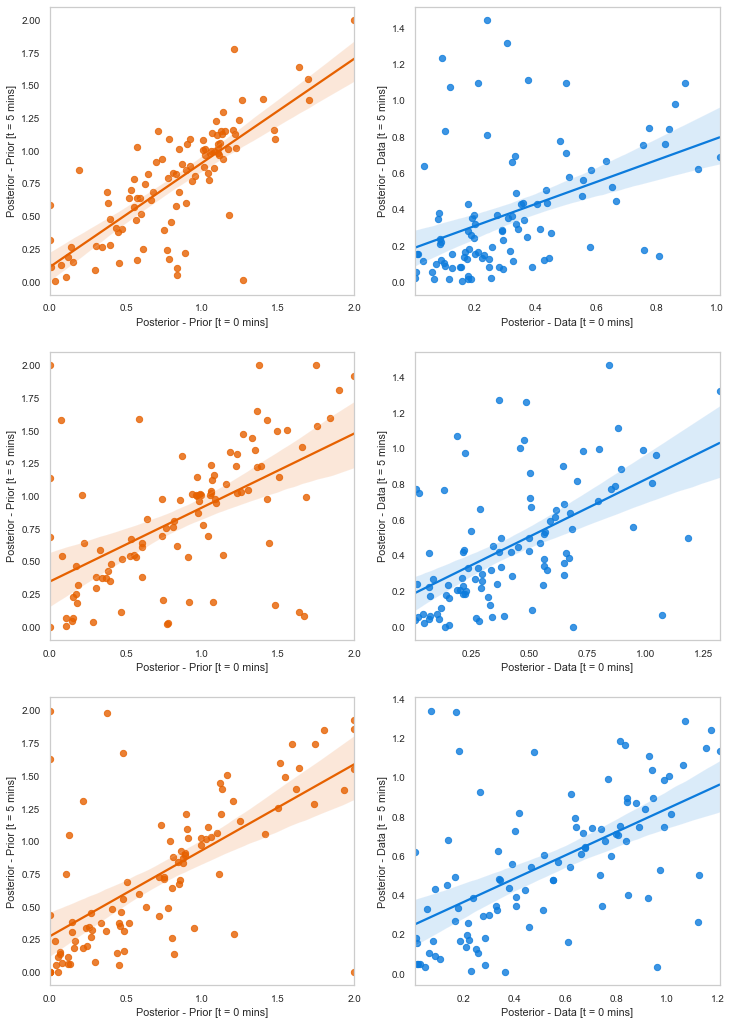

In [446]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# plt.style.use('seaborn-whitegrid')

sns.set(font_scale = 1.4)
sns.set_style("whitegrid", {'axes.grid' : False})

sns.regplot(df_IPCR_plot.corr_diff_prior_post1, df_IPCR_plot.corr_diff_prior_post2, color = '#E66100',  scatter_kws = {'s':40}, ax=axes[0, 0])
sns.regplot(df_IPCR_plot.corr_diff_data_post1, df_IPCR_plot.corr_diff_data_post2, color = '#0C7BDC',  scatter_kws={'s':40}, ax=axes[0, 1])

sns.regplot(df_SMDR_plot.corr_diff_prior_post1, df_SMDR_plot.corr_diff_prior_post2, color = '#E66100',  scatter_kws = {'s':40}, ax=axes[1, 0])
sns.regplot(df_SMDR_plot.corr_diff_data_post1, df_SMDR_plot.corr_diff_data_post2, color = '#0C7BDC',  scatter_kws={'s':40}, ax=axes[1, 1])

sns.regplot(df_EIR_plot.corr_diff_prior_post1, df_EIR_plot.corr_diff_prior_post2, color = '#E66100',  scatter_kws = {'s':40}, ax=axes[2, 0])
sns.regplot(df_EIR_plot.corr_diff_data_post1, df_EIR_plot.corr_diff_data_post2, color = '#0C7BDC',  scatter_kws = {'s':40}, ax=axes[2, 1])


axes[0, 0].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')
axes[0, 1].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')

axes[1, 0].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')
axes[1, 1].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')

axes[2, 0].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')
axes[2, 1].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')


# sns.regplot(ax=axes[1, 2], data=iris, x='species', y='petal_length')
plt.savefig("paper_scatterplot_v0.png")

[Text(0.5, 0, 'Posterior - Data [t = 0 mins]'),
 Text(0, 0.5, 'Posterior - Data [t = 5 mins]')]

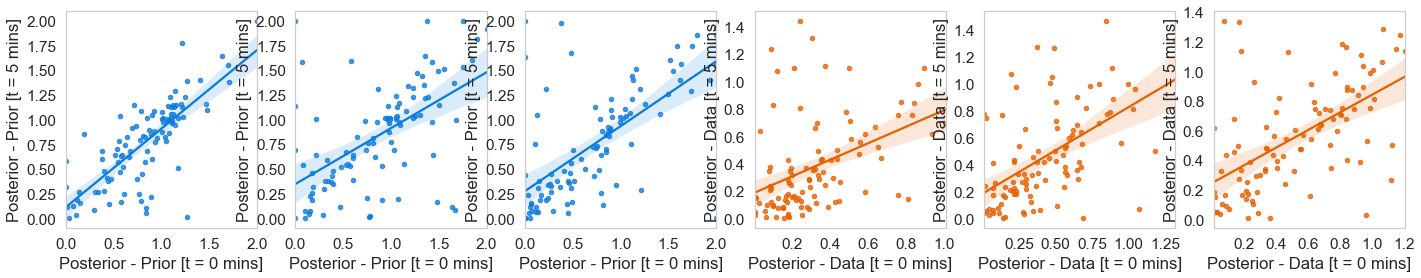

In [447]:
fig, axes = plt.subplots(1, 6, figsize=(24, 4))

sns.set(font_scale = 0.9)
sns.set_style("whitegrid", {'axes.grid' : False})


sns.regplot(df_IPCR_plot.corr_diff_prior_post1, df_IPCR_plot.corr_diff_prior_post2, color = '#0C7BDC',  scatter_kws = {'s':20}, ax=axes[0])
sns.regplot(df_SMDR_plot.corr_diff_prior_post1, df_SMDR_plot.corr_diff_prior_post2, color = '#0C7BDC',  scatter_kws = {'s':20}, ax=axes[1])
sns.regplot(df_EIR_plot.corr_diff_prior_post1, df_EIR_plot.corr_diff_prior_post2, color = '#0C7BDC',  scatter_kws = {'s':20}, ax=axes[2])

sns.regplot(df_IPCR_plot.corr_diff_data_post1, df_IPCR_plot.corr_diff_data_post2, color = '#E66100',  scatter_kws={'s':20}, ax=axes[3])
sns.regplot(df_SMDR_plot.corr_diff_data_post1, df_SMDR_plot.corr_diff_data_post2, color = '#E66100',  scatter_kws={'s':20}, ax=axes[4])
sns.regplot(df_EIR_plot.corr_diff_data_post1, df_EIR_plot.corr_diff_data_post2, color = '#E66100',  scatter_kws = {'s':20}, ax=axes[5])

axes[0].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')
axes[1].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')
axes[2].set(xlabel = 'Posterior - Prior [t = 0 mins]', ylabel = 'Posterior - Prior [t = 5 mins]')


axes[3].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')
axes[4].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')
axes[5].set(xlabel = 'Posterior - Data [t = 0 mins]', ylabel = 'Posterior - Data [t = 5 mins]')

# plt.savefig("paper_scatterplot_v0.png")

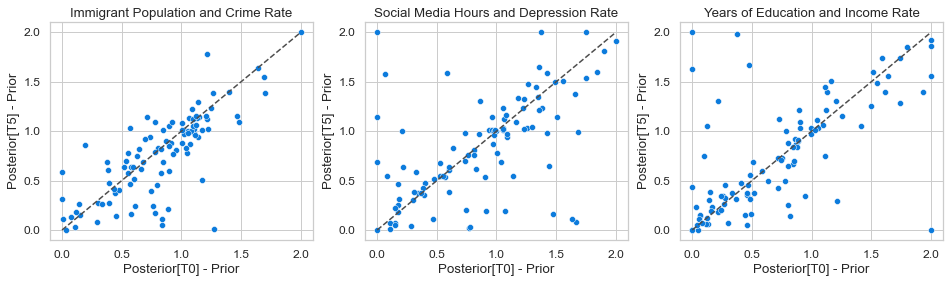

In [438]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.set(font_scale = 1.1)
sns.set_style("whitegrid", {'axes.grid' : True})
# sns.set(style="ticks")

sns.scatterplot(data= df_IPCR_plot, x = "corr_diff_prior_post1", y = "corr_diff_prior_post2", color = '#0C7BDC', ax=axes[0])
max_ipcr = max(max(df_IPCR_plot["corr_diff_prior_post1"]), max(df_IPCR_plot["corr_diff_prior_post2"]))
axes[0].plot([0, max_ipcr],[0, max_ipcr], ls="--", c=".3")

sns.scatterplot(data = df_SMDR_plot, x = "corr_diff_prior_post1", y = "corr_diff_prior_post2", color = '#0C7BDC',  ax=axes[1])
max_smdr = max(max(df_SMDR_plot["corr_diff_prior_post1"]), max(df_SMDR_plot["corr_diff_prior_post2"]))
axes[1].plot([0, max_smdr],[0, max_smdr], ls="--", c=".3")

sns.scatterplot(data = df_EIR_plot, x= "corr_diff_prior_post1", y = "corr_diff_prior_post2", color = '#0C7BDC', ax=axes[2])
max_eir = max(max(df_EIR_plot["corr_diff_prior_post1"]), max(df_EIR_plot["corr_diff_prior_post2"]))
axes[2].plot([0, max_eir],[0, max_eir], ls="--", c=".3")


axes[0].set(xlabel = 'Posterior[T0] - Prior', ylabel = 'Posterior[T5] - Prior', title = "Immigrant Population and Crime Rate")
axes[1].set(xlabel = 'Posterior[T0] - Prior', ylabel = 'Posterior[T5] - Prior', title = "Social Media Hours and Depression Rate")
axes[2].set(xlabel = 'Posterior[T0] - Prior', ylabel = 'Posterior[T5] - Prior', title = "Years of Education and Income Rate")


# plt.show()
plt.savefig("final_plot_eurovis/paper_scatterplot.png")

In [431]:
################################################ Density Plots for all variables ############################################################

In [509]:
df_fin.shape

(303, 26)

In [510]:
df_IPCR_dense = df_fin_IPCR[['ID', 'usertoken', 'prolificID', 'prior_belief', 'data_rho', 'post1_belief', 'post2_belief', 'likert']]

In [511]:
df_IPCR_dense['corr_diff_data_post1'] = abs(df_fin_IPCR['post1_belief'] - df_fin_IPCR['data_rho'])
df_IPCR_dense['corr_diff_data_post2'] = abs(df_fin_IPCR['post2_belief'] - df_fin_IPCR['data_rho'])

df_IPCR_dense['corr_diff_prior_post1'] = abs(df_fin_IPCR['post1_belief'] - df_fin_IPCR['prior_belief'])
df_IPCR_dense['corr_diff_prior_post2'] = abs(df_fin_IPCR['post2_belief'] - df_fin_IPCR['prior_belief'])

<ipython-input-511-df42de0b4f1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-511-df42de0b4f1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-511-df42de0b4f1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-511-df42de0b4

In [512]:
df_IPCR_dense

,ID,usertoken,prolificID,prior_belief,data_rho,post1_belief,post2_belief,likert,corr_diff_data_post1,corr_diff_data_post2,corr_diff_prior_post1,corr_diff_prior_post2
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,0.434880,-0.708554,-0.809420,-0.797963,unlikely,0.100866,0.089409,1.244300,1.232843
1,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,-0.025050,0.865220,0.493294,0.617464,liekly,0.371926,0.247756,0.518344,0.642514
2,62f68027fc70763173e81fe0,MAXHFRS7,629fbe8ae956f7cb13de5073,-0.104058,0.735274,0.462908,0.366334,liekly,0.272366,0.368940,0.566966,0.470392
3,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,0.226913,-0.755907,-0.433702,-0.394178,liekly,0.322205,0.361729,0.660615,0.621091
4,62f68266fc70763173e8200b,GL2yYGVe,6287a8c4a6303ff156cd0853,0.717338,-0.142250,-0.389034,-0.267300,cant_say,0.246785,0.125051,1.106373,0.984638
...,...,...,...,...,...,...,...,...,...,...,...,...
96,62faa37f930ab57fc9fe194e,hfXkNsfz,6107f8812249eaf730bf4688,0.017656,-0.786362,-0.359265,-0.667945,liekly,0.427098,0.118417,0.376921,0.685601
97,62faa683930ab57fc9fe197f,Zb0GxTDm,5f4d84f6835880a75c96c966,0.120045,-0.706581,-1.000000,-0.939679,cant_say,0.293419,0.233098,1.120045,1.059724
98,62faa77d930ab57fc9fe198c,rJ0xFotM,5d51ffd641a6aa0019ca73df,0.195804,-0.803278,0.003723,-0.660161,liekly,0.807001,0.143117,0.192081,0.855965
99,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,0.356332,-0.581407,-0.480288,0.248386,very_likely,0.101120,0.829793,0.836620,0.107946


In [503]:
#################### Analysing the belief movement ########################

In [453]:
########## threshold check ##########
# import numpy as np

# def f(x):
#     if x['corr_diff_data_post1'] <= 0.05 and x['corr_diff_data_post2'] <= 0.05: return 'Tie'
#     elif x['corr_diff_data_post1'] <= 0.05 and x['corr_diff_data_post2'] > 0.05: return 'Decay'
#     elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] <= 0.05: return 'Strength'
#     elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] > 0.05 and x['corr_diff_data_post1'] < x['corr_diff_data_post2']: return 'Decay'
#     elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] > 0.05 and x['corr_diff_data_post1'] > x['corr_diff_data_post2']: return 'Strength'
#     else: return 'Tie'

# df_IPCR_dense['Winner1'] = df_IPCR_dense.apply(f, axis=1)

# ########## threshold check ##########
# def f(x):
#     if x['corr_diff_prior_post1'] <= 0.05 and x['corr_diff_prior_post2'] <= 0.05: return 'Tie'
#     elif x['corr_diff_prior_post1'] <= 0.05 and x['corr_diff_prior_post2'] > 0.05: return 'Strength'
#     elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] <= 0.05: return 'Decay'
#     elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] > 0.05 and x['corr_diff_prior_post1'] > x['corr_diff_prior_post2']: return 'Decay'
#     elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Strength'
#     else: return 'Tie'

# df_IPCR_dense['Winner2'] = df_IPCR_dense.apply(f, axis=1)

In [454]:
# conditions = [df_IPCR_dense['corr_diff_data_post1'] > df_IPCR_dense['corr_diff_data_post2'], 
#               df_IPCR_dense['corr_diff_data_post1'] < df_IPCR_dense['corr_diff_data_post2']]

# #define choices
# # choices = ['Posterior 1', 'Posterior 2']
# choices = ['Beliefs Closer to Supporting Data', 'Possible Decay']

# #create new column in DataFrame that displays results of comparisons
# df_IPCR_dense['Winner1'] = np.select(conditions, choices, default = 'Tie')

In [67]:
########## Threshold check (Data) ##########

def f(x):
    if abs(x['corr_diff_data_post1'] - x['corr_diff_data_post2']) <= 0.05: return 'Tie'
    elif abs(x['corr_diff_data_post1'] - x['corr_diff_data_post2']) > 0.05 and x['corr_diff_data_post1'] > x['corr_diff_data_post2']: return 'Strength'
    else: return 'Decay'

df_IPCR_dense['Winner1'] = df_IPCR_dense.apply(f, axis=1)

<ipython-input-67-f5f5ef460653>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [513]:
########## Threshold check (Prior) ##########

def f(x):
    if abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) <= 0.05: return 'Maintainance'
    elif abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Towards Data'
    else: return 'Towards Prior'

df_IPCR_dense['Update'] = df_IPCR_dense.apply(f, axis=1)

<ipython-input-513-fd0230fd3e99>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [507]:
# ########## Threshold check (Prior)++ ##########

# def f(x):
#     if abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) <= 0.05 or (x['post2_belief'] >= x['post1_belief'] and  x['post2_belief'] <= x['post1_belief']-0.1): return 'Maintainance'
#     elif abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Towards Data'
#     else: return 'Towards Prior'

# df_IPCR_dense['Update3'] = df_IPCR_dense.apply(f, axis=1)

<ipython-input-507-9be257f8980c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [69]:
# conditions = [df_IPCR_dense['corr_diff_prior_post1'] < df_IPCR_dense['corr_diff_prior_post2'], 
#               df_IPCR_dense['corr_diff_prior_post1'] > df_IPCR_dense['corr_diff_prior_post2']]

# #define choices
# # choices = ['Posterior 1', 'Posterior 2']
# choices = ['Beliefs Closer to Supporting Data', 'Possible Decay']

# #create new column in DataFrame that displays results of comparisons
# df_IPCR_dense['Winner2'] = np.select(conditions, choices, default = 'Tie')

In [70]:
len(df_IPCR_dense.loc[df_IPCR_dense['Winner1'] == 'Tie']), len(df_IPCR_dense.loc[df_IPCR_dense['Winner1'] == 'Decay']), len(df_IPCR_dense.loc[df_IPCR_dense['Winner1'] == 'Strength'])

(29, 37, 35)

In [475]:
len(df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Tie']), len(df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Decay']), len(df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Strength'])

(25, 45, 31)

In [508]:
print(len(df_IPCR_dense.loc[df_IPCR_dense['Update3'] == 'Tie'])) 
print(len(df_IPCR_dense.loc[df_IPCR_dense['Update3'] == 'Decay']))
print(len(df_IPCR_dense.loc[df_IPCR_dense['Update3'] == 'Strength']))

0
0
0


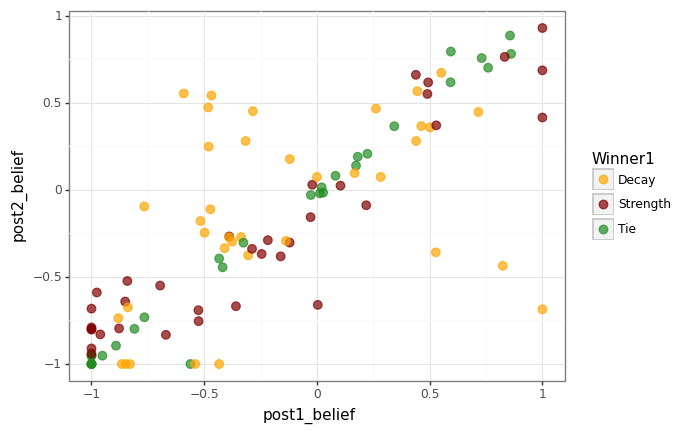

{<ggplot: (8785476442850)>}

In [72]:
pdense1 = {p9.ggplot(df_IPCR_dense, p9.aes(x = 'post1_belief', y = 'post2_belief', color='Winner1')) + 
  p9.geom_point(size = 3, alpha = 0.7) + 
  p9.scale_color_manual(['orange', 'maroon', 'forestgreen']) + 
  p9.theme_bw()}

pdense1

# ['goldenrod', 'forestgreen', 'mediumorchid']

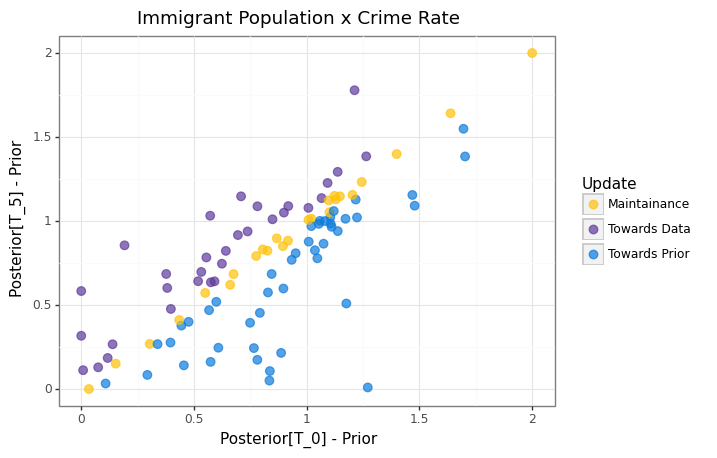

{<ggplot: (8785541514183)>}

In [517]:
pdense2 = {p9.ggplot(df_IPCR_dense, p9.aes(x = 'corr_diff_prior_post1', y = 'corr_diff_prior_post2', color = 'Update')) + 
  p9.geom_point(size = 3, alpha = 0.7) + 
  p9.scale_color_manual(['#FFC20A', '#5D3A9B', '#0C7BDC']) + 
    p9.labels.ylab('Posterior[T_5] - Prior') +
    p9.labels.xlab('Posterior[T_0] - Prior') +
    p9.labs(title='Immigrant Population x Crime Rate')+
  p9.theme_bw()}

pdense2

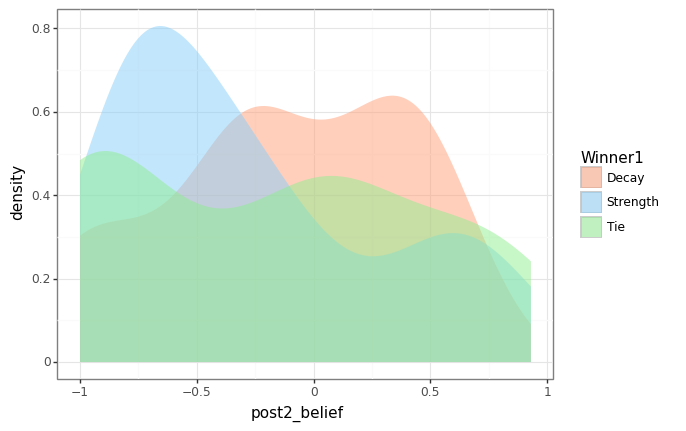

{<ggplot: (8785591280562)>}

In [74]:
pdense1_2 = {p9.ggplot(df_IPCR_dense, p9.aes(x='post2_belief', fill='Winner1')) + 
             p9.geom_density(alpha = 0.5, color = 'none') + 
             p9.scale_fill_manual(['lightsalmon', 'lightskyblue', 'lightgreen']) + 
             
             p9.theme_bw()}
    
pdense1_2

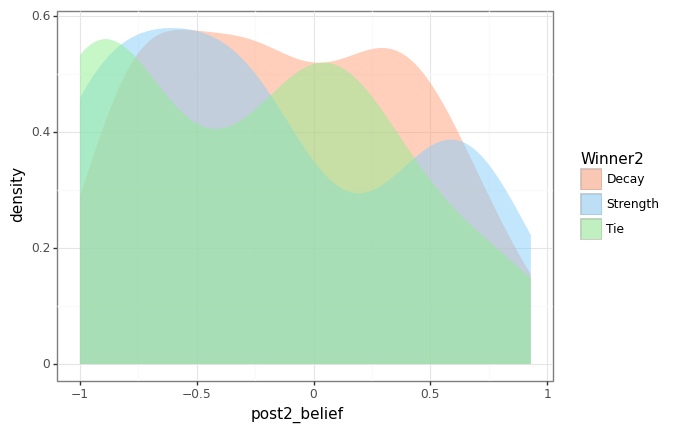

{<ggplot: (8785476192937)>}

In [75]:
pdense2_2 = {p9.ggplot(df_IPCR_dense, p9.aes(x='post2_belief', fill='Winner2')) + 
             p9.geom_density(alpha = 0.5, color = 'none') + 
             p9.scale_fill_manual(['lightsalmon', 'lightskyblue', 'lightgreen']) + 
             p9.theme_bw()}
    
pdense2_2

In [76]:
#################### uncertainty analysis ########################

In [77]:
df_fin_IPCR.columns

Index(['ID', 'usertoken', 'prolificID', 'gender', 'age', 'race', 'education',
       'variables', 'timerVal', 'prior_belief', 'prior_uncertainty_L',
       'prior_uncertainty_R', 'data_rho', 'data_CI_L', 'data_CI_R',
       'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R',
       'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R',
       'retro_prior', 'retro_post1', 'retro_post2', 'likert', 'survey'],
      dtype='object')

In [78]:
df_IPCR_dense['prior_uncertainty_weight'] = abs(df_fin_IPCR['prior_uncertainty_L'] - df_fin_IPCR['prior_uncertainty_R'])
df_IPCR_dense['data_uncertainty_weight'] = abs(df_fin_IPCR['data_CI_L'] - df_fin_IPCR['data_CI_R'])
df_IPCR_dense['post1_uncertainty_weight'] = abs(df_fin_IPCR['post1_uncertainty_L'] - df_fin_IPCR['post1_uncertainty_R'])
df_IPCR_dense['post2_uncertainty_weight'] = abs(df_fin_IPCR['post2_uncertainty_L'] - df_fin_IPCR['post2_uncertainty_R'])

<ipython-input-78-423ab93386b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-78-423ab93386b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-78-423ab93386b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-78-423ab93386b4>

In [79]:
def f(x):
    if (x['post2_uncertainty_weight'] - x['post1_uncertainty_weight']) > 0.05: return 'Decay-Unsure'
    elif (x['post2_uncertainty_weight'] - x['post1_uncertainty_weight']) < -0.05: return 'Strength-Sure'
    else: return 'Same'

df_IPCR_dense['Uncertainty-Movement'] = df_IPCR_dense.apply(f, axis=1)

<ipython-input-79-12262f3fccbc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [80]:
len(df_IPCR_dense.loc[df_IPCR_dense['Uncertainty-Movement'] == 'Same']), len(df_IPCR_dense.loc[df_IPCR_dense['Uncertainty-Movement'] == 'Decay-Unsure']), len(df_IPCR_dense.loc[df_IPCR_dense['Uncertainty-Movement'] == 'Strength-Sure'])

(15, 38, 48)

In [468]:
######################################## SMDR ########################################

In [526]:
df_SMDR_dense = df_fin_SMDR[['ID', 'usertoken', 'prolificID', 'prior_belief', 'data_rho', 'post1_belief', 'post2_belief', 'likert']]

In [527]:
df_SMDR_dense['corr_diff_data_post1'] = abs(df_fin_SMDR['post1_belief'] - df_fin_SMDR['data_rho'])
df_SMDR_dense['corr_diff_data_post2'] = abs(df_fin_SMDR['post2_belief'] - df_fin_SMDR['data_rho'])

df_SMDR_dense['corr_diff_prior_post1'] = abs(df_fin_SMDR['post1_belief'] - df_fin_SMDR['prior_belief'])
df_SMDR_dense['corr_diff_prior_post2'] = abs(df_fin_SMDR['post2_belief'] - df_fin_SMDR['prior_belief'])

<ipython-input-527-33fbc7d53776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-527-33fbc7d53776>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-527-33fbc7d53776>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-527-33fbc7d53

In [528]:
df_SMDR_dense

,ID,usertoken,prolificID,prior_belief,data_rho,post1_belief,post2_belief,likert,corr_diff_data_post1,corr_diff_data_post2,corr_diff_prior_post1,corr_diff_prior_post2
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,0.271157,-0.739900,-0.786482,-0.763407,cant_say,0.046582,0.023507,1.057640,1.034564
1,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,1.000000,0.053562,0.601276,0.521896,liekly,0.547714,0.468334,0.398724,0.478104
2,62f68027fc70763173e81fe0,MAXHFRS7,629fbe8ae956f7cb13de5073,0.457979,-0.465499,0.377980,1.000000,very_likely,0.843479,1.465499,0.079999,0.542021
3,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,0.323255,-0.697576,-0.415454,-0.370445,cant_say,0.282121,0.327131,0.738709,0.693700
4,62f68266fc70763173e8200b,GL2yYGVe,6287a8c4a6303ff156cd0853,0.000142,-0.752840,-0.765707,0.018733,liekly,0.012867,0.771573,0.765850,0.018590
...,...,...,...,...,...,...,...,...,...,...,...,...
96,62faa37f930ab57fc9fe194e,hfXkNsfz,6107f8812249eaf730bf4688,1.000000,-0.206327,0.255730,0.793910,liekly,0.462057,1.000237,0.744270,0.206090
97,62faa683930ab57fc9fe197f,Zb0GxTDm,5f4d84f6835880a75c96c966,1.000000,-0.015667,0.267089,0.019536,cant_say,0.282756,0.035203,0.732911,0.980464
98,62faa77d930ab57fc9fe198c,rJ0xFotM,5d51ffd641a6aa0019ca73df,0.010892,-0.720754,-0.209513,-0.627238,cant_say,0.511241,0.093516,0.220405,0.638130
99,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,-1.000000,-0.063937,-0.089413,-0.811280,very_likely,0.025477,0.747344,0.910587,0.188720


In [38]:
#################### Analysing the belief movement ########################

In [473]:
########## threshold check ##########
# import numpy as np

# def f(x):
#     if x['corr_diff_data_post1'] <= 0.05 and x['corr_diff_data_post2'] <= 0.05: return 'Tie'
#     elif x['corr_diff_data_post1'] <= 0.05 and x['corr_diff_data_post2'] > 0.05: return 'Decay'
#     elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] <= 0.05: return 'Strength'
#     elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] > 0.05 and x['corr_diff_data_post1'] < x['corr_diff_data_post2']: return 'Decay'
#     elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] > 0.05 and x['corr_diff_data_post1'] > x['corr_diff_data_post2']: return 'Strength'
#     else: return 'Tie'

# df_SMDR_dense['Winner1'] = df_SMDR_dense.apply(f, axis=1)

# def f(x):
#     if x['corr_diff_prior_post1'] <= 0.05 and x['corr_diff_prior_post2'] <= 0.05: return 'Tie'
#     elif x['corr_diff_prior_post1'] <= 0.05 and x['corr_diff_prior_post2'] > 0.05: return 'Strength'
#     elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] <= 0.05: return 'Decay'
#     elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] > 0.05 and x['corr_diff_prior_post1'] > x['corr_diff_prior_post2']: return 'Decay'
#     elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Strength'
#     else: return 'Tie'

# df_SMDR_dense['Winner2'] = df_SMDR_dense.apply(f, axis=1)

<ipython-input-473-56917a197bbd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [49]:
########## Threshold check (Data) ##########

def f(x):
    if abs(x['corr_diff_data_post1'] - x['corr_diff_data_post2']) <= 0.05: return 'Tie'
    elif abs(x['corr_diff_data_post1'] - x['corr_diff_data_post2']) > 0.05 and x['corr_diff_data_post1'] > x['corr_diff_data_post2']: return 'Strength'
    else: return 'Decay'

df_SMDR_dense['Winner1'] = df_SMDR_dense.apply(f, axis=1)

<ipython-input-49-92e6c385dfcd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [529]:
########## Threshold check (Prior) ##########

def f(x):
    if abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) <= 0.05: return 'Maintenance'
    elif abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Towards Data'
    else: return 'Towards Prior'

df_SMDR_dense['Update'] = df_SMDR_dense.apply(f, axis=1)

<ipython-input-529-43fc4b6f8b94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


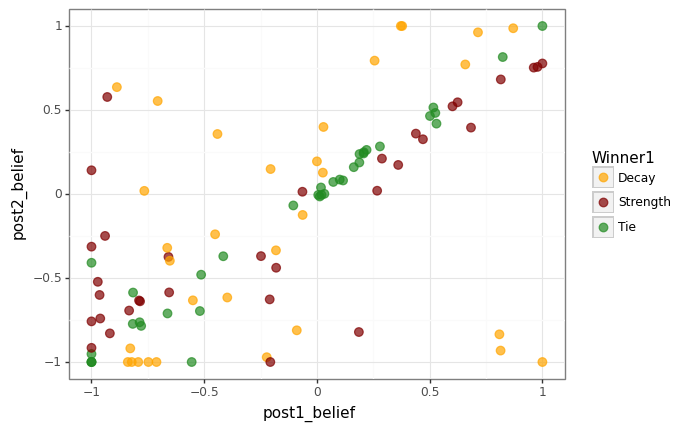

{<ggplot: (8785490517652)>}

In [51]:
pdense3 = {p9.ggplot(df_SMDR_dense, p9.aes(x = 'post1_belief', y = 'post2_belief', color='Winner1')) + 
  p9.geom_point(size = 3, alpha = 0.7) + 
  p9.scale_color_manual(['orange', 'maroon', 'forestgreen']) + 
  p9.theme_bw()}

pdense3

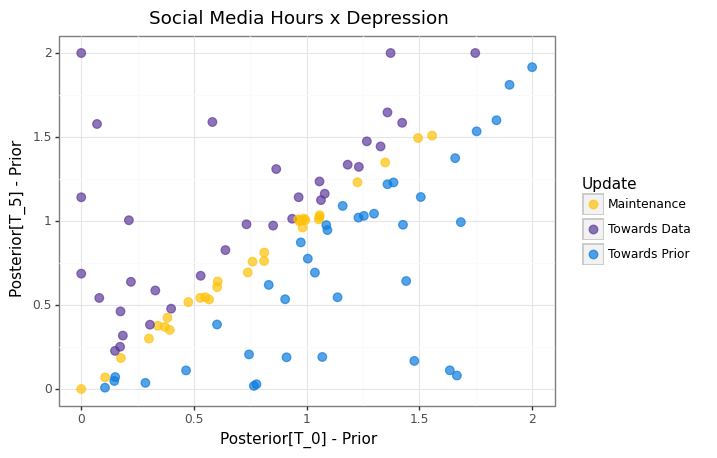

{<ggplot: (8785476562327)>}

In [534]:
pdense4 = {p9.ggplot(df_SMDR_dense, p9.aes(x = 'corr_diff_prior_post1', y = 'corr_diff_prior_post2', color = 'Update')) + 
  p9.geom_point(size = 3, alpha = 0.7) + 
  p9.scale_color_manual(['#FFC20A', '#5D3A9B', '#0C7BDC']) + 
    p9.labels.ylab('Posterior[T_5] - Prior') +
    p9.labels.xlab('Posterior[T_0] - Prior') +
    p9.labs(title='Social Media Hours x Depression')+
  p9.theme_bw()}

pdense4

In [53]:
len(df_SMDR_dense.loc[df_SMDR_dense['Winner1'] == 'Tie']), len(df_SMDR_dense.loc[df_SMDR_dense['Winner1'] == 'Decay']), len(df_SMDR_dense.loc[df_SMDR_dense['Winner1'] == 'Strength'])

(36, 32, 33)

In [463]:
len(df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Tie']), len(df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Decay']), len(df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Strength'])

(45, 31, 25)

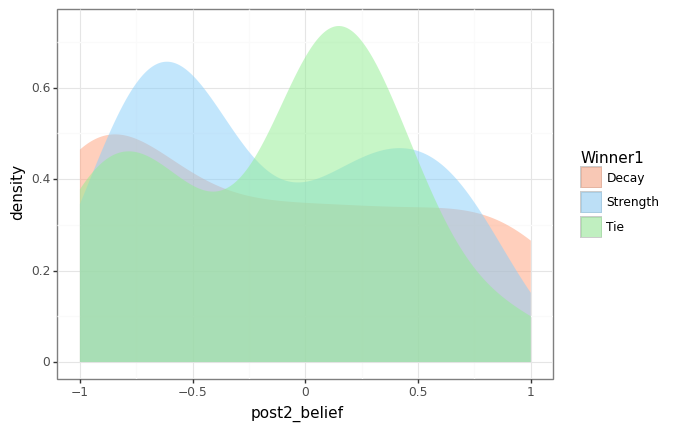

{<ggplot: (8785507117858)>}

In [55]:
pdense3_2 = {p9.ggplot(df_SMDR_dense, p9.aes(x='post2_belief', fill='Winner1')) + 
             p9.geom_density(alpha = 0.5, color = 'none') + 
             p9.scale_fill_manual(['lightsalmon', 'lightskyblue', 'lightgreen']) + 
             p9.theme_bw()}
    
pdense3_2

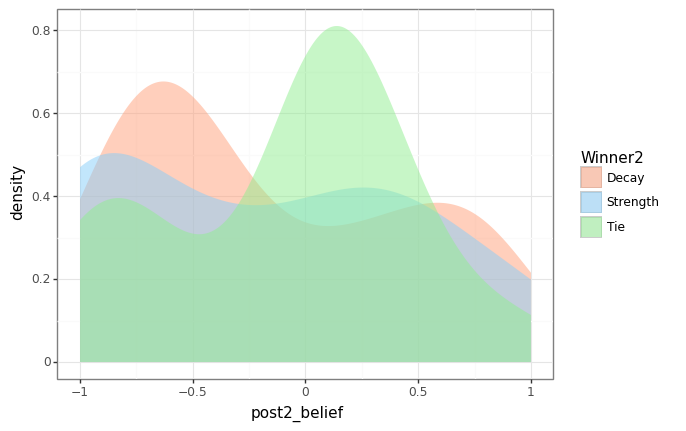

{<ggplot: (8785523986869)>}

In [56]:
pdense4_2 = {p9.ggplot(df_SMDR_dense, p9.aes(x='post2_belief', fill='Winner2')) + 
             p9.geom_density(alpha = 0.5, color = 'none') + 
             p9.scale_fill_manual(['lightsalmon', 'lightskyblue', 'lightgreen']) + 
             p9.theme_bw()}
    
pdense4_2

In [57]:
#################### uncertainty analysis ########################

In [58]:
df_SMDR_dense['prior_uncertainty_weight'] = abs(df_fin_SMDR['prior_uncertainty_L'] - df_fin_SMDR['prior_uncertainty_R'])
df_SMDR_dense['data_uncertainty_weight'] = abs(df_fin_SMDR['data_CI_L'] - df_fin_SMDR['data_CI_R'])
df_SMDR_dense['post1_uncertainty_weight'] = abs(df_fin_SMDR['post1_uncertainty_L'] - df_fin_SMDR['post1_uncertainty_R'])
df_SMDR_dense['post2_uncertainty_weight'] = abs(df_fin_SMDR['post2_uncertainty_L'] - df_fin_SMDR['post2_uncertainty_R'])

<ipython-input-58-999852341b51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-58-999852341b51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-58-999852341b51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-58-999852341b51>

In [59]:
df_SMDR_dense['post1_uncertainty_weight']

0      0.380357
1      1.313929
2      0.634602
3      0.629733
4      0.795517
         ...   
96     1.882856
97     0.622245
98     1.016433
99     0.852761
100    0.441204
Name: post1_uncertainty_weight, Length: 101, dtype: float64

In [60]:
def f(x):
    if (x['post2_uncertainty_weight'] - x['post1_uncertainty_weight']) > 0.05: return 'Decay-Unsure'
    elif (x['post2_uncertainty_weight'] - x['post1_uncertainty_weight']) < -0.05: return 'Strength-Sure'
    else: return 'Same'

df_SMDR_dense['Uncertainty-Movement'] = df_SMDR_dense.apply(f, axis=1)

<ipython-input-60-e14e8c15f364>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
print(len(df_SMDR_dense.loc[df_SMDR_dense['Uncertainty-Movement'] == 'Same']))
print(len(df_SMDR_dense.loc[df_SMDR_dense['Uncertainty-Movement'] == 'Decay-Unsure']))
print(len(df_SMDR_dense.loc[df_SMDR_dense['Uncertainty-Movement'] == 'Strength-Sure']))

20
38
43


In [487]:
######################################## EIR ########################################

In [548]:
df_EIR_dense = df_fin_EIR[['ID', 'usertoken', 'prolificID', 'prior_belief','data_rho', 'post1_belief', 'post2_belief', 'likert']]

In [549]:
df_EIR_dense['corr_diff_data_post1'] = abs(df_fin_EIR['post1_belief'] - df_fin_EIR['data_rho'])
df_EIR_dense['corr_diff_data_post2'] = abs(df_fin_EIR['post2_belief'] - df_fin_EIR['data_rho'])

df_EIR_dense['corr_diff_prior_post1'] = abs(df_fin_EIR['post1_belief'] - df_fin_EIR['prior_belief'])
df_EIR_dense['corr_diff_prior_post2'] = abs(df_fin_EIR['post2_belief'] - df_fin_EIR['prior_belief'])

<ipython-input-549-190924dbb830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-549-190924dbb830>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-549-190924dbb830>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-549-190924dbb

In [525]:
########## threshold check ##########
import numpy as np

def f(x):
    if x['corr_diff_data_post1'] <= 0.05 and x['corr_diff_data_post2'] <= 0.05: return 'Tie'
    elif x['corr_diff_data_post1'] <= 0.05 and x['corr_diff_data_post2'] > 0.05: return 'Decay'
    elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] <= 0.05: return 'Strength'
    elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] > 0.05 and x['corr_diff_data_post1'] < x['corr_diff_data_post2']: return 'Decay'
    elif x['corr_diff_data_post1'] > 0.05 and x['corr_diff_data_post2'] > 0.05 and x['corr_diff_data_post1'] > x['corr_diff_data_post2']: return 'Strength'
    else: return 'Tie'

df_EIR_dense['Winner1'] = df_EIR_dense.apply(f, axis=1)

########## threshold check ##########
def f(x):
    if x['corr_diff_prior_post1'] <= 0.05 and x['corr_diff_prior_post2'] <= 0.05: return 'Tie'
    elif x['corr_diff_prior_post1'] <= 0.05 and x['corr_diff_prior_post2'] > 0.05: return 'Decay'
    elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] <= 0.05: return 'Strength'
    elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] > 0.05 and x['corr_diff_prior_post1'] > x['corr_diff_prior_post2']: return 'Decay'
    elif x['corr_diff_prior_post1'] > 0.05 and x['corr_diff_prior_post2'] > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Strength'
    else: return 'Tie'

df_EIR_dense['Update'] = df_EIR_dense.apply(f, axis=1)

<ipython-input-525-a011b14e046b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-525-a011b14e046b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [84]:
########## Threshold check (Data) ##########

def f(x):
    if abs(x['corr_diff_data_post1'] - x['corr_diff_data_post2']) <= 0.1: return 'Tie'
    elif abs(x['corr_diff_data_post1'] - x['corr_diff_data_post2']) > 0.1 and x['corr_diff_data_post1'] > x['corr_diff_data_post2']: return 'Strength'
    else: return 'Decay'

df_EIR_dense['Winner1'] = df_EIR_dense.apply(f, axis=1)

<ipython-input-84-d39e9a261bf6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [550]:
########## Threshold check (Prior) ##########

def f(x):
    if abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) <= 0.05: return 'Maintenance'
    elif abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Towards Data'
    else: return 'Towards Prior'

df_EIR_dense['Update'] = df_EIR_dense.apply(f, axis=1)

<ipython-input-550-eb5267825e73>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


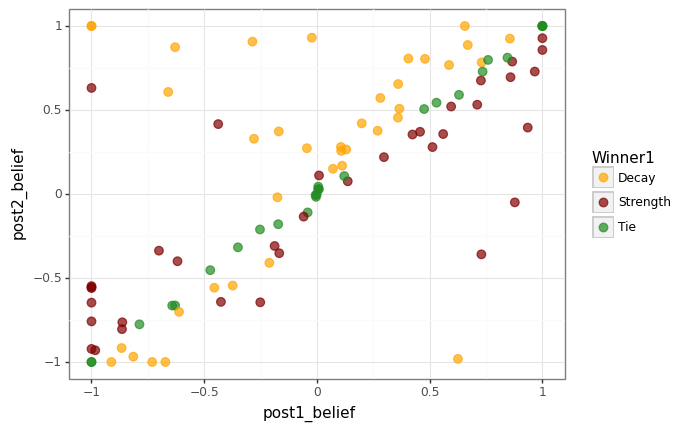

{<ggplot: (8785557875709)>}

In [86]:
pdense5 = {p9.ggplot(df_EIR_dense, p9.aes(x = 'post1_belief', y = 'post2_belief', color='Winner1')) + 
  p9.geom_point(size = 3, alpha = 0.7) + 
  p9.scale_color_manual(['orange', 'maroon', 'forestgreen']) + 
  p9.theme_bw()}

pdense5

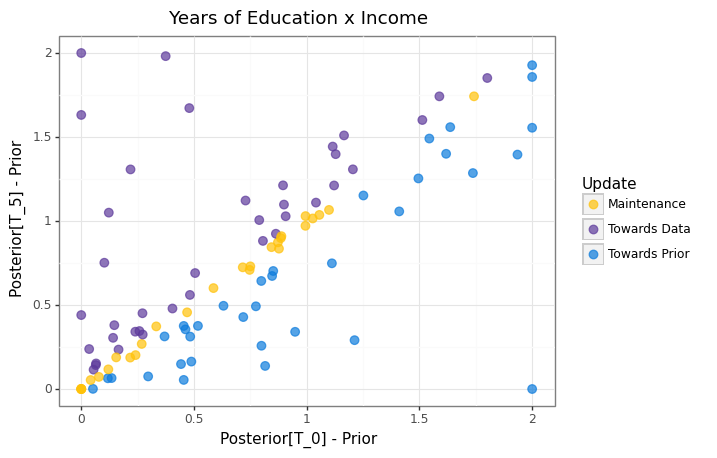

{<ggplot: (8785524143598)>}

In [551]:
pdense6 = {p9.ggplot(df_EIR_dense, p9.aes(x = 'corr_diff_prior_post1', y = 'corr_diff_prior_post2', color = 'Update')) + 
  p9.geom_point(size = 3, alpha = 0.7) + 
  p9.scale_color_manual(['#FFC20A', '#5D3A9B', '#0C7BDC']) + 
    p9.labels.ylab('Posterior[T_5] - Prior') +
    p9.labels.xlab('Posterior[T_0] - Prior') +
    p9.labs(title='Years of Education x Income')+
  p9.theme_bw()}

pdense6

In [547]:
df_EIR_dense

,ID,usertoken,prolificID,prior_belief,data_rho,post1_belief,post2_belief,likert,corr_diff_data_post1,corr_diff_data_post2,corr_diff_prior_post1,corr_diff_prior_post2,Update
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,0.866282,-0.095769,-0.006114,-0.006797,very_likely,0.089655,0.088972,0.872396,0.873079,Tie
1,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,0.289062,-0.782227,0.423752,0.354163,liekly,1.205979,1.136390,0.134690,0.065101,Decay
2,62f68027fc70763173e81fe0,MAXHFRS7,629fbe8ae956f7cb13de5073,0.690306,-0.317047,0.855793,0.924980,very_likely,1.172840,1.242028,0.165487,0.234674,Strength
3,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,1.000000,0.150107,0.625484,-0.981407,very_likely,0.475377,1.131514,0.374516,1.981407,Strength
4,62f68266fc70763173e8200b,GL2yYGVe,6287a8c4a6303ff156cd0853,0.930638,0.110580,0.866087,0.788134,unlikely,0.755506,0.677554,0.064552,0.142504,Strength
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62faa37f930ab57fc9fe194e,hfXkNsfz,6107f8812249eaf730bf4688,1.000000,0.260660,1.000000,1.000000,cant_say,0.739340,0.739340,0.000000,0.000000,Tie
97,62faa683930ab57fc9fe197f,Zb0GxTDm,5f4d84f6835880a75c96c966,0.656447,-0.142279,0.734776,0.728553,cant_say,0.877055,0.870832,0.078329,0.072106,Tie
98,62faa77d930ab57fc9fe198c,rJ0xFotM,5d51ffd641a6aa0019ca73df,1.000000,-0.007539,1.000000,1.000000,liekly,1.007539,1.007539,0.000000,0.000000,Tie
99,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,0.115017,-0.733978,-0.659687,0.607344,unlikely,0.074291,1.341322,0.774704,0.492327,Decay


In [546]:
####Grid of 3 plots with p9
#plots_list = [pdense6, pdense4]


#p9_grid(plots_list, row=None, col=1, height=None, width=None, dpi=500, ratio=None, pixels=10000,
#                  figsize=(12, 8))


#g1234 = (g1|g2|g3)/g4
import patchworklib as pw
pdense6 = pw.load_ggplot(pdense6, figsize=(3,3))
pdense4 = pw.load_ggplot(pdense4, figsize=(3,3))
pdense2 = pw.load_ggplot(pdense2, figsize=(3,3))

g12 = (pdense6|pdense4|pdense2)
g12

ModuleNotFoundError: No module named 'patchworklib'

In [88]:
print(len(df_EIR_dense.loc[df_EIR_dense['Winner1'] == 'Tie']))
print(len(df_EIR_dense.loc[df_EIR_dense['Winner1'] == 'Decay']))
print(len(df_EIR_dense.loc[df_EIR_dense['Winner1'] == 'Strength']))

27
38
36


In [468]:
print(len(df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Tie']))
print(len(df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Decay']))
print(len(df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Strength']))

51
26
24


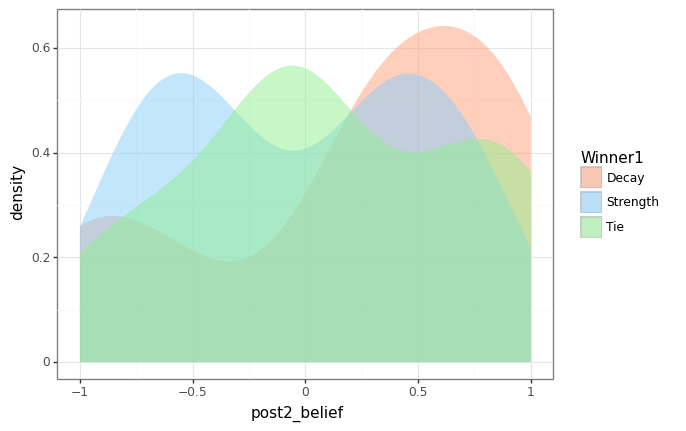

{<ggplot: (8785574472452)>}

In [90]:
pdense5_2 = {p9.ggplot(df_EIR_dense, p9.aes(x='post2_belief', fill='Winner1')) + 
             p9.geom_density(alpha = 0.5, color = 'none') + 
             p9.scale_fill_manual(['lightsalmon', 'lightskyblue', 'lightgreen']) + 
             p9.theme_bw()}
    
pdense5_2

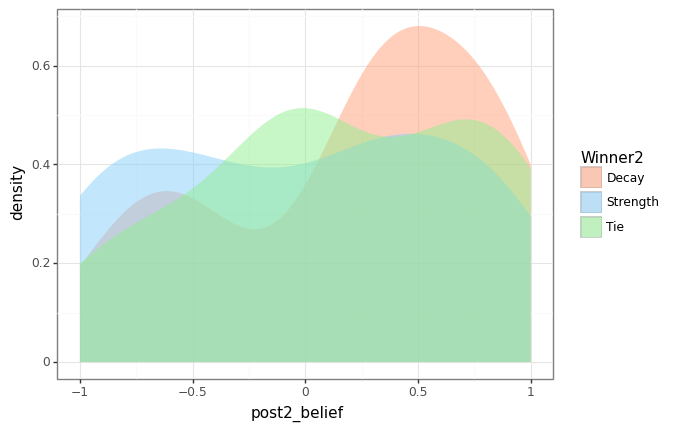

{<ggplot: (8785524034789)>}

In [91]:
pdense6_2 = {p9.ggplot(df_EIR_dense, p9.aes(x='post2_belief', fill='Winner2')) + 
             p9.geom_density(alpha = 0.5, color = 'none') + 
             p9.scale_fill_manual(['lightsalmon', 'lightskyblue', 'lightgreen']) + 
             p9.theme_bw()}
    
pdense6_2

In [92]:
#################### uncertainty analysis ########################

In [93]:
df_EIR_dense['prior_uncertainty_weight'] = abs(df_fin_EIR['prior_uncertainty_L'] - df_fin_EIR['prior_uncertainty_R'])
df_EIR_dense['data_uncertainty_weight'] = abs(df_fin_EIR['data_CI_L'] - df_fin_EIR['data_CI_R'])
df_EIR_dense['post1_uncertainty_weight'] = abs(df_fin_EIR['post1_uncertainty_L'] - df_fin_EIR['post1_uncertainty_R'])
df_EIR_dense['post2_uncertainty_weight'] = abs(df_fin_EIR['post2_uncertainty_L'] - df_fin_EIR['post2_uncertainty_R'])

<ipython-input-93-0c8ef220bbf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-93-0c8ef220bbf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-93-0c8ef220bbf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-93-0c8ef220bbf2>

In [94]:
def f(x):
    if (x['post2_uncertainty_weight'] - x['post1_uncertainty_weight']) > 0.05: return 'Decay-Unsure'
    elif (x['post2_uncertainty_weight'] - x['post1_uncertainty_weight']) < -0.05: return 'Strength-Sure'
    else: return 'Same'

df_EIR_dense['Uncertainty-Movement'] = df_EIR_dense.apply(f, axis=1)

<ipython-input-94-547b130a6d9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [95]:
print(len(df_EIR_dense.loc[df_EIR_dense['Uncertainty-Movement'] == 'Same']))
print(len(df_EIR_dense.loc[df_EIR_dense['Uncertainty-Movement'] == 'Decay-Unsure']))
print(len(df_EIR_dense.loc[df_EIR_dense['Uncertainty-Movement'] == 'Strength-Sure']))

23
26
52


In [96]:
df_EIR_same = df_EIR_dense.loc[df_EIR_dense['Uncertainty-Movement'] == 'Same']
df_EIR_decay = df_EIR_dense.loc[df_EIR_dense['Uncertainty-Movement'] == 'Decay-Unsure']
df_EIR_strength = df_EIR_dense.loc[df_EIR_dense['Uncertainty-Movement'] == 'Strength-Sure']

In [97]:
df_EIR_same

,ID,usertoken,prolificID,prior_belief,data_rho,post1_belief,post2_belief,likert,corr_diff_data_post1,corr_diff_data_post2,corr_diff_prior_post1,corr_diff_prior_post2,Winner1,Winner2,prior_uncertainty_weight,data_uncertainty_weight,post1_uncertainty_weight,post2_uncertainty_weight,Uncertainty-Movement
3,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,1.000000,0.150107,0.625484,-0.981407,very_likely,0.475377,1.131514,0.374516,1.981407,Decay,Strength,0.703993,0.533440,0.749032,0.787691,Same
4,62f68266fc70763173e8200b,GL2yYGVe,6287a8c4a6303ff156cd0853,0.930638,0.110580,0.866087,0.788134,unlikely,0.755506,0.677554,0.064552,0.142504,Strength,Strength,0.325171,0.489001,0.601815,0.615127,Same
5,62f6832dfc70763173e82018,k377qJbk,60fd6e6d7b35102b8ca961a5,0.758839,-0.267705,0.008842,0.028643,very_likely,0.276546,0.296348,0.749997,0.730196,Tie,Tie,0.452217,0.514369,0.179834,0.135778,Same
12,62f68708fc70763173e820c9,Y3vKvyWY,62029b00ef1cb18a1337c761,1.000000,0.167712,0.844991,0.811696,liekly,0.677279,0.643984,0.155009,0.188304,Tie,Tie,0.307075,0.546903,0.401092,0.376609,Same
19,62f68891fc70763173e8214b,J8lFFoVq,5d9f8122428ba50017ca3fc8,0.734851,-0.400615,0.668996,0.887030,very_likely,1.069611,1.287644,0.065855,0.152178,Decay,Strength,0.537084,0.485220,0.219767,0.229661,Same
21,62f688adfc70763173e82153,hm6vJFRR,5909be22299e1e0001582354,0.731716,-0.152626,1.000000,1.000000,not_likely_at_all,1.152626,1.152626,0.268284,0.268284,Tie,Tie,0.160614,0.522803,0.181612,0.133700,Same
24,62f688c5fc70763173e82162,bO2Ql6Q4,5e7b9a17aa127708ed804d16,0.782549,-0.112625,0.730587,0.783498,liekly,0.843212,0.896123,0.051962,0.000949,Decay,Decay,0.406817,0.535842,0.538826,0.568054,Same
28,62f689a5fc70763173e821b6,iGkEkH2n,5e7146ee69a3f1061774803b,1.000000,0.200441,0.530374,0.543614,unlikely,0.329934,0.343174,0.469626,0.456386,Tie,Tie,1.367289,0.535773,2.000000,2.000000,Same
30,62f689c1fc70763173e821d6,JmXeIuV9,5f60fa0a0543ce036fa68ba0,-1.000000,0.009764,0.934963,0.395370,cant_say,0.925199,0.385606,1.934963,1.395370,Strength,Decay,0.000000,0.563288,0.120873,0.076746,Same
34,62f68a23fc70763173e82214,kWhen5B0,5a7f44ec8fe2dc000105c9b0,0.967717,0.078400,0.479278,0.804430,unlikely,0.400878,0.726030,0.488439,0.163287,Decay,Decay,0.332030,0.595631,0.440881,0.391140,Same


In [564]:
from scipy.stats import f_oneway
f_oneway(df_EIR_same, df_EIR_decay, df_EIR_strength)

ValueError: could not convert string to float: '62f6808bfc70763173e81fe9'

In [504]:
################################ The Grouped Analysis (How many groups of 3,2,1) ################################################

In [ ]:
################## Calculating Decay 3,2,1 ##################

In [193]:
df_IPCR_decay = df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Decay']
df_SMDR_decay = df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Decay']
df_EIR_decay = df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Decay']

In [194]:
df_EIR_decay.shape, df_IPCR_decay.shape, df_SMDR_decay.shape

((35, 19), (45, 19), (37, 19))

In [195]:
three_variables = list(set(df_IPCR_decay.prolificID) & set(df_SMDR_decay.prolificID) & set(df_EIR_decay.prolificID))

In [240]:
three_variables  

['5ae5374253072800018d5c69',
 '5a7f44ec8fe2dc000105c9b0',
 '5e7b9a17aa127708ed804d16',
 '5f60fa0a0543ce036fa68ba0',
 '5825335ac297cc0001df28b2',
 '600f4361d8ad4b1021236a24']

In [261]:
three_vars_decay = list(set(df_IPCR_decay.usertoken) & set(df_SMDR_decay.usertoken) & set(df_EIR_decay.usertoken))

In [262]:
three_vars_decay

['0xcJlhve', 'bO2Ql6Q4', 'm0Z45KBY', 'JmXeIuV9', 'iTVlm8Ep', 'kWhen5B0']

In [443]:
three_decay_qual = ['05KCW2KW', '0xcJlhve', 'AaBQpKax', 'hhDBVviK', 'l5kHrg3s', 'lTWKkgy0', 'MAXHFRS7', 'Mf6iX7WP', 'miR4lbBN', 'p9X0bRYJ', 'wxd53lIg']
len(three_decay_qual)

11

In [444]:
df_decay_three = df_fin[df_fin['usertoken'].isin(three_decay_qual)]
df_decay_three.shape

(33, 26)

In [445]:
df_decay_three['corr_diff_prior_post1'] = abs(df_decay_three['post1_belief'] - df_decay_three['prior_belief'])
df_decay_three['corr_diff_prior_post2'] = abs(df_decay_three['post2_belief'] - df_decay_three['prior_belief'])

<ipython-input-445-1747d0f8a537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-445-1747d0f8a537>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [446]:
def f(x):
    if abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) <= 0.05: return 'Tie'
    elif abs(x['corr_diff_prior_post1'] - x['corr_diff_prior_post2']) > 0.05 and x['corr_diff_prior_post1'] < x['corr_diff_prior_post2']: return 'Strength'
    else: return 'Decay'

df_decay_three['Winner2'] = df_decay_three.apply(f, axis=1)

<ipython-input-446-3aafe79aebfe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [447]:
print(len(df_decay_three.loc[df_decay_three['Winner2'] == 'Tie']))
print(len(df_decay_three.loc[df_decay_three['Winner2'] == 'Decay']))
print(len(df_decay_three.loc[df_decay_three['Winner2'] == 'Strength']))

6
14
13


In [265]:
three_decay_qq = list(set(three_vars_decay) & set(three_decay_qual))
len(three_decay_qq)

1

In [ ]:
########################################################

In [246]:
df_three_decay = df_fin[df_fin['usertoken'].isin(three_vars_decay)]
df_three_decay.to_csv("decay_quant.csv")

In [197]:
two_variables = list(set(df_IPCR_decay.prolificID) & set(df_SMDR_decay.prolificID) or 
                     set(df_IPCR_decay.prolificID) & set(df_EIR_decay.prolificID) or 
                    set(df_SMDR_decay.prolificID) & set(df_EIR_decay.prolificID))

In [198]:
len(two_variables) ## 25 - 16

15

In [252]:
two_vars = list(set(df_IPCR_decay.usertoken) & set(df_SMDR_decay.usertoken) or 
                     set(df_IPCR_decay.usertoken) & set(df_EIR_decay.usertoken) or 
                    set(df_SMDR_decay.usertoken) & set(df_EIR_decay.usertoken))

In [253]:
two_vars_decay = list(set(two_vars) - set(three_vars_decay))

In [260]:
two_vars_decay

['AliGfrkM',
 'YTA83BhM',
 '0rarfRy7',
 's0gy4Brd',
 'giT5lTKz',
 'phSpXbjT',
 'GL2yYGVe',
 'XiKzAvNt',
 'iT5ZtCGL']

In [266]:
two_decay_qual = ['8rzcHSQH', 'A2yM4Zn1', 'Geyg8HMd', 'hm6vJFRR', 'IAHqoFyr', 'kWhen5B0', 'lDglzyLh', 'lkRoTMPP', 'p84MU6RU',
 'phSpXbjT', 'q6Wy0pBg', 'tRXwm9cd', 'vfewI1mM', 'WsMoodyL', 'YTA83BhM']

In [269]:
two_decay_qq = list(set(two_vars_decay) & set(two_decay_qual))
len(two_decay_qq)

2

In [ ]:
########################################################

In [199]:
one_variables = list(set(df_IPCR_decay.prolificID) or set(df_SMDR_decay.prolificID) or set(df_EIR_decay.prolificID))

In [256]:
one_vars = list(set(df_IPCR_decay.usertoken) or set(df_SMDR_decay.usertoken) or set(df_EIR_decay.usertoken))

In [257]:
one_vars_decay = list(set(one_vars) - set(two_vars))

In [273]:
len(one_vars_decay)

30

In [270]:
one_decay_qual = ['0rarfRy7', '6QWLejyR', 'bO2Ql6Q4', 'bvTaD8bX', 'C8OXDuWt', 'DB8IvGIc', 'GL2yYGVe', 'GQznqQBt', 'hAvkGLbh', 'I5VtYwBn', 'iGkEkH2n',
 'J8lFFoVq', 'KfobCTpb', 'm0Z45KBY', 'o3zkQEmS', 's0gy4Brd', 'S9KjDKe3', 'Y3vKvyWY', 'YpoMWcFm', 'zdvJ4U86']

In [271]:
one_decay_qq = list(set(one_vars_decay) & set(one_decay_qual))
len(one_decay_qq)

6

In [200]:
len(one_variables) ### 51 -25

45

In [ ]:
##### quant vs qual :: update accordingly

In [272]:
quant_decay = list(set(df_IPCR_decay.usertoken) or set(df_SMDR_decay.usertoken) or set(df_EIR_decay.usertoken))
len(quant_decay)

45

In [107]:
# qual_prev = ['OwNbjsPH', 'MAXHFRS7', 'GL2yYGVe', 'q6Wy0pBg', 'QFRTD80J', 'ctX4on3L', 'o3zkQEmS', 'hAvkGLbh', 'Y3vKvyWY', 'lTWKkgy0', 'Geyg8HMd', 'IAHqoFyr', 'J8lFFoVq',
#          'hm6vJFRR', 'AaBQpKax', 'bO2Ql6Q4', 'OEYCxxRj', 'YpoMWcFm', 'iGkEkH2n', '05KCW2KW', '0E7KQxAd', '4hpzNxQm', 'kWhen5B0', 'wxd53lIg', 'YTA83BhM',
#          '8rzcHSQH', 'vfewI1mM', '6QWLejyR', 'NBA8hkYq', 'phSpXbjT', 'WsMoodyL', 'hhDBVviK', 'm0Z45KBY', 'GQznqQBt', 'lDglzyLh', 'A2yM4Zn1', 'oA4yjpRL', 'DB8IvGIc', 
#          'RxIlUFQ1', 'bvTaD8bX', 'T8oN7ZK5', 'Mf6iX7WP', 'p9X0bRYJ', 'lkRoTMPP', 'JY2591IM', 'zdvJ4U86', 's0gy4Brd', 'miR4lbBN', 'tRXwm9cd', '2dsl7Th1', 'tGYhP8TO',
#          'l5kHrg3s', 'C8OXDuWt', 'p84MU6RU', 'I5VtYwBn', 'KfobCTpb', 'S9KjDKe3', '0xcJlhve', '0rarfRy7', 'hfXkNsfz', 'rJ0xFotM']

# #### 4OVhg6sS
# len(qual_prev)

61

In [221]:
qual_ = ['GL2yYGVe', 'q6Wy0pBg', 'lTWKkgy0', 'Geyg8HMd', 'IAHqoFyr', 'hm6vJFRR', 'YpoMWcFm', 'iGkEkH2n', '05KCW2KW', 'kWhen5B0', 'YTA83BhM',
         'vfewI1mM', 'phSpXbjT', 'GQznqQBt', 'lDglzyLh', 'A2yM4Zn1', 'p9X0bRYJ', 'C8OXDuWt', 'KfobCTpb', 'S9KjDKe3', '0xcJlhve', 'bvTaD8bX',
         'Mf6iX7WP', 'zdvJ4U86', 's0gy4Brd', 'miR4lbBN', 'p84MU6RU', 'I5VtYwBn', 'MAXHFRS7', 'hAvkGLbh', 'Y3vKvyWY', 'AaBQpKax', 'bO2Ql6Q4',
         'wxd53lIg', '8rzcHSQH', '6QWLejyR', 'WsMoodyL', 'hhDBVviK', 'm0Z45KBY', 'DB8IvGIc', 'lkRoTMPP', 'tRXwm9cd', 'l5kHrg3s',
         '0rarfRy7', 'o3zkQEmS', 'J8lFFoVq]']
len(qual_)

46

In [222]:
quant_v_qual = list(set(quant_decay) & set(qual_))
len(quant_v_qual)

23

In [111]:
################## Calculating Strengthening 3,2,1 ##################

In [201]:
df_IPCR_strength = df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Strength']
df_SMDR_strength = df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Strength']
df_EIR_strength = df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Strength']

In [202]:
df_EIR_strength.shape, df_IPCR_strength.shape, df_SMDR_strength.shape

((38, 19), (31, 19), (33, 19))

In [203]:
three_variables_strength = list(set(df_IPCR_strength.prolificID) & set(df_SMDR_strength.prolificID) & set(df_EIR_strength.prolificID))
len(three_variables_strength)

4

In [276]:
three_variables_strength = list(set(df_IPCR_strength.usertoken) & set(df_SMDR_strength.usertoken) & set(df_EIR_strength.usertoken))
three_variables_strength

['q6Wy0pBg', 'U307yYc2', '0E7KQxAd', 'p9X0bRYJ']

In [277]:
three_strength_qual = ['YSABc5Sa']

In [279]:
three_strength_qq = list(set(three_variables_strength) & set(three_strength_qual))
len(three_strength_qq)

0

In [248]:
df_three_strength = df_fin[df_fin['usertoken'].isin(three_variables_strength)]
df_three_strength.to_csv("strength_quant.csv")

In [ ]:
####################################

In [280]:
two_variables_strength = list(set(df_IPCR_strength.prolificID) & set(df_SMDR_strength.prolificID) or 
                     set(df_IPCR_strength.prolificID) & set(df_EIR_strength.prolificID) or 
                    set(df_SMDR_strength.prolificID) & set(df_EIR_strength.prolificID))
len(two_variables_strength)

9

In [281]:
two_vars = list(set(df_IPCR_strength.usertoken) & set(df_SMDR_strength.usertoken) or 
                     set(df_IPCR_strength.usertoken) & set(df_EIR_strength.usertoken) or 
                    set(df_SMDR_strength.usertoken) & set(df_EIR_strength.usertoken))


In [284]:
two_vars_strength = list(set(two_vars) - set(three_variables_strength))

In [288]:
two_vars_strength

['vx2CYiXG', 'OwNbjsPH', 'rJ0xFotM', 'lDglzyLh', 'C8OXDuWt']

In [286]:
two_strength_qual = ['ktTxxBpn', 'zdvJ4U86', '2dsl7Th1']

In [287]:
two_strength_qq = list(set(two_variables_strength) & set(two_strength_qual))
len(two_strength_qq)

0

In [ ]:
####################################

In [289]:
one_variables_strength = list(set(df_IPCR_strength.prolificID) or set(df_SMDR_strength.prolificID) or set(df_EIR_strength.prolificID))
len(one_variables_strength)

31

In [290]:
one_vars = list(set(df_IPCR_strength.usertoken) or set(df_SMDR_strength.usertoken) or set(df_EIR_strength.usertoken))

In [291]:
one_vars_strength = list(set(one_vars) - set(two_vars))

In [296]:
one_vars_strength

['WsMoodyL',
 'AaBQpKax',
 '7gSMOfPT',
 'p06kRv8P',
 'zdvJ4U86',
 'KfobCTpb',
 'hfXkNsfz',
 'NH0ULBc8',
 'Y3vKvyWY',
 'tGYhP8TO',
 'aXArSPHi',
 'lTWKkgy0',
 'KDj01vop',
 'tRXwm9cd',
 'o3zkQEmS',
 'GkRCuB45',
 'OEYCxxRj',
 '8rzcHSQH',
 'hm6vJFRR',
 'eUmMLd78',
 'GQznqQBt',
 'hAvkGLbh']

In [294]:
one_strength_qual = ['7gSMOfPT', 'iGkEkH2n', 'A2yM4Zn1', 'Swh7B1VF', 'hAvkGLbh', 'Geyg8HMd', 'S9KjDKe3']

In [295]:
one_strength_qq = list(set(one_variables_strength) & set(one_strength_qual))
len(one_strength_qq)

0

In [223]:
quant_strength = list(set(df_IPCR_strength.usertoken) or set(df_SMDR_strength.usertoken) or set(df_EIR_strength.usertoken))
quant_strength

['vx2CYiXG',
 'q6Wy0pBg',
 'WsMoodyL',
 'AaBQpKax',
 'U307yYc2',
 '7gSMOfPT',
 'p06kRv8P',
 'hAvkGLbh',
 'zdvJ4U86',
 'KfobCTpb',
 'hfXkNsfz',
 'NH0ULBc8',
 'Y3vKvyWY',
 'tGYhP8TO',
 'C8OXDuWt',
 'aXArSPHi',
 'lTWKkgy0',
 'KDj01vop',
 '0E7KQxAd',
 'tRXwm9cd',
 'p9X0bRYJ',
 'o3zkQEmS',
 'GkRCuB45',
 'OEYCxxRj',
 'OwNbjsPH',
 '8rzcHSQH',
 'hm6vJFRR',
 'eUmMLd78',
 'GQznqQBt',
 'rJ0xFotM',
 'lDglzyLh']

In [224]:
qual_strength = ['ktTxxBpn', '7gSMOfPT', 'iGkEkH2n', 'A2yM4Zn1', 'zdvJ4U86', '2dsl7Th1', 'Swh7B1VF', 'hAvkGLbh', 'Geyg8HMd', 'YSABc5Sa', 'S9KjDKe3']
qual_strength

['ktTxxBpn',
 '7gSMOfPT',
 'iGkEkH2n',
 'A2yM4Zn1',
 'zdvJ4U86',
 '2dsl7Th1',
 'Swh7B1VF',
 'hAvkGLbh',
 'Geyg8HMd',
 'YSABc5Sa',
 'S9KjDKe3']

In [225]:
quant_v_qual_strength = list(set(quant_strength) & set(qual_strength))
len(quant_v_qual_strength)

3

In [118]:
################## Calculating Maintenance 3,2,1 ##################

In [297]:
df_IPCR_same = df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Tie']
df_SMDR_same = df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Tie']
df_EIR_same = df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Tie']

In [298]:
df_EIR_same.shape, df_IPCR_same.shape, df_SMDR_same.shape

((28, 19), (25, 19), (31, 19))

In [378]:
three_vars_same = list(set(df_IPCR_same.usertoken) & set(df_SMDR_same.usertoken) & set(df_EIR_same.usertoken))
three_vars_same

['EwbIX7mj', 'bvTaD8bX', 'ctX4on3L', 'Swh7B1VF', 'iGkEkH2n']

In [318]:
three_variables_same = list(set(df_IPCR_same.prolificID) & set(df_SMDR_same.prolificID) & set(df_EIR_same.prolificID))
three_variables_same

['5e7146ee69a3f1061774803b',
 '60f09796c2a24694ff43f6b7',
 '611a5d2b082c4245f38e272a',
 '62e075f79f3580d1da08eacc',
 '60ca3935fb64d56e11014643']

In [319]:
three_same_qual = ['OwNbjsPH', 'RWrfFb2U', 'k377qJbk', 'TDgzJbOD', 'ctX4on3L', '1AwuoTwu', 'lkriTtxq', '4hpzNxQm', 'p06kRv8P', 'aXArSPHi',
              'BBP73db6', 'RxIlUFQ1', 'v4HHkZlG', 'T8oN7ZK5', 'P1YawhF7', 'TkNsPpge', 'zvWEzARG', 'uV3Xp60n', 'GkRCuB45', 'v2TrScDD',
              'AliGfrkM', 'H5NbITHi', 'vx2CYiXG', 'QFRTD80J', 'OEYCxxRj', 'NBA8hkYq', 'oA4yjpRL', 'JY2591IM']

In [320]:
three_same_qq = list(set(three_vars_same) & set(three_same_qual))
len(three_same_qq)

1

In [251]:
df_three_same = df_fin[df_fin['usertoken'].isin(three_variables_same)]
df_three_same.to_csv("maintenance_quant.csv")

In [ ]:
####################################

In [308]:
two_variables_same = list(set(df_IPCR_same.prolificID) & set(df_SMDR_same.prolificID) or 
                     set(df_IPCR_same.prolificID) & set(df_EIR_same.prolificID) or 
                    set(df_SMDR_same.prolificID) & set(df_EIR_same.prolificID))
len(two_variables_same)

12

In [313]:
two_vars = list(set(df_IPCR_same.usertoken) & set(df_SMDR_same.usertoken) or 
                     set(df_IPCR_same.usertoken) & set(df_EIR_same.usertoken) or 
                    set(df_SMDR_same.usertoken) & set(df_EIR_same.usertoken))

In [316]:
two_vars

['EwbIX7mj',
 'bvTaD8bX',
 'iGkEkH2n',
 'ctX4on3L',
 '1AwuoTwu',
 'wxd53lIg',
 'Swh7B1VF',
 'aGOrGZn9',
 'v4HHkZlG',
 'uV3Xp60n',
 'RWrfFb2U',
 '4hpzNxQm']

In [321]:
two_vars_same = list(set(two_vars) - set(three_vars_same))

In [326]:
two_vars_same

['1AwuoTwu',
 'wxd53lIg',
 'aGOrGZn9',
 'v4HHkZlG',
 'uV3Xp60n',
 'RWrfFb2U',
 '4hpzNxQm']

In [324]:
two_same_qual = ['Swh7B1VF', 'GL2yYGVe', 'Y3vKvyWY', '7gSMOfPT', 'J8lFFoVq', 'WKYZvtEl', 'bO2Ql6Q4', 'YpoMWcFm', 'giT5lTKz', 'Sq8saxI3',
                 '6QWLejyR', 'm0Z45KBY', 'vUBSuXuz', 'GQznqQBt', 'DB8IvGIc', 'bvTaD8bX', 'XiKzAvNt', 'U307yYc2', 's0gy4Brd', 'rJ0xFotM']

In [325]:
two_same_qq = list(set(two_vars_same) & set(two_same_qual))
len(two_same_qq)

0

In [ ]:
####################################

In [230]:
one_variables_same = list(set(df_IPCR_same.prolificID) or set(df_SMDR_same.prolificID) or set(df_EIR_same.prolificID))
len(one_variables_same)

25

In [334]:
one_vars = list(set(df_IPCR_same.usertoken) or set(df_SMDR_same.usertoken) or set(df_EIR_same.usetoken))

In [335]:
one_vars_same = list(set(one_vars) - set(two_vars))

In [339]:
one_vars_same

['IAHqoFyr',
 'YSABc5Sa',
 'vUBSuXuz',
 'RxIlUFQ1',
 'BBP73db6',
 'T8oN7ZK5',
 'ktTxxBpn',
 'zvWEzARG',
 'NBA8hkYq',
 'hhDBVviK',
 'taYBJuVM',
 '2dsl7Th1',
 'vfewI1mM']

In [337]:
one_same_qual = ['q6Wy0pBg', 'hAvkGLbh', 'IAHqoFyr', 'ktTxxBpn', 'hm6vJFRR', 'iGkEkH2n', 'kWhen5B0', '8rzcHSQH', 'lDglzyLh', 'EwbIX7mj',
                 'wcsQSjrw', 'C8OXDuWt', 'p84MU6RU', 'I5VtYwBn', 'iT5ZtCGL', 'KfobCTpb', 'aGOrGZn9', 'iTVlm8Ep', 'WsMoodyL', '0E7KQxAd',
                 '2dsl7Th1', 'tGYhP8TO', 'hfXkNsfz', 'o3zkQEmS']

In [340]:
one_same_qq = list(set(one_vars_same) & set(one_same_qual))
one_same_qq

['IAHqoFyr', '2dsl7Th1', 'ktTxxBpn']

In [236]:
quant_same = list(set(df_IPCR_same.usertoken) or set(df_SMDR_same.usertoken) or set(df_EIR_same.usertoken))
quant_same

['IAHqoFyr',
 'YSABc5Sa',
 'EwbIX7mj',
 'ctX4on3L',
 'T8oN7ZK5',
 'aGOrGZn9',
 'v4HHkZlG',
 'uV3Xp60n',
 '4hpzNxQm',
 'vUBSuXuz',
 '1AwuoTwu',
 'zvWEzARG',
 'Swh7B1VF',
 'taYBJuVM',
 'RWrfFb2U',
 'RxIlUFQ1',
 'wxd53lIg',
 'NBA8hkYq',
 'bvTaD8bX',
 'BBP73db6',
 'hhDBVviK',
 'ktTxxBpn',
 '2dsl7Th1',
 'vfewI1mM',
 'iGkEkH2n']

In [237]:
qual_same = ['Swh7B1VF', 'OwNbjsPH', 'RWrfFb2U', 'GL2yYGVe', 'k377qJbk', 'q6Wy0pBg', 'TDgzJbOD', 'ctX4on3L', 'hAvkGLbh', 'Y3vKvyWY', '7gSMOfPT',
             'IAHqoFyr', '1AwuoTwu', 'J8lFFoVq', 'ktTxxBpn', 'hm6vJFRR', 'WKYZvtEl', 'bO2Ql6Q4', 'lkriTtxq', 'YpoMWcFm', 'iGkEkH2n', 'giT5lTKz',
             '4hpzNxQm', 'kWhen5B0', 'Sq8saxI3', '8rzcHSQH', '6QWLejyR', 'm0Z45KBY', 'vUBSuXuz', 'p06kRv8P', 'aXArSPHi', 'GQznqQBt', 'BBP73db6',
             'lDglzyLh', 'DB8IvGIc', 'EwbIX7mj', 'RxIlUFQ1', 'v4HHkZlG', 'bvTaD8bX', 'T8oN7ZK5', 'P1YawhF7', 'XiKzAvNt', 'TkNsPpge', 'U307yYc2',
             's0gy4Brd', 'zvWEzARG', 'wcsQSjrw', 'uV3Xp60n', 'GkRCuB45', 'v2TrScDD', 'AliGfrkM', 'C8OXDuWt', 'p84MU6RU', 'I5VtYwBn', 'iT5ZtCGL',
             'KfobCTpb', 'aGOrGZn9', 'H5NbITHi', 'rJ0xFotM', 'iTVlm8Ep', 'vx2CYiXG', 'WsMoodyL', 'QFRTD80J', 'OEYCxxRj', '0E7KQxAd', 'NBA8hkYq',
             'oA4yjpRL', 'JY2591IM', '2dsl7Th1', 'tGYhP8TO', 'hfXkNsfz', 'o3zkQEmS']

In [238]:
quant_v_qual_same = list(set(quant_same) & set(qual_same))
len(quant_v_qual_same)

20

In [ ]:
################################################## Barplot Analysis ############################################################

In [281]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
plt.style.use('seaborn-deep')

In [341]:
df_fin.columns

Index(['ID', 'usertoken', 'prolificID', 'gender', 'age', 'race', 'education',
       'variables', 'timerVal', 'prior_belief', 'prior_uncertainty_L',
       'prior_uncertainty_R', 'data_rho', 'data_CI_L', 'data_CI_R',
       'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R',
       'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R',
       'retro_prior', 'retro_post1', 'retro_post2', 'likert', 'survey'],
      dtype='object')

In [346]:
df_fin['likert'].value_counts()

cant_say             104
liekly                88
very_likely           65
unlikely              33
not_likely_at_all     13
Name: likert, dtype: int64

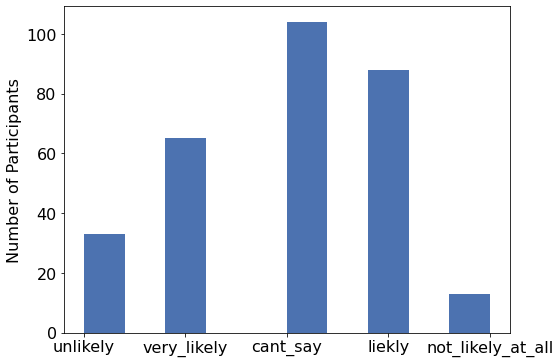

In [344]:
bins = 5

plt.subplots(figsize = (8,6)) 
plt.hist(df_fin['likert'])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number of Participants',fontsize = 16)
# plt.legend(['Complete', 'IPCR', 'SMDR', 'EIR'],loc='upper right')
plt.show()

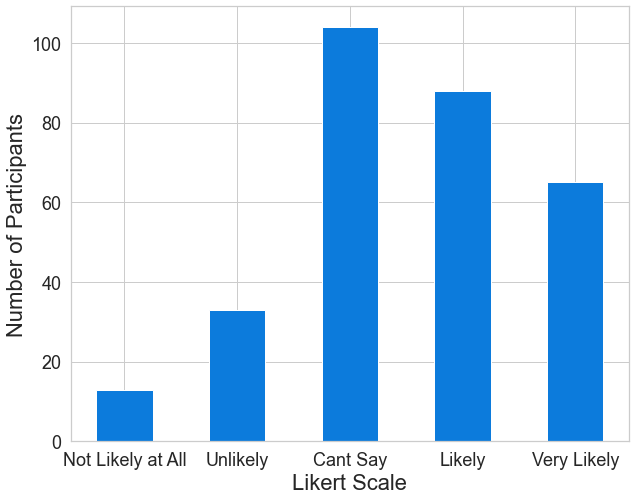

In [570]:
x = ['Not Likely at All', 'Unlikely', 'Cant Say', 'Likely', 'Very Likely']
y = [13, 33, 104, 88, 65]

# decay = mpatches.Patch(color='#FFC20A', label='Movement towards Prior')
# strength = mpatches.Patch(color='#0C7BDC', label='Movement towards Data')
# maintain = mpatches.Patch(color='#E66100', label='Belief Maintenance')
# na = mpatches.Patch(color='#5D3A9B', label='Incoherent')


plt.figure(figsize=(10,8))
plt.bar(x,y, color='#0C7BDC', width=0.5)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel("Likert Scale", fontsize = 22)
plt.ylabel('Number of Participants',fontsize = 22)

# plt.legend(handles=[decay, strength, maintain, na], fontsize = 12)
# plt.savefig("paper_qualitative_barplot")
plt.show()

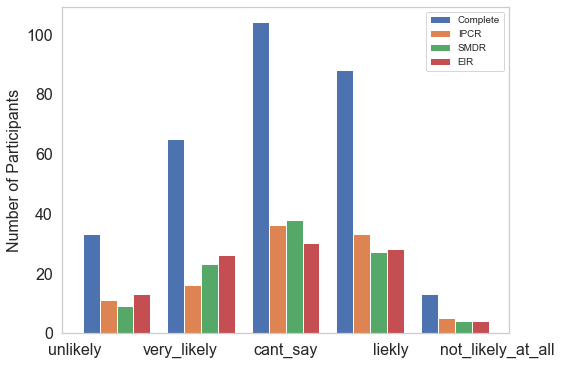

In [582]:
bins = 5

plt.subplots(figsize = (8,6)) 
plt.hist([df_fin['likert'], df_fin_IPCR['likert'], df_fin_SMDR['likert'], df_fin_EIR['likert']], bins, histtype='bar')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number of Participants',fontsize = 16)
plt.legend(['Complete', 'IPCR', 'SMDR', 'EIR'],loc='upper right')
plt.show()

In [583]:
df_all = pd.concat([df_IPCR_dense, df_SMDR_dense, df_EIR_dense], axis = 0)
df_all = df_all.reset_index(drop = True)
df_all

,ID,usertoken,prolificID,prior_belief,data_rho,post1_belief,post2_belief,likert,corr_diff_data_post1,corr_diff_data_post2,corr_diff_prior_post1,corr_diff_prior_post2,Winner1,Winner2,prior_uncertainty_weight,data_uncertainty_weight,post1_uncertainty_weight,post2_uncertainty_weight,Uncertainty-Movement
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,0.434880,-0.708554,-0.809420,-0.797963,unlikely,0.100866,0.089409,1.244300,1.232843,Strength,Decay,0.905627,0.296537,0.257026,0.380444,Decay-Unsure
1,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,-0.025050,0.865220,0.493294,0.617464,liekly,0.371926,0.247756,0.518344,0.642514,Strength,Strength,0.648439,0.132523,0.639007,0.788577,Decay-Unsure
2,62f68027fc70763173e81fe0,MAXHFRS7,629fbe8ae956f7cb13de5073,-0.104058,0.735274,0.462908,0.366334,liekly,0.272366,0.368940,0.566966,0.470392,Decay,Decay,0.613409,0.259317,0.912050,0.657793,Strength-Sure
3,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,0.226913,-0.755907,-0.433702,-0.394178,liekly,0.322205,0.361729,0.660615,0.621091,Decay,Decay,0.596061,0.249979,0.969543,0.789872,Strength-Sure
4,62f68266fc70763173e8200b,GL2yYGVe,6287a8c4a6303ff156cd0853,0.717338,-0.142250,-0.389034,-0.267300,cant_say,0.246785,0.125051,1.106373,0.984638,Strength,Decay,0.843383,0.547406,0.466914,0.802049,Decay-Unsure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,62faa37f930ab57fc9fe194e,hfXkNsfz,6107f8812249eaf730bf4688,1.000000,0.260660,1.000000,1.000000,cant_say,0.739340,0.739340,0.000000,0.000000,Tie,Tie,0.458292,0.555144,0.996864,0.468948,Strength-Sure
299,62faa683930ab57fc9fe197f,Zb0GxTDm,5f4d84f6835880a75c96c966,0.656447,-0.142279,0.734776,0.728553,cant_say,0.877055,0.870832,0.078329,0.072106,Strength,Decay,1.040037,0.568182,1.030119,1.209240,Decay-Unsure
300,62faa77d930ab57fc9fe198c,rJ0xFotM,5d51ffd641a6aa0019ca73df,1.000000,-0.007539,1.000000,1.000000,liekly,1.007539,1.007539,0.000000,0.000000,Tie,Tie,0.838612,0.487970,0.949255,0.880645,Strength-Sure
301,62faa8ab930ab57fc9fe19a0,iTVlm8Ep,5ae5374253072800018d5c69,0.115017,-0.733978,-0.659687,0.607344,unlikely,0.074291,1.341322,0.774704,0.492327,Decay,Decay,1.571865,0.242614,0.296493,0.785313,Decay-Unsure


In [584]:
df_all_prior_decay = df_all.loc[df_all['Winner2'] == 'Decay']
df_all_prior_strength = df_all.loc[df_all['Winner2'] == 'Strength']

df_all_prior_decay = df_all_prior_decay.reset_index(drop = True)
df_all_prior_strength = df_all_prior_strength.reset_index(drop = True)

In [585]:
#### Likert -- decay for all participants
all_decay_prior_temp = df_all_prior_decay["likert"].value_counts().to_dict()
all_decay_prior_dict = {'not_likely_at_all': 'Not Likely At All', 'unlikely': 'Unlikely', 'cant_say':'Cant Say', 'liekly':'Likely', 'very_likely':'Very Likely'}
all_decay_prior_dict = dict((all_decay_prior_dict[key], value) for (key, value) in all_decay_prior_temp.items())
all_decay_prior_dict

{'Cant Say': 55,
 'Likely': 51,
 'Very Likely': 33,
 'Unlikely': 15,
 'Not Likely At All': 2}

Text(0.5, 1.0, 'Belief Decay for All Variable Pairs (Posterior -> Data)')

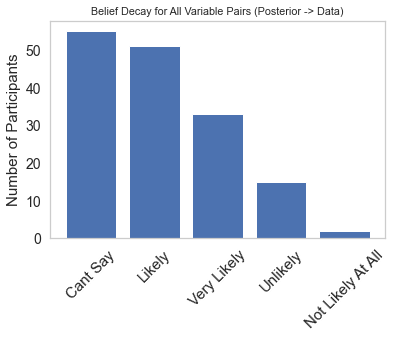

In [586]:
plt.bar(all_decay_prior_dict.keys(), all_decay_prior_dict.values(), label = 'Belief Decay for all variable Pairs Posterior -> Data')
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 15)
plt.title('Belief Decay for All Variable Pairs (Posterior -> Data)')


In [590]:
list = ['Not Likely At All', 'Unlikely', 'Cant Say', 'Likely', 'Very Likely']
all_decay_prior_dict, all_strength_prior_dict

({'Cant Say': 55,
  'Likely': 51,
  'Very Likely': 33,
  'Unlikely': 15,
  'Not Likely At All': 2},
 {'Cant Say': 46,
  'Likely': 33,
  'Very Likely': 27,
  'Unlikely': 17,
  'Not Likely At All': 9})

In [588]:
#### Likert -- decay for all participants
all_strength_prior_temp = df_all_prior_strength["likert"].value_counts().to_dict()
all_strength_prior_dict = {'not_likely_at_all': 'Not Likely At All', 'unlikely': 'Unlikely', 'cant_say':'Cant Say', 'liekly':'Likely', 'very_likely':'Very Likely'}
all_strength_prior_dict = dict((all_strength_prior_dict[key], value) for (key, value) in all_strength_prior_temp.items())
all_strength_prior_dict

{'Cant Say': 46,
 'Likely': 33,
 'Very Likely': 27,
 'Unlikely': 17,
 'Not Likely At All': 9}

Text(0.5, 1.0, 'Belief Strengthening for All Variable Pairs (Posterior -> Data)')

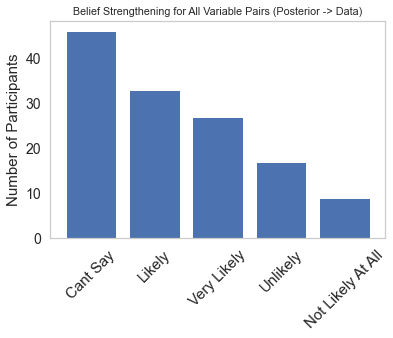

In [589]:
plt.bar(all_strength_prior_dict.keys(), all_strength_prior_dict.values())
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 15)
plt.title('Belief Strengthening for All Variable Pairs (Posterior -> Data)')

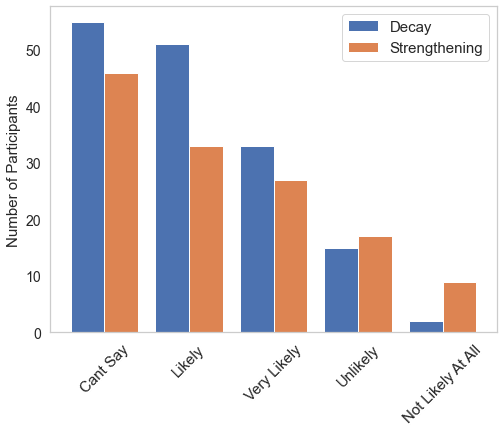

In [596]:
plt.subplots(figsize = (8,6)) 
X_axis = np.arange(len(all_decay_prior_dict.keys()))
plt.bar(X_axis- 0.2, all_decay_prior_dict.values(), 0.4, label = 'Decay')
plt.bar(X_axis+ 0.2, all_strength_prior_dict.values(), 0.4, label = 'Strengthening')

plt.xticks(X_axis, all_decay_prior_dict.keys(), rotation = 45, fontsize = 15)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 15)
# plt.title('Likert Score Frequency for Belief Trends (Posterior -> Prior)')
plt.legend(fontsize = 15)
plt.savefig('paper_likert')
plt.show()

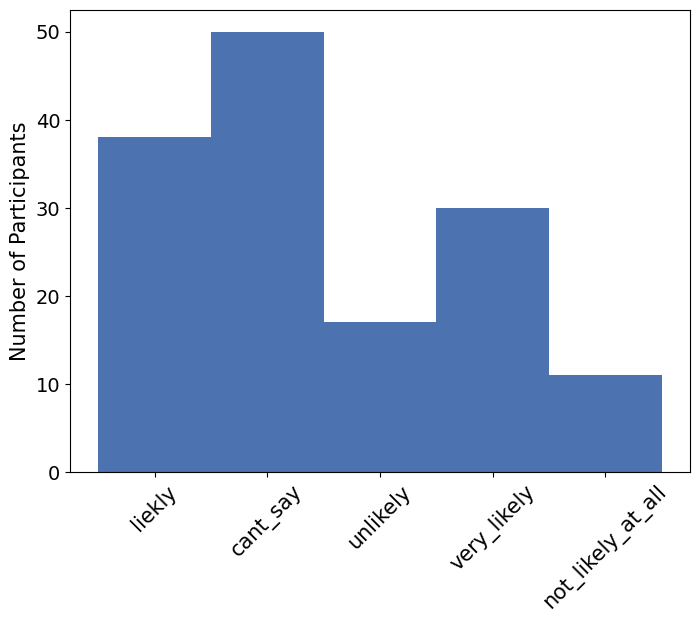

In [346]:
bins = 5

plt.subplots(figsize = (8,6))
plt.hist(df_all_prior_decay['likert'], bins=np.arange(6)-0.5, histtype='bar', label = 'Posterior -> Data')

plt.xticks(label = [1,2,3,4,5], rotation = 45, fontsize = 15)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 15)
# plt.legend(['Decay', 'Strength'], loc='upper right')
plt.show()
          
# df_all_prior_strength['likert']]

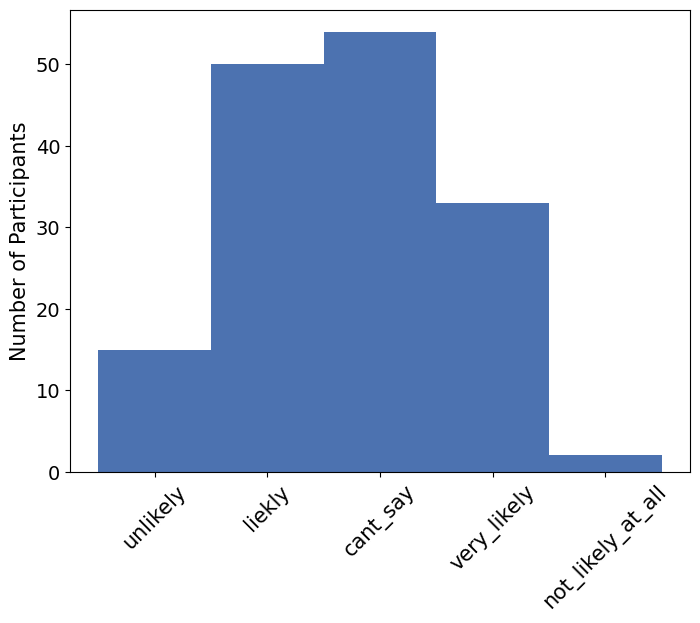

In [310]:
bins = 5

plt.subplots(figsize = (8,6))
plt.hist(df_all_prior_strength['likert'], bins=np.arange(6)-0.5, histtype='bar', label = 'Posterior -> Data')

plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 15)
# plt.legend(['Decay', 'Strength'], loc='upper right')
plt.show()
          
# df_all_prior_strength['likert']]

In [284]:
df_IPCR_W1_decay = df_IPCR_dense.loc[df_IPCR_dense['Winner1'] == 'Decay']
df_SMDR_W1_decay = df_SMDR_dense.loc[df_SMDR_dense['Winner1'] == 'Decay']
df_EIR_W1_decay = df_EIR_dense.loc[df_EIR_dense['Winner1'] == 'Decay']

df_IPCR_W2_decay = df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Decay']
df_SMDR_W2_decay = df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Decay']
df_EIR_W2_decay = df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Decay']

df_IPCR_W1_strength = df_IPCR_dense.loc[df_IPCR_dense['Winner1'] == 'Strength']
df_SMDR_W1_strength = df_SMDR_dense.loc[df_SMDR_dense['Winner1'] == 'Strength']
df_EIR_W1_strength = df_EIR_dense.loc[df_EIR_dense['Winner1'] == 'Strength']

df_IPCR_W2_strength = df_IPCR_dense.loc[df_IPCR_dense['Winner2'] == 'Strength']
df_SMDR_W2_strength = df_SMDR_dense.loc[df_SMDR_dense['Winner2'] == 'Strength']
df_EIR_W2_strength = df_EIR_dense.loc[df_EIR_dense['Winner2'] == 'Strength']

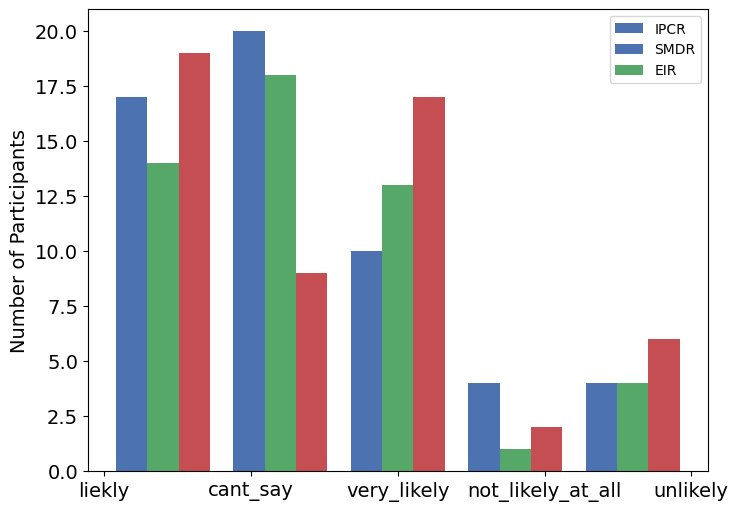

In [285]:
bins = 5

plt.subplots(figsize = (8,6))
plt.hist([df_IPCR_W1_decay['likert'], df_SMDR_W1_decay['likert'], df_EIR_W1_decay['likert']], bins, histtype='bar', label = 'Posterior -> Data')
# plt.hist([df_IPCR_W2_decay['likert'], df_SMDR_W2_decay['likert'], df_EIR_W2_decay['likert']], bins, histtype='bar', label = 'Posterior -> Prior', alpha = 0.5)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 14)
plt.legend(['IPCR', 'SMDR', 'EIR'],loc='upper right')
plt.show()

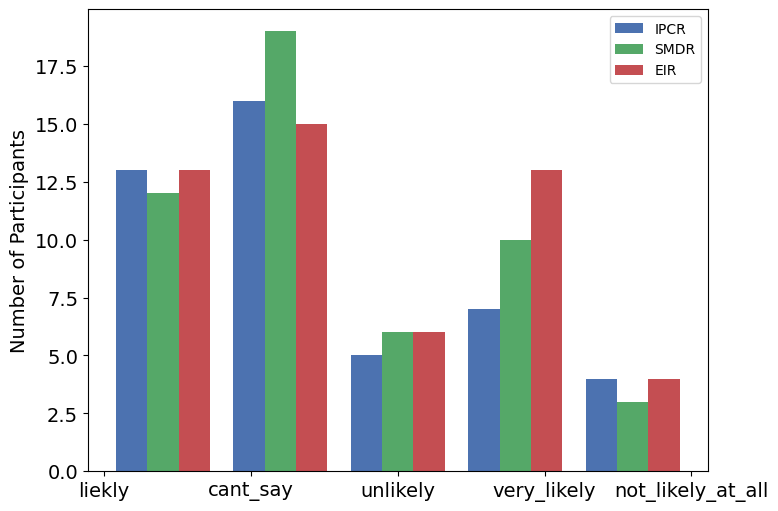

In [286]:
bins = 5

plt.subplots(figsize = (8,6))
# plt.hist([df_IPCR_W1_decay['likert'], df_SMDR_W1_decay['likert'], df_EIR_W1_decay['likert']], bins, histtype='bar')
plt.hist([df_IPCR_W2_decay['likert'], df_SMDR_W2_decay['likert'], df_EIR_W2_decay['likert']], bins, histtype='bar')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 14)
plt.legend(['IPCR', 'SMDR', 'EIR'],loc='upper right')
plt.show()

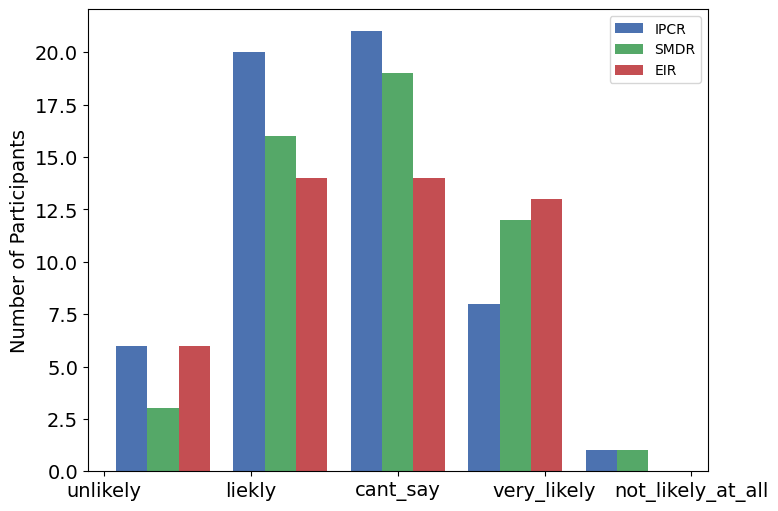

In [287]:
bins = 5

plt.subplots(figsize = (8,6))

plt.hist([df_IPCR_W2_strength['likert'], df_SMDR_W2_strength['likert'], df_EIR_W2_strength['likert']], bins, histtype='bar')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Participants',fontsize = 14)
plt.legend(['IPCR', 'SMDR', 'EIR'],loc='upper right')
plt.show()

AttributeError: 'Rectangle' object has no property 'bins'

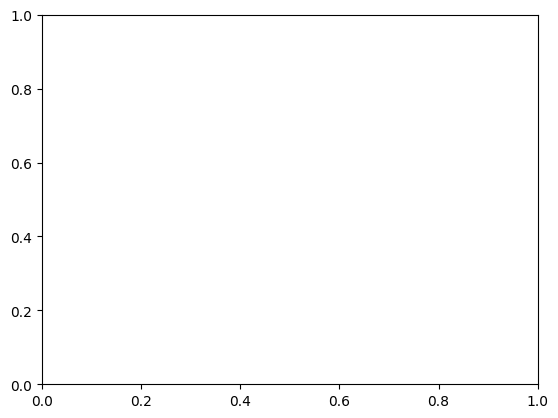

In [275]:
df_SMDR_W1_decay['likert'].value_counts()[['not_likely_at_all', 'unlikely', 'cant_say', 'liekly', 'very_likely']].plot(kind='bar')
df_SMDR_W2_decay['likert'].value_counts()[['not_likely_at_all', 'unlikely', 'cant_say', 'liekly', 'very_likely']].plot(kind='bar', color="maroon")

plt.show()

TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

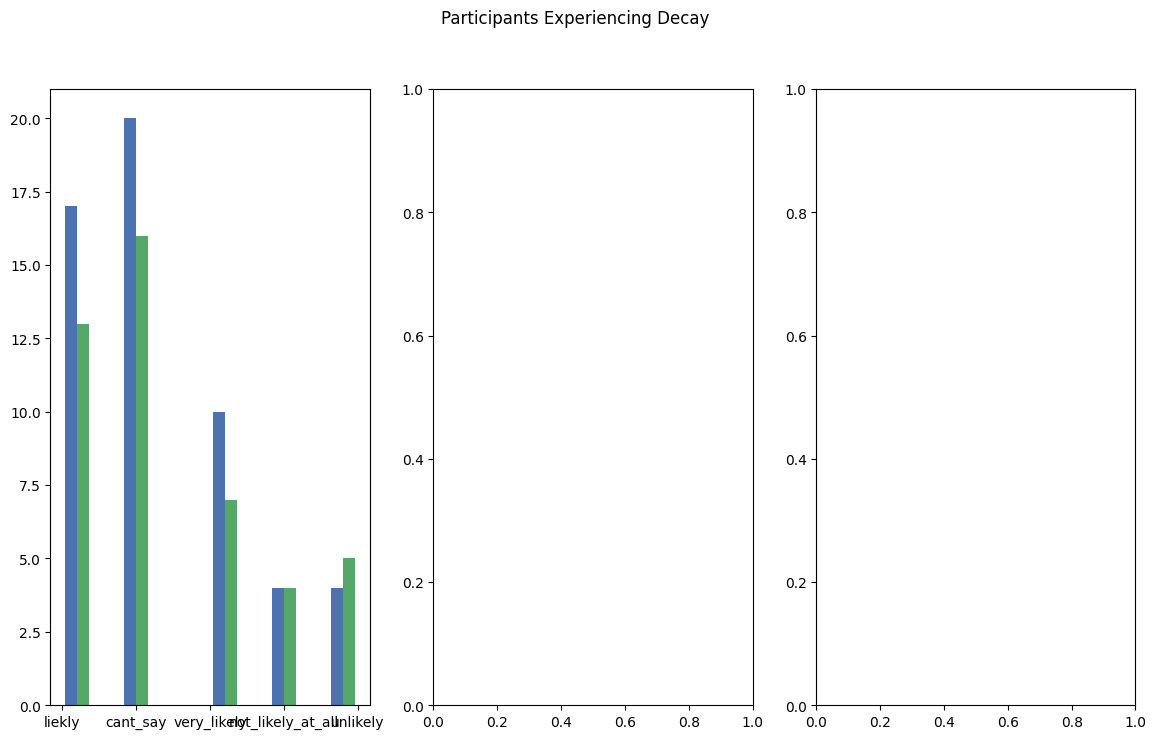

In [267]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,8))


fig.suptitle('Participants Experiencing Decay')
# ax1.hist([df_IPCR_W1_decay['likert'], df_IPCR_W2_decay['likert']])
# ax1.set_xticklabels(,rotation = 45)

ax2.hist([df_SMDR_W1_decay['likert'], df_SMDR_W2_decay['likert']])
plt.xticks(rotation = 45)
ax3.hist([df_EIR_W1_decay['likert'], df_SMDR_W2_decay['likert']])
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 1.0, 'All Variable Pairs')

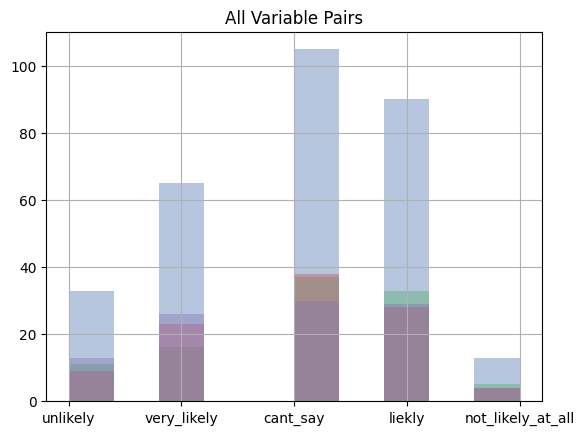

In [123]:
# fig, ax = plt.subplots(figsize = (6,4))

df_fin['likert'].hist(alpha = 0.4, histtype='bar')
df_fin_IPCR['likert'].hist(alpha = 0.4, histtype='bar')
df_fin_SMDR['likert'].hist(alpha = 0.4, histtype='bar')
df_fin_EIR['likert'].hist(alpha = 0.4, histtype='bar')
plt.title('All Variable Pairs')

In [ ]:
########################################## Finding groups with winners ############################

In [57]:
df_EIR_qual = df_fin_EIR.copy()

df_EIR_qual['corr_diff_data_post1'] = abs(df_fin_EIR['post1_belief'] - df_fin_EIR['data_rho'])
df_EIR_qual['corr_diff_data_post2'] = abs(df_fin_EIR['post2_belief'] - df_fin_EIR['data_rho'])

df_EIR_qual['corr_diff_prior_post1'] = abs(df_fin_EIR['post1_belief'] - df_fin_EIR['prior_belief'])
df_EIR_qual['corr_diff_prior_post2'] = abs(df_fin_EIR['post2_belief'] - df_fin_EIR['prior_belief'])

conditions = [df_EIR_dense['corr_diff_data_post1'] > df_EIR_dense['corr_diff_data_post2'], 
              df_EIR_dense['corr_diff_data_post1'] < df_EIR_dense['corr_diff_data_post2']]

choices = ['Strength', 'Decay']

#create new column in DataFrame that displays results of comparisons
df_EIR_qual['Winner1'] = np.select(conditions, choices, default = 'Tie')

df_EIR_qual_win = df_EIR_qual.loc[df_EIR_dense['Winner1'] == 'Possible Decay']

NameError: name 'df_EIR_dense' is not defined

In [556]:
df_EIR_qual_win.shape

(47, 31)

Text(0.5, 1.0, 'Years of Education x Income')

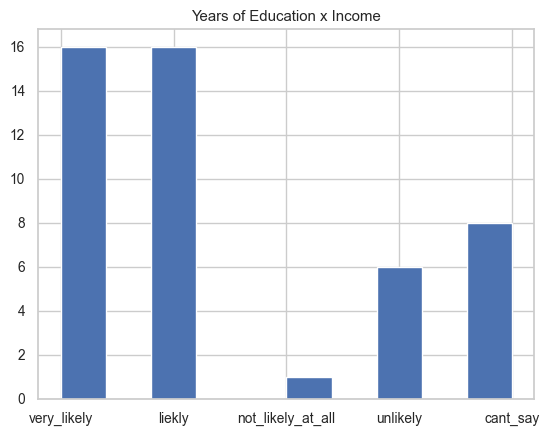

In [563]:
df_EIR_qual_win['likert'].hist()
plt.title('Years of Education x Income')

In [553]:
df_EIR_qual_win.to_csv('EIR_decay_data.csv', index = True)

In [554]:
df_SMDR_qual = df_fin_SMDR.copy()

df_SMDR_qual['corr_diff_data_post1'] = abs(df_fin_SMDR['post1_belief'] - df_fin_SMDR['data_rho'])
df_SMDR_qual['corr_diff_data_post2'] = abs(df_fin_SMDR['post2_belief'] - df_fin_SMDR['data_rho'])

df_SMDR_qual['corr_diff_prior_post1'] = abs(df_fin_SMDR['post1_belief'] - df_fin_SMDR['prior_belief'])
df_SMDR_qual['corr_diff_prior_post2'] = abs(df_fin_SMDR['post2_belief'] - df_fin_SMDR['prior_belief'])

conditions = [df_SMDR_dense['corr_diff_data_post1'] > df_SMDR_dense['corr_diff_data_post2'], 
              df_SMDR_dense['corr_diff_data_post1'] < df_SMDR_dense['corr_diff_data_post2']]

choices = ['Beliefs Closer to Supporting Data', 'Possible Decay']

#create new column in DataFrame that displays results of comparisons
df_SMDR_qual['Winner1'] = np.select(conditions, choices, default = 'Tie')

df_SMDR_qual_win = df_SMDR_qual.loc[df_SMDR_dense['Winner1'] == 'Possible Decay']

In [557]:
df_SMDR_qual_win.shape

(46, 31)

Text(0.5, 1.0, 'Social Media Hours x Depression')

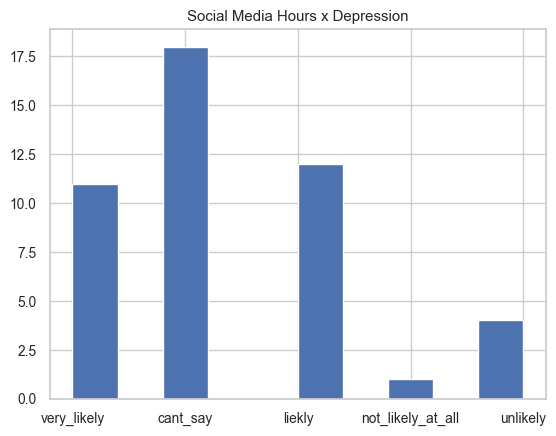

In [567]:
df_SMDR_qual_win['likert'].hist()
plt.title('Social Media Hours x Depression')

In [558]:
df_SMDR_qual_win.to_csv('SMDR_decay_data.csv', index = True)

In [559]:
df_IPCR_qual = df_fin_IPCR.copy()

df_IPCR_qual['corr_diff_data_post1'] = abs(df_fin_IPCR['post1_belief'] - df_fin_IPCR['data_rho'])
df_IPCR_qual['corr_diff_data_post2'] = abs(df_fin_IPCR['post2_belief'] - df_fin_IPCR['data_rho'])

df_IPCR_qual['corr_diff_prior_post1'] = abs(df_fin_IPCR['post1_belief'] - df_fin_IPCR['prior_belief'])
df_IPCR_qual['corr_diff_prior_post2'] = abs(df_fin_IPCR['post2_belief'] - df_fin_IPCR['prior_belief'])

conditions = [df_IPCR_dense['corr_diff_data_post1'] > df_IPCR_dense['corr_diff_data_post2'], 
              df_IPCR_dense['corr_diff_data_post1'] < df_IPCR_dense['corr_diff_data_post2']]

choices = ['Beliefs Closer to Supporting Data', 'Possible Decay']

#create new column in DataFrame that displays results of comparisons
df_IPCR_qual['Winner1'] = np.select(conditions, choices, default = 'Tie')

df_IPCR_qual_win = df_IPCR_qual.loc[df_IPCR_dense['Winner1'] == 'Possible Decay']

In [560]:
df_IPCR_qual_win.shape

(52, 31)

Text(0.5, 1.0, 'Immigrant Population x Crime Rate')

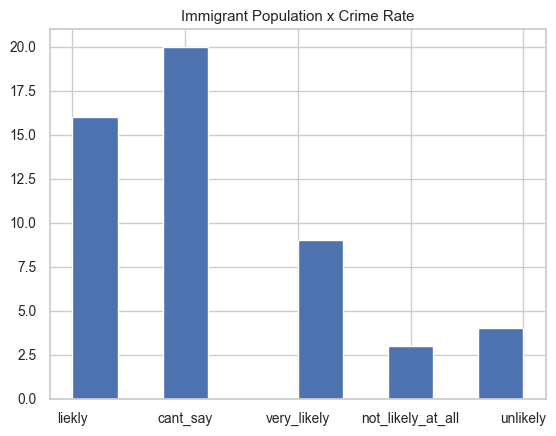

In [566]:
df_IPCR_qual_win['likert'].hist()
plt.title('Immigrant Population x Crime Rate')

In [561]:
df_IPCR_qual_win.to_csv('IPCR_decay_data.csv', index = True)

In [570]:
all_common = list(set(df_IPCR_qual_win.prolificID) & set(df_SMDR_qual_win.prolificID) & set(df_EIR_qual_win.prolificID))

In [571]:
all_common

['5e0ff44218e8696f9f198d4a',
 '5c6fb7c3c114eb00018b3154',
 '5825335ac297cc0001df28b2',
 '5f38e87099a44d40b79e5009',
 '627e6d46440b9a1d01fb1d32',
 '629fbe8ae956f7cb13de5073',
 '60c50f3ccf2eebcf270b9488',
 '5f9482d87d1b022be13b2c69',
 '5a7f44ec8fe2dc000105c9b0',
 '61047c3dca663c4fc6d590e1',
 '5f93274d33ea7a0d0bee3fd4',
 '5e24fbd4e1f467771c234e5f',
 '5ededc7ab3595e17ef9533df',
 '5ae5374253072800018d5c69',
 '62c387e4c664472da3ad4569',
 '60baaa995c09d3162511871d']

In [572]:
len(all_common)

16

In [573]:
df_all_common = df_fin[df_fin['prolificID'].isin(all_common)]

In [575]:
df_all_common.shape

(48, 26)

In [577]:
df_all_common.to_csv('decay_all_variables.csv', index = True)

Text(0.5, 1.0, 'Likert Histogram [All Dataframes]')

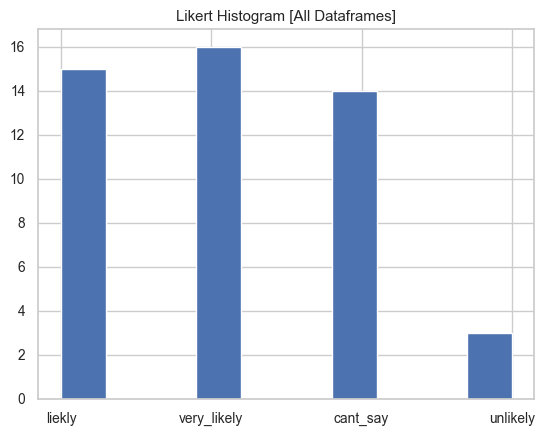

In [578]:
df_all_common['likert'].hist()
plt.title('Likert Histogram [All Dataframes]')

In [ ]:
################################################ Complete Density Barplot ############################################################

In [20]:
df_fin_plot = df_fin.copy()

In [21]:
df_fin_plot.shape

(303, 26)

In [22]:
df_fin_plot['prior_uncertainty_diff'] = abs(df_fin_plot['prior_uncertainty_R'] - df_fin_plot['prior_uncertainty_L'])
df_fin_plot['post1_uncertainty_diff'] = abs(df_fin_plot['post1_uncertainty_R'] - df_fin_plot['post1_uncertainty_L'])
df_fin_plot['post2_uncertainty_diff'] = abs(df_fin_plot['post2_uncertainty_R'] - df_fin_plot['post2_uncertainty_L'])

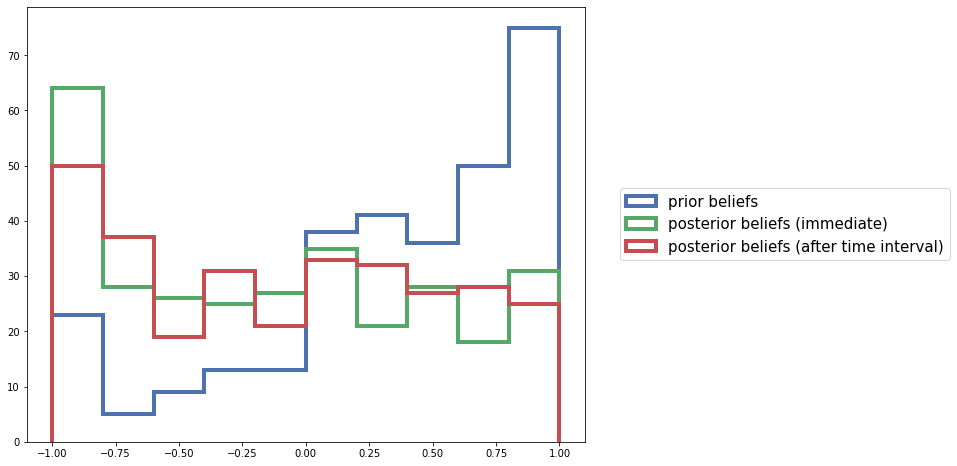

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.hist(df_fin_plot['prior_belief'], bins=10, label="prior beliefs", histtype = 'step', linewidth = 4)
plt.hist(df_fin_plot['post1_belief'], bins=10, label="posterior beliefs (immediate)", histtype = 'step', linewidth = 4)
plt.hist(df_fin_plot['post2_belief'], bins=10, label="posterior beliefs (after time interval)", histtype = 'step', linewidth = 4)
plt.legend(bbox_to_anchor = (1.05, 0.6), prop={'size': 15}) ##loc='upper right'

In [24]:
df_fin_plot.columns

Index(['ID', 'usertoken', 'prolificID', 'gender', 'age', 'race', 'education',
       'variables', 'timerVal', 'prior_belief', 'prior_uncertainty_L',
       'prior_uncertainty_R', 'data_rho', 'data_CI_L', 'data_CI_R',
       'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R',
       'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R',
       'retro_prior', 'retro_post1', 'retro_post2', 'likert', 'survey',
       'prior_uncertainty_diff', 'post1_uncertainty_diff',
       'post2_uncertainty_diff'],
      dtype='object')

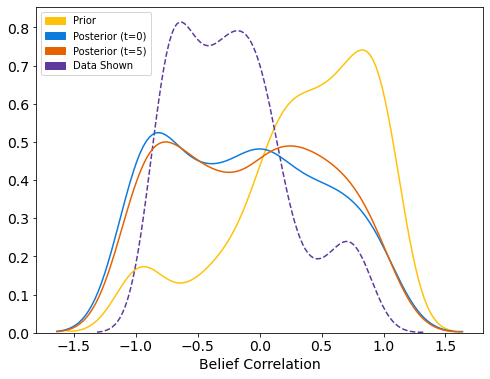

In [25]:
import seaborn as sns

prior_patch = mpatches.Patch(color='#FFC20A', label='Prior')
post1_patch = mpatches.Patch(color='#0C7BDC', label='Posterior (t=0)')
post2_patch = mpatches.Patch(color='#E66100', label='Posterior (t=5)')
data_patch = mpatches.Patch(color='#5D3A9B', label='Data Shown')


fig = plt.figure(figsize=(8,6))
sns.distplot(df_fin_plot.prior_belief, color = '#FFC20A', hist=False)
sns.distplot(df_fin_plot.data_rho, color = '#5D3A9B', hist=False, kde_kws={'linestyle':'--'})
sns.distplot(df_fin_plot.post1_belief, color = '#0C7BDC', hist=False)
sns.distplot(df_fin_plot.post2_belief, color = '#E66100', hist=False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Belief Correlation", fontsize = 14)
# plt.title("Density Plot for Elicited Belief Correlation")

plt.legend(handles=[prior_patch, post1_patch, post2_patch, data_patch])
plt.savefig("density_plot_all.png")
plt.show()

In [26]:
df_fin_plot['prior_uncertainty_weight'] = abs(df_fin_plot['prior_uncertainty_L'] - df_fin_plot['prior_uncertainty_R'])
df_fin_plot['data_uncertainty_weight'] = abs(df_fin_plot['data_CI_L'] - df_fin_plot['data_CI_R'])
df_fin_plot['post1_uncertainty_weight'] = abs(df_fin_plot['post1_uncertainty_L'] - df_fin_plot['post1_uncertainty_R'])
df_fin_plot['post2_uncertainty_weight'] = abs(df_fin_plot['post2_uncertainty_L'] - df_fin_plot['post2_uncertainty_R'])

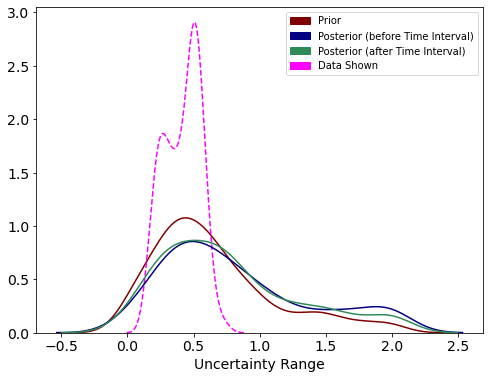

In [27]:
import seaborn as sns

prior_patch = mpatches.Patch(color='maroon', label='Prior')
post1_patch = mpatches.Patch(color='navy', label='Posterior (before Time Interval)')
post2_patch = mpatches.Patch(color='seagreen', label='Posterior (after Time Interval)')
data_patch = mpatches.Patch(color='magenta', label='Data Shown')

fig = plt.figure(figsize=(8,6))
sns.distplot(df_fin_plot.prior_uncertainty_weight, color = 'maroon', hist=False)
sns.distplot(df_fin_plot.data_uncertainty_weight, color = 'magenta', hist=False, kde_kws={'linestyle':'--'})
sns.distplot(df_fin_plot.post1_uncertainty_weight, color = 'navy', hist=False)
sns.distplot(df_fin_plot.post2_uncertainty_weight, color = 'seagreen', hist=False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Uncertainty Range", fontsize = 14)

plt.legend(handles=[prior_patch, post1_patch, post2_patch, data_patch])
plt.show()

In [28]:
### Splitting into 3 variable sets
df_fin_plot_IPCR = df_fin_plot[df_fin_plot['variables'].str.contains('Immigrant population')]
df_fin_plot_SMDR = df_fin[df_fin_plot['variables'].str.contains('Avg. hours on social media')]
df_fin_plot_EIR = df_fin[df_fin_plot['variables'].str.contains('Years of education')]

In [29]:
df_fin_plot_IPCR = df_fin_plot_IPCR.reset_index(drop = True)
df_fin_plot_SMDR = df_fin_plot_SMDR.reset_index(drop = True)
df_fin_plot_EIR = df_fin_plot_EIR.reset_index(drop = True)

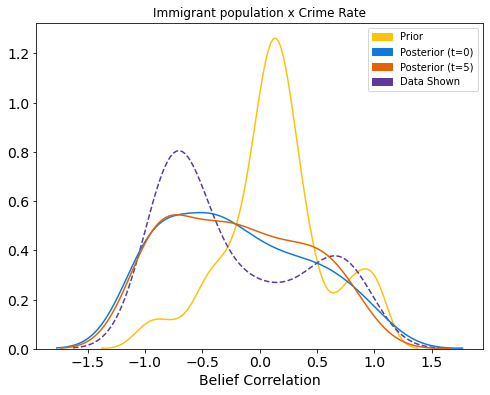

In [30]:
#### IPCR
import seaborn as sns

prior_patch = mpatches.Patch(color='#FFC20A', label='Prior')
post1_patch = mpatches.Patch(color='#0C7BDC', label='Posterior (t=0)')
post2_patch = mpatches.Patch(color='#E66100', label='Posterior (t=5)')
data_patch = mpatches.Patch(color='#5D3A9B', label='Data Shown')


fig = plt.figure(figsize=(8,6))
sns.distplot(df_fin_plot_IPCR.prior_belief, color = '#FFC20A', hist=False)
sns.distplot(df_fin_plot_IPCR.data_rho, color = '#5D3A9B', hist=False, kde_kws={'linestyle':'--'})
sns.distplot(df_fin_plot_IPCR.post1_belief, color = '#0C7BDC', hist=False)
sns.distplot(df_fin_plot_IPCR.post2_belief, color = '#E66100', hist=False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Belief Correlation", fontsize = 14)
plt.title("Immigrant population x Crime Rate")

plt.legend(handles=[prior_patch, post1_patch, post2_patch, data_patch])
plt.show()

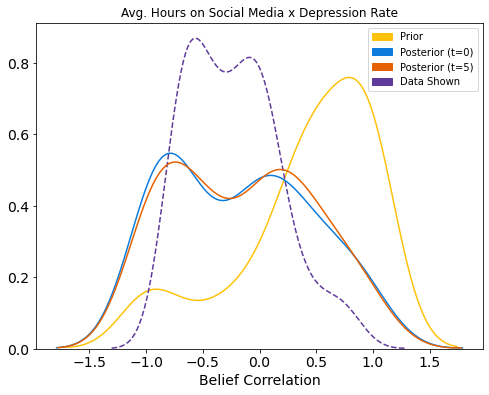

In [31]:
#### SMDR
import seaborn as sns

prior_patch = mpatches.Patch(color='#FFC20A', label='Prior')
post1_patch = mpatches.Patch(color='#0C7BDC', label='Posterior (t=0)')
post2_patch = mpatches.Patch(color='#E66100', label='Posterior (t=5)')
data_patch = mpatches.Patch(color='#5D3A9B', label='Data Shown')


fig = plt.figure(figsize=(8,6))
sns.distplot(df_fin_plot_SMDR.prior_belief, color = '#FFC20A', hist=False)
sns.distplot(df_fin_plot_SMDR.data_rho, color = '#5D3A9B', hist=False, kde_kws={'linestyle':'--'})
sns.distplot(df_fin_plot_SMDR.post1_belief, color = '#0C7BDC', hist=False)
sns.distplot(df_fin_plot_SMDR.post2_belief, color = '#E66100', hist=False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Belief Correlation", fontsize = 14)
plt.title("Avg. Hours on Social Media x Depression Rate")

plt.legend(handles=[prior_patch, post1_patch, post2_patch, data_patch])
plt.show()

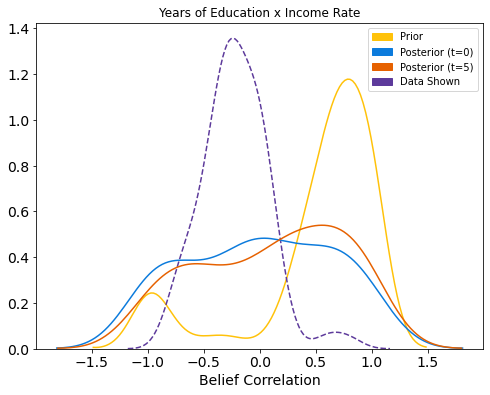

In [32]:
#### SMDR
import seaborn as sns

prior_patch = mpatches.Patch(color='#FFC20A', label='Prior')
post1_patch = mpatches.Patch(color='#0C7BDC', label='Posterior (t=0)')
post2_patch = mpatches.Patch(color='#E66100', label='Posterior (t=5)')
data_patch = mpatches.Patch(color='#5D3A9B', label='Data Shown')


fig = plt.figure(figsize=(8,6))
sns.distplot(df_fin_plot_EIR.prior_belief, color = '#FFC20A', hist=False)
sns.distplot(df_fin_plot_EIR.data_rho, color = '#5D3A9B', hist=False, kde_kws={'linestyle':'--'})
sns.distplot(df_fin_plot_EIR.post1_belief, color = '#0C7BDC', hist=False)
sns.distplot(df_fin_plot_EIR.post2_belief, color = '#E66100', hist=False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Belief Correlation", fontsize = 14)
plt.title("Years of Education x Income Rate")

plt.legend(handles=[prior_patch, post1_patch, post2_patch, data_patch])
plt.show()

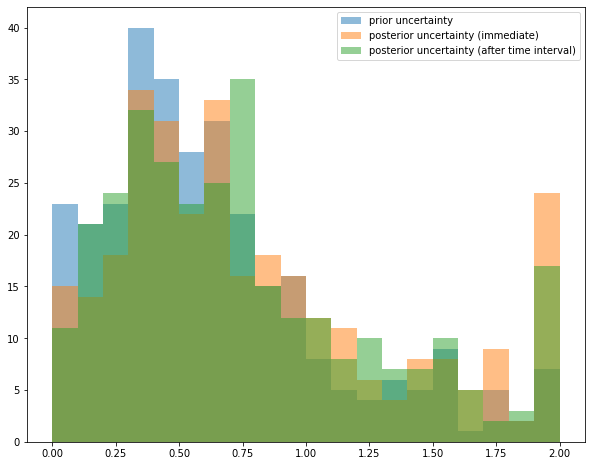

In [50]:
plt.figure(figsize=(10,8))
plt.hist(df_fin_plot['prior_uncertainty_diff'], bins=20, alpha=0.5, label="prior uncertainty")
plt.hist(df_fin_plot['post1_uncertainty_diff'], bins=20, alpha=0.5, label="posterior uncertainty (immediate)")
plt.hist(df_fin_plot['post2_uncertainty_diff'], bins=20, alpha=0.5, label="posterior uncertainty (after time interval)")
plt.legend(loc='upper right')

In [32]:
df_fin_EIR.columns

Index(['ID', 'usertoken', 'prolificID', 'gender', 'age', 'race', 'education',
       'variables', 'timerVal', 'prior_belief', 'prior_uncertainty_L',
       'prior_uncertainty_R', 'data_rho', 'data_CI_L', 'data_CI_R',
       'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R',
       'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R',
       'retro_prior', 'retro_post1', 'retro_post2', 'likert', 'survey',
       'prior_uncertainty_diff', 'post1_uncertainty_diff',
       'post2_uncertainty_diff'],
      dtype='object')

In [33]:
df_fin_EIR['prior_uncertainty_diff'] = abs(df_fin_EIR['prior_uncertainty_R'] - df_fin_EIR['prior_uncertainty_L'])
df_fin_EIR['post1_uncertainty_diff'] = abs(df_fin_EIR['post1_uncertainty_R'] - df_fin_EIR['post1_uncertainty_L'])
df_fin_EIR['post2_uncertainty_diff'] = abs(df_fin_EIR['post2_uncertainty_R'] - df_fin_EIR['post2_uncertainty_L'])

In [34]:
df_fin_EIR.columns

Index(['ID', 'usertoken', 'prolificID', 'gender', 'age', 'race', 'education',
       'variables', 'timerVal', 'prior_belief', 'prior_uncertainty_L',
       'prior_uncertainty_R', 'data_rho', 'data_CI_L', 'data_CI_R',
       'post1_belief', 'post1_uncertainty_L', 'post1_uncertainty_R',
       'post2_belief', 'post2_uncertainty_L', 'post2_uncertainty_R',
       'retro_prior', 'retro_post1', 'retro_post2', 'likert', 'survey',
       'prior_uncertainty_diff', 'post1_uncertainty_diff',
       'post2_uncertainty_diff'],
      dtype='object')

<AxesSubplot:>

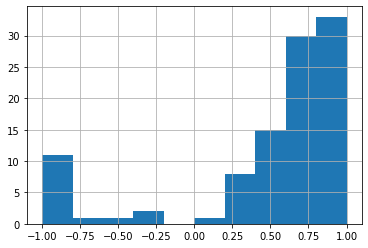

In [23]:
df_fin_EIR['prior_belief'].hist()

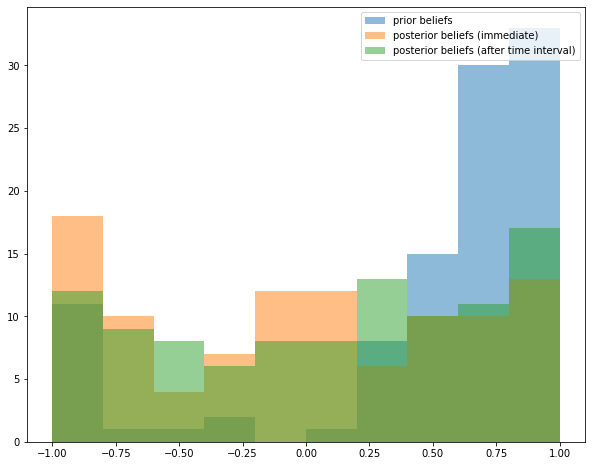

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.hist(df_fin_EIR['prior_belief'], bins=10, alpha=0.5, label="prior beliefs")
plt.hist(df_fin_EIR['post1_belief'], bins=10, alpha=0.5, label="posterior beliefs (immediate)")
plt.hist(df_fin_EIR['post2_belief'], bins=10, alpha=0.5, label="posterior beliefs (after time interval)")
plt.legend(loc='upper right')

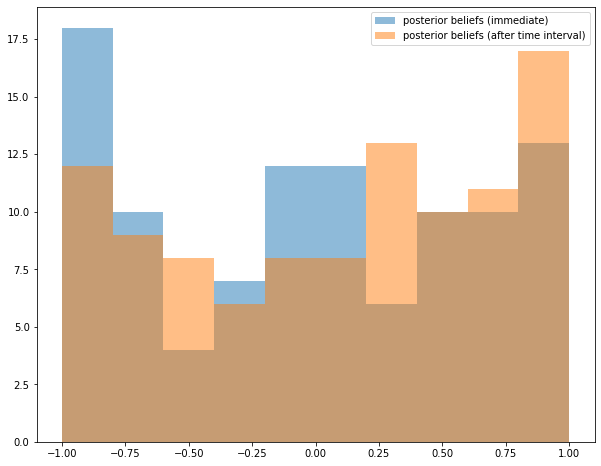

In [25]:
plt.figure(figsize=(10,8))
plt.hist(df_fin_EIR['post1_belief'], bins=10, alpha=0.5, label="posterior beliefs (immediate)")
plt.hist(df_fin_EIR['post2_belief'], bins=10, alpha=0.5, label="posterior beliefs (after time interval)")
plt.legend(loc='upper right')

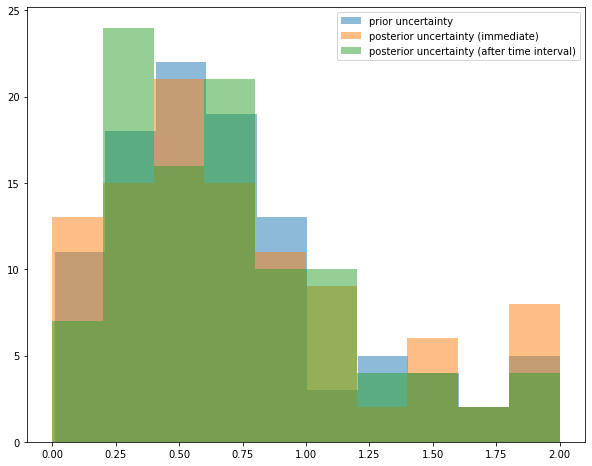

In [28]:
plt.figure(figsize=(10,8))
plt.hist(df_fin_EIR['prior_uncertainty_diff'], bins=10, alpha=0.5, label="prior uncertainty")
plt.hist(df_fin_EIR['post1_uncertainty_diff'], bins=10, alpha=0.5, label="posterior uncertainty (immediate)")
plt.hist(df_fin_EIR['post2_uncertainty_diff'], bins=10, alpha=0.5, label="posterior uncertainty (after time interval)")
plt.legend(loc='upper right')

In [41]:
df_decay = pd.read_csv("decay_all_variables.csv")
df_decay = df_decay.drop(['Unnamed: 0'], axis = 1)

In [47]:
df_decay.shape

(48, 26)

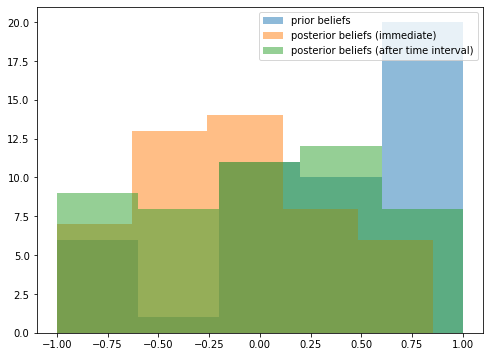

In [45]:
plt.figure(figsize=(8,6))
plt.hist(df_decay['prior_belief'], bins=5, alpha=0.5, label="prior beliefs")
plt.hist(df_decay['post1_belief'], bins=5, alpha=0.5, label="posterior beliefs (immediate)")
plt.hist(df_decay['post2_belief'], bins=5, alpha=0.5, label="posterior beliefs (after time interval)")
plt.legend(loc='upper right')

(array([15.,  0.,  0., 16.,  0.,  0., 14.,  0.,  0.,  3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

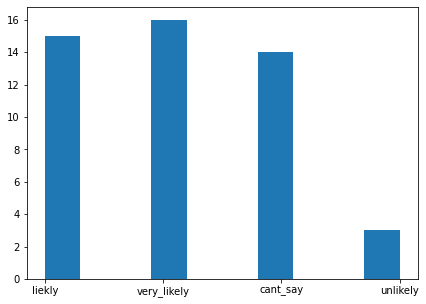

In [49]:
plt.figure(figsize=(7,5))
plt.hist(df_decay['likert'])

In [ ]:
################################################################ qualitative coding ################################################################

In [351]:
df_qcode = pd.read_csv("pilot_belief_qualcode.csv")
df_qcode = df_qcode.drop(['Unnamed: 0'], axis = 1)
df_qcode

,ID,usertoken,prolificID,gender,age,race,education,Cases,variables,timerVal,...,Post2 - Time Interval - Description,Post2 - Manipulation,Post2 - Rationalize,Post2 - Noise,Post2 - Interface Difficulty,Post2 - Interface Difficulty - Description,likert,Likert - Notes,survey,Survey - Description
0,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23.0,white,undergrad,Main-D,"['Immigrant population', 'Crime rate']",5.0,...,No effect of time interval,False,False,False,False,NaN,unlikely,NaN,Tetris was a long time. I think 2 minutes woul...,NaN
1,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23.0,white,undergrad,Strength-U,"['Years of education', 'Income']",5.0,...,Strengthening but increased uncertainty,False,False,False,False,NaN,very_likely,NaN,Tetris was a long time. I think 2 minutes woul...,NaN
2,62f67ae0fc70763173e81fc2,Swh7B1VF,60ca3935fb64d56e11014643,female,23.0,white,undergrad,Main-D,"['Avg. hours on social media', 'Depression sev...",5.0,...,No effect of time interval,False,False,False,False,NaN,cant_say,NaN,Tetris was a long time. I think 2 minutes woul...,NaN
3,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29.0,eastasian,undergrad,Main-D,"['Immigrant population', 'Crime rate']",5.0,...,No effect of time interval,False,False,False,False,NaN,liekly,NaN,no,NaN
4,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29.0,eastasian,undergrad,Main-U,"['Years of education', 'Income']",5.0,...,No effect of time interval,False,False,False,False,NaN,liekly,NaN,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN
904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN
905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN
906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN


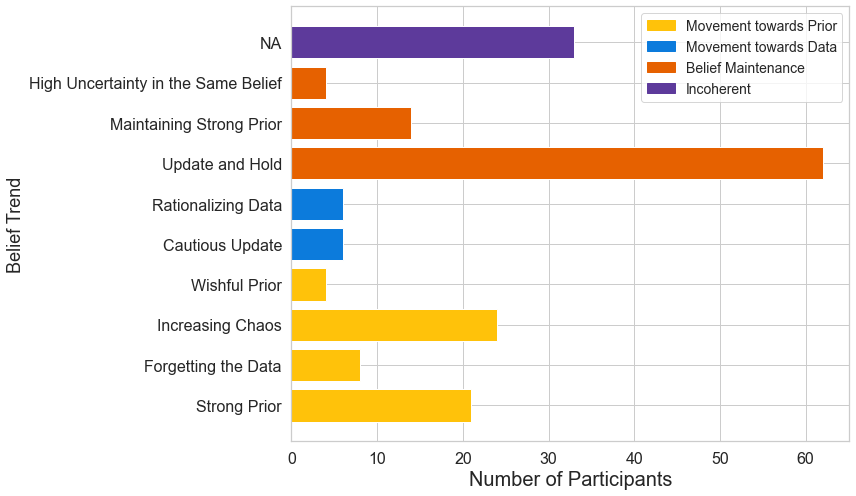

In [572]:
# x = ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7', 'Case 8', 'Case 9', 'NA']
x = ['Strong Prior', 'Forgetting the Data', 'Increasing Chaos', 'Wishful Prior', 'Cautious Update', 
     'Rationalizing Data', 'Update and Hold', 'Maintaining Strong Prior', 'High Uncertainty in the Same Belief', 'NA']
y = [21, 8, 24, 4, 6, 6, 62, 14, 4, 33]

decay = mpatches.Patch(color='#FFC20A', label='Movement towards Prior')
strength = mpatches.Patch(color='#0C7BDC', label='Movement towards Data')
maintain = mpatches.Patch(color='#E66100', label='Belief Maintenance')
na = mpatches.Patch(color='#5D3A9B', label='Incoherent')


plt.figure(figsize=(10,8))
plt.barh(x,y, color=['#FFC20A', '#FFC20A', '#FFC20A', '#FFC20A', '#0C7BDC',
                    '#0C7BDC', '#E66100', '#E66100', '#E66100', '#5D3A9B'])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Number of Participants", fontsize = 20)
plt.ylabel('Belief Trend', fontsize = 18)
# plt.title('Qualitative Analysis')
plt.legend(handles=[decay, strength, maintain, na], fontsize = 14)
plt.savefig("paper_qualitative_barplot")
plt.show()

In [ ]:
######################## Internal consistency analysis ########################

In [ ]:
#### OEYCxxRj -- Based on my previous experience (posterior 2)
#### p06kRv8P -- I remembered what i did before so I did that again (posterior 2)

In [23]:
internal_consistency_three = ['OwNbjsPH', 'RWrfFb2U', 'k377qJbk', 'TDgzJbOD', 'ctX4on3L', '1AwuoTwu', 'lkriTtxq', '4hpzNxQm', 'p06kRv8P', 'aXArSPHi', 'BBP73db6', 'RxIlUFQ1',
        'v4HHkZlG', 'T8oN7ZK5', 'P1YawhF7', 'TkNsPpge', 'zvWEzARG', 'uV3Xp60n', 'GkRCuB45', 'v2TrScDD', 'AliGfrkM', 'H5NbITHi', 'vx2CYiXG', 'QFRTD80J',
        'OEYCxxRj', 'NBA8hkYq', 'oA4yjpRL', 'JY2591IM']

In [181]:
df_fin_ic_three = df_fin_plot[df_fin_plot['usertoken'].isin(internal_consistency_three)]
df_fin_ic_three

,ID,usertoken,prolificID,gender,age,race,education,variables,timerVal,prior_belief,...,post2_uncertainty_L,post2_uncertainty_R,retro_prior,retro_post1,retro_post2,likert,survey,prior_uncertainty_diff,post1_uncertainty_diff,post2_uncertainty_diff
3,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Immigrant population', 'Crime rate']",5,-0.025050,...,0.211423,1.000000,I don't believe that there is any correlation ...,It made me think that it might be possible tha...,Similar thinking to before the game.,liekly,no,0.648439,0.639007,0.788577
4,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Years of education', 'Income']",5,0.289062,...,0.002863,0.705464,I've heard many studies saying that getting hi...,It might still be true that higher income can ...,There is still a positive relationship between...,liekly,no,1.405343,1.545738,0.702602
5,62f67f44fc70763173e81fdc,OwNbjsPH,5af9fab60a7ecb00011820b8,female,29,eastasian,undergrad,"['Avg. hours on social media', 'Depression sev...",5,1.000000,...,0.062769,0.981022,Perhaps it's from a more anecdotal perspective...,"I still think there's a positive relationship,...",I kept it unchanged because I think there is a...,liekly,no,0.310146,1.313929,0.918253
9,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,male,36,black,undergrad,"['Years of education', 'Income']",5,1.000000,...,-1.000000,-0.212309,"I believe it helps, but they're are more varia...",I thought the same.,Changed when presented more evidence.,very_likely,No.,0.703993,0.749032,0.787691
10,62f6808bfc70763173e81fe9,RWrfFb2U,60baaa995c09d3162511871d,male,36,black,undergrad,"['Avg. hours on social media', 'Depression sev...",5,0.323255,...,-0.586737,-0.154153,I dont see much of a connection.,I feel positive about my stance.,I felt about the same.,cant_say,No.,0.930774,0.629733,0.432584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,62faa128930ab57fc9fe191a,H5NbITHi,628e55a8f9ad59c287bc542d,female,57,white,masters,"['Years of education', 'Income']",5,0.388357,...,-1.000000,-0.527151,This is well known that people who have a coll...,I was only showing what the scatterplot was di...,"Again, just displaying what was shown in the s...",very_likely,Nothing. I explained in prior responses.,0.601446,0.450817,0.472849
290,62faa128930ab57fc9fe191a,H5NbITHi,628e55a8f9ad59c287bc542d,female,57,white,masters,"['Immigrant population', 'Crime rate']",5,-0.642865,...,-0.318179,1.000000,Whereas some news organizations like to fear m...,"Once again, I was shown the opposite of what I...",Simply responding per question what the scatte...,very_likely,Nothing. I explained in prior responses.,0.714271,1.797868,1.318179
303,62fabb0c930ab57fc9fe19fb,vx2CYiXG,62f31911f6572d09a0e47369,male,21,white,undergrad,"['Avg. hours on social media', 'Depression sev...",5,0.857448,...,0.150674,0.639927,I have seen various sources stating social med...,I wanted to include a few of the data point se...,This better reflected the data points.,unlikely,None! Thank you!,0.310936,0.441204,0.489253
304,62fabb0c930ab57fc9fe19fb,vx2CYiXG,62f31911f6572d09a0e47369,male,21,white,undergrad,"['Years of education', 'Income']",5,-1.000000,...,0.727729,1.000000,I started out thinking that it may have been r...,It was clear the data was driven towards the e...,I wanted to better include the lower end educa...,cant_say,None! Thank you!,0.165950,0.281244,0.272271


In [182]:
df_fin_ic_three['post2_prior_belief'] = abs(df_fin_ic_three['post2_belief'] - df_fin_ic_three['prior_belief'])
df_fin_ic_three['post1_prior_belief'] = abs(df_fin_ic_three['post1_belief'] - df_fin_ic_three['prior_belief'])

<ipython-input-182-9d2e9f3453d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-182-9d2e9f3453d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [183]:
df_fin_ic_three['belief_error'] = df_fin_ic_three['post2_prior_belief'] - df_fin_ic_three['post1_prior_belief']

<ipython-input-183-3a8453b2aebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [184]:
df_fin_ic_three['belief_error']

3      0.124170
4     -0.069589
5      0.079380
9      1.606891
10    -0.045009
         ...   
289   -0.099640
290   -0.158271
303    0.288011
304   -0.072587
305    0.068483
Name: belief_error, Length: 84, dtype: float64

In [185]:
def f(x):
    if abs(x['post1_prior_belief'] - x['post2_prior_belief']) <= 0.05: return 'Tie'
    elif abs(x['post1_prior_belief'] - x['post2_prior_belief']) > 0.05 and x['post1_prior_belief'] < x['post2_prior_belief']: return 'Strength'
    else: return 'Decay'

df_fin_ic_three['Winner2'] = df_fin_ic_three.apply(f, axis=1)

<ipython-input-185-7ab7cae1ef73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [186]:
print(len(df_fin_ic_three.loc[df_fin_ic_three['Winner2'] == 'Tie']))
print(len(df_fin_ic_three.loc[df_fin_ic_three['Winner2'] == 'Decay']))
print(len(df_fin_ic_three.loc[df_fin_ic_three['Winner2'] == 'Strength']))

36
28
20


<Figure size 576x432 with 0 Axes>

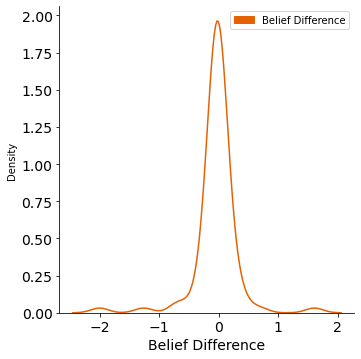

In [187]:
import seaborn as sns

# prior_patch = mpatches.Patch(color='#FFC20A', label='Prior')
# post1_patch = mpatches.Patch(color='#0C7BDC', label='Posterior (t=0)')
# post2_patch = mpatches.Patch(color='#E66100', label='Posterior (t=5)')
# data_patch = mpatches.Patch(color='#5D3A9B', label='Data Shown')
error_patch = mpatches.Patch(color='#E66100', label='Belief Difference')


fig = plt.figure(figsize=(8,6))
sns.displot(data = df_fin_ic_three, x = "belief_error", color = '#E66100', kind="kde") #hist=False)

# sns.distplot(df_fin_ic_three.prior_belief, color = '#FFC20A', hist=False)
# sns.distplot(df_fin_ic_three.data_rho, color = '#5D3A9B', hist=False, kde_kws={'linestyle':'--'})
# sns.distplot(df_fin_ic_three.post1_belief, color = '#0C7BDC', hist=False)
# sns.distplot(df_fin_ic_three.post2_belief, color = '#E66100', hist=False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Belief Difference", fontsize = 14)
# plt.title("Density Plot for Elicited Belief Correlation")

plt.legend(handles=[error_patch])
# plt.savefig("density_plot_ic_three.png")
plt.show()

In [188]:
len(df_fin_ic_three['usertoken'].unique())

28

In [217]:
df_fin_ic_three_main = df_fin_ic_three[df_fin_ic_three.eval("-0.05 <= belief_error <= 0.05")]
df_fin_ic_three_main['usertoken']

10     RWrfFb2U
11     RWrfFb2U
16     k377qJbk
17     k377qJbk
21     QFRTD80J
22     QFRTD80J
25     TDgzJbOD
27     ctX4on3L
28     ctX4on3L
29     ctX4on3L
51     1AwuoTwu
53     1AwuoTwu
76     OEYCxxRj
77     OEYCxxRj
79     lkriTtxq
80     lkriTtxq
103    4hpzNxQm
104    4hpzNxQm
130    NBA8hkYq
157    BBP73db6
166    oA4yjpRL
179    RxIlUFQ1
186    v4HHkZlG
187    v4HHkZlG
193    T8oN7ZK5
203    P1YawhF7
209    JY2591IM
218    TkNsPpge
232    zvWEzARG
233    zvWEzARG
240    uV3Xp60n
242    uV3Xp60n
248    GkRCuB45
253    v2TrScDD
255    AliGfrkM
288    H5NbITHi
Name: usertoken, dtype: object

In [192]:
len(df_fin_ic_three_main['usertoken'].unique())

24

In [ ]:
#################################################### 3-trials quant and qual ####################################################

In [ ]:
################################## quant for qual ##################################

In [365]:
# df_decay = pd.read_excel("qual_decay.xlsx")
qual_decay_list = ['05KCW2KW', '0xcJlhve', 'AaBQpKax', 'hhDBVviK', 'l5kHrg3s', 'lTWKkgy0', 'MAXHFRS7', 'Mf6iX7WP', 'miR4lbBN', 'p9X0bRYJ', 'wxd53lIg']
len(qual_decay_list)

11

In [366]:
df_fin.shape

(303, 26)

In [370]:
df_fin_qd = df_fin[df_fin['usertoken'].isin(qual_decay_list)]
df_fin_qd = df_fin_qd.reset_index(drop = True)
df_fin_qd.to_csv('3-trials-quant-qual/quant_for_qual_decay.csv', index = True)

In [371]:
qual_strength_list = ['YSABc5Sa']
len(qual_strength_list)

1

In [373]:
df_fin_qs = df_fin[df_fin['usertoken'].isin(qual_strength_list)]
df_fin_qs = df_fin_qs.reset_index(drop = True)
# df_fin_qs
df_fin_qs.to_csv('3-trials-quant-qual/quant_for_qual_strength.csv', index = True)

In [374]:
qual_maintain_list = ['OwNbjsPH', 'RWrfFb2U', 'k377qJbk', 'TDgzJbOD', 'ctX4on3L', '1AwuoTwu', 'lkriTtxq', '4hpzNxQm', 'p06kRv8P', 'aXArSPHi',
                      'BBP73db6', 'RxIlUFQ1', 'v4HHkZlG', 'T8oN7ZK5', 'P1YawhF7', 'TkNsPpge', 'zvWEzARG', 'uV3Xp60n', 'GkRCuB45', 'v2TrScDD',
                      'AliGfrkM', 'H5NbITHi', 'vx2CYiXG', 'QFRTD80J', 'OEYCxxRj', 'NBA8hkYq', 'oA4yjpRL', 'JY2591IM']
len(qual_maintain_list)

28

In [377]:
df_fin_qm = df_fin[df_fin['usertoken'].isin(qual_maintain_list)]
df_fin_qm = df_fin_qm.reset_index(drop = True)
# df_fin_qm
df_fin_qm.to_csv('3-trials-quant-qual/quant_for_qual_maintain.csv', index = True)

In [ ]:
############### last analysis

In [556]:
df = pd.read_csv('belief_mixed_effects.csv')

In [557]:
pivot = df.pivot(index=["ID","variable"],columns="post_stage",values=["post_belief","post_uncertainty"])

In [558]:
pivot = pivot.reset_index()

In [559]:
def getMaintenance(row):
    t0Belief = row["post_belief"]["T0"]
    t0Uncertainty = row["post_uncertainty"]["T0"]
    t0Range = [t0Belief-t0Uncertainty/2, t0Belief+t0Uncertainty/2]
    t5Belief = row["post_belief"]["T5"]
    t5Uncertainty = row["post_uncertainty"]["T5"]
    return t0Range[0] < t5Belief < t0Range[1]

In [560]:
pivot["maintain"] = pivot.apply(getMaintenance,axis=1)

In [564]:
pivot

ID                 variable post_belief  \
post_stage                                                             T0   
0           62f67ae0fc70763173e81fc2         Education_income   -0.006114   
1           62f67ae0fc70763173e81fc2          Immigrant_crime   -0.809420   
2           62f67ae0fc70763173e81fc2  Social_media_depression   -0.786482   
3           62f67f44fc70763173e81fdc         Education_income    0.423752   
4           62f67f44fc70763173e81fdc          Immigrant_crime    0.493294   
..                               ...                      ...         ...   
298         62faa8ab930ab57fc9fe19a0          Immigrant_crime   -0.480288   
299         62faa8ab930ab57fc9fe19a0  Social_media_depression   -0.089413   
300         62fabb0c930ab57fc9fe19fb         Education_income    1.000000   
301         62fabb0c930ab57fc9fe19fb          Immigrant_crime    0.832658   
302         62fabb0c930ab57fc9fe19fb  Social_media_depression    0.683311   

                     post_uncertainty           maintain  
post_stage        T5               T0        T5           
0          -0.006797         2.000000  0.541772     True  
1          -0.797963         0.257026  0.380444     True  
2          -0.763407         0.380357  0.365504     True  
3           0.354163         1.545738  0.702602     True  
4           0.617464         0.639007  0.788577     True  
..               ...              ...       ...      ...  
298         0.248386         0.185016  1.112934    False  
299        -0.811280         0.852761  0.196151    False  
300         0.927413         0.281244  0.272271     True  
301         0.764176         0.354289  0.303553     True  
302         0.395300         0.441204  0.489253    False  

[303 rows x 7 columns]

In [566]:
pivot_ipcr = pivot[pivot['variable'].str.contains('Immigrant_crime')]
pivot_smdr = pivot[pivot['variable'].str.contains('Social_media_depression')]
pivot_eir = pivot[pivot['variable'].str.contains('Education_income')]

In [567]:
pivot_ipcr["maintain"].value_counts()

True     73
False    28
Name: maintain, dtype: int64

In [568]:
pivot_smdr["maintain"].value_counts()

True     72
False    29
Name: maintain, dtype: int64

In [569]:
pivot_eir["maintain"].value_counts()

True     75
False    26
Name: maintain, dtype: int64